# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:37:36.443461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:37:39.453951
2025-04-14 23:37:39.453951


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:37:33"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

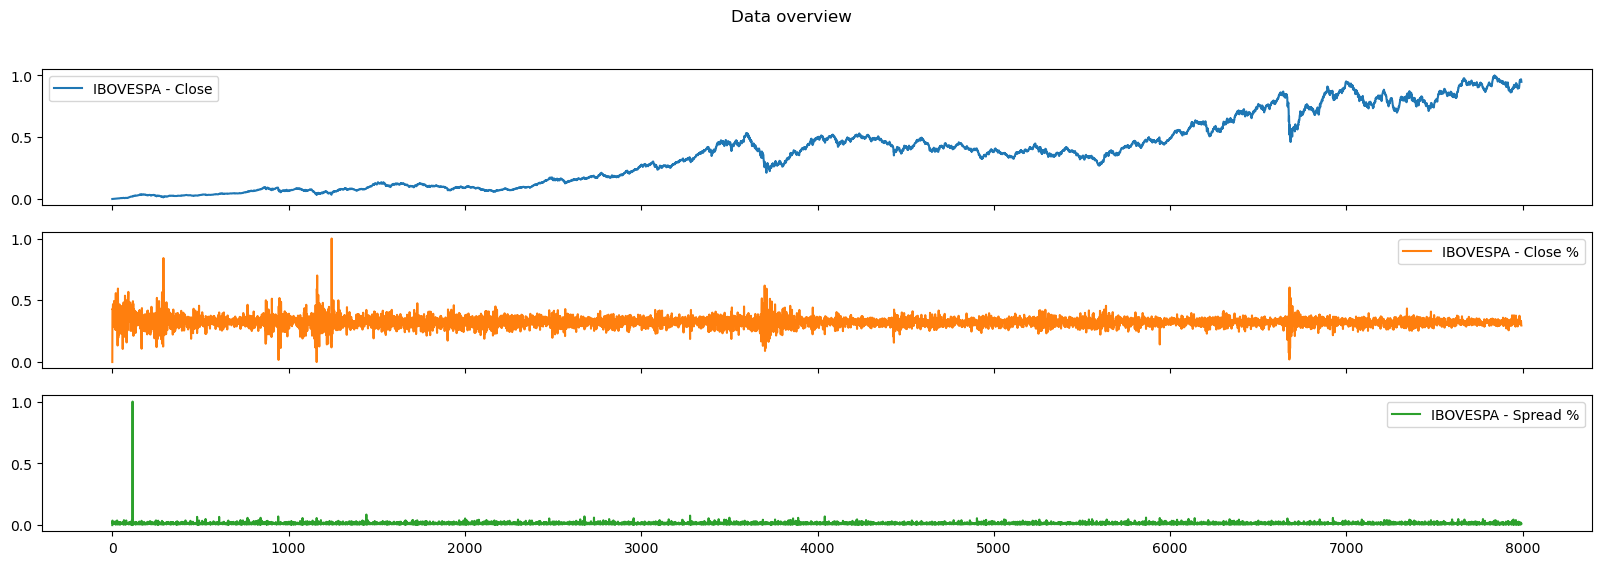

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

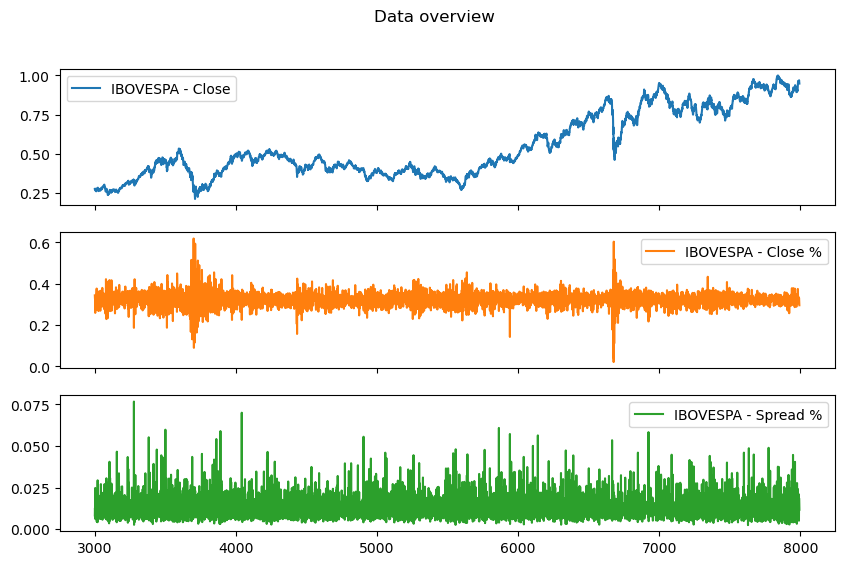

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

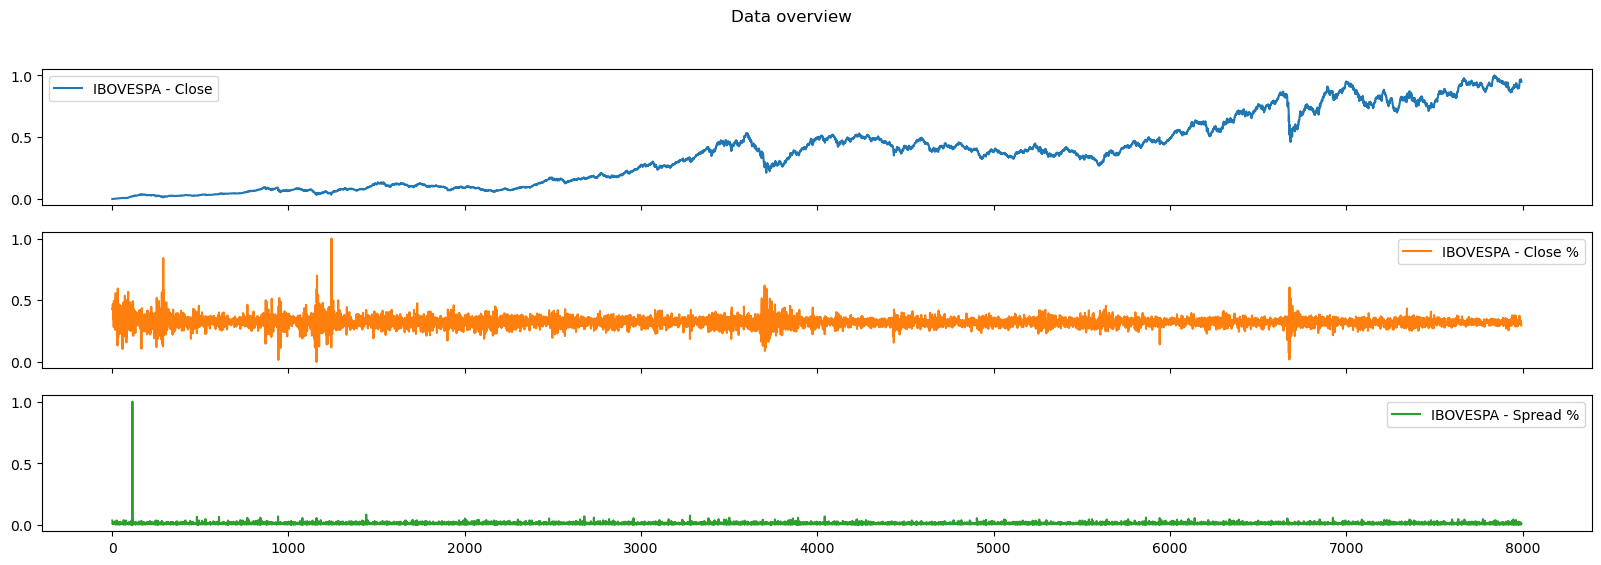

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

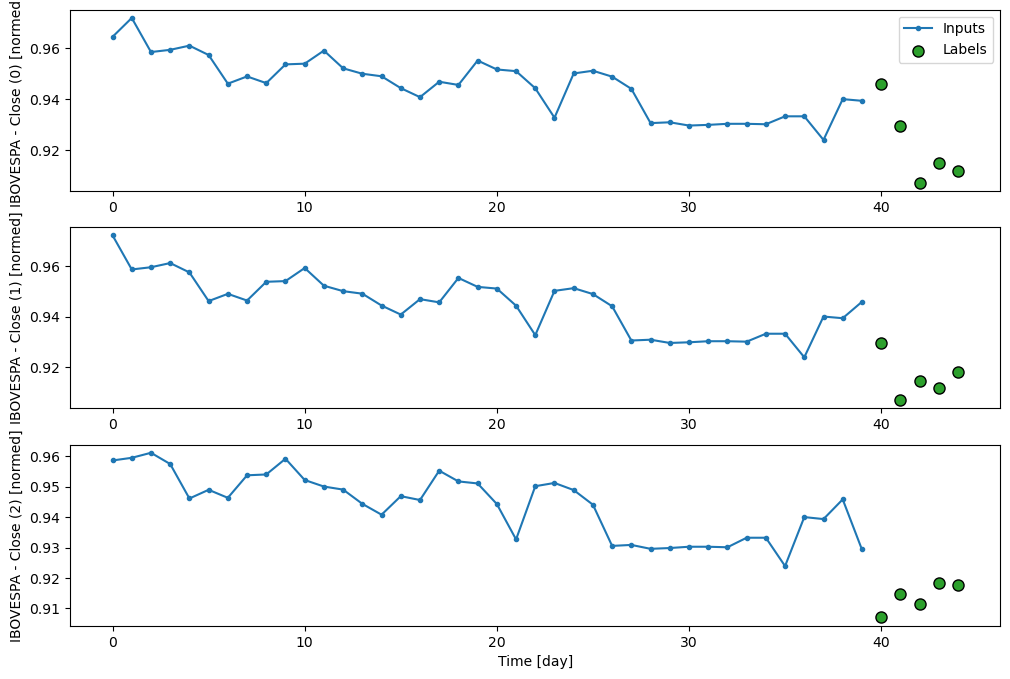

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15:41 4s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 86.5085 - mean_squared_error: 8.5026e-05 - root_mean_squared_error: 0.0090  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 79.6468 - mean_squared_error: 1.3021e-04 - root_mean_squared_error: 0.0110

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 75.4861 - mean_squared_error: 1.6135e-04 - root_mean_squared_error: 0.0123

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 72.2680 - mean_squared_error: 1.7292e-04 - root_mean_squared_error: 0.0128

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.0336 - mean_squared_error: 1.7494e-04 - root_mean_squared_error: 0.0129

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.7569 - mean_squared_error: 1.7223e-04 - root_mean_squared_error: 0.0129

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 62.8317 - mean_squared_error: 1.6801e-04 - root_mean_squared_error: 0.0127

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 60.2743 - mean_squared_error: 1.6359e-04 - root_mean_squared_error: 0.0126

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 57.9242 - mean_squared_error: 1.5897e-04 - root_mean_squared_error: 0.0124

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 55.7815 - mean_squared_error: 1.5445e-04 - root_mean_squared_error: 0.0122

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 53.8232 - mean_squared_error: 1.5028e-04 - root_mean_squared_error: 0.0121

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 52.1143 - mean_squared_error: 1.4773e-04 - root_mean_squared_error: 0.0120

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 50.5854 - mean_squared_error: 1.4676e-04 - root_mean_squared_error: 0.0119

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 49.2305 - mean_squared_error: 1.4737e-04 - root_mean_squared_error: 0.0120

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.0494 - mean_squared_error: 1.4948e-04 - root_mean_squared_error: 0.0121

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.9506 - mean_squared_error: 1.5130e-04 - root_mean_squared_error: 0.0122

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.9355 - mean_squared_error: 1.5296e-04 - root_mean_squared_error: 0.0122

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.1012 - mean_squared_error: 1.5599e-04 - root_mean_squared_error: 0.0123

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.3437 - mean_squared_error: 1.5878e-04 - root_mean_squared_error: 0.0125

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.6704 - mean_squared_error: 1.6277e-04 - root_mean_squared_error: 0.0126

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.0587 - mean_squared_error: 1.6718e-04 - root_mean_squared_error: 0.0128

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.4808 - mean_squared_error: 1.7146e-04 - root_mean_squared_error: 0.0129

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 41.9309 - mean_squared_error: 1.7604e-04 - root_mean_squared_error: 0.0131

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 41.4309 - mean_squared_error: 1.8297e-04 - root_mean_squared_error: 0.0133

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 40.9395 - mean_squared_error: 1.8909e-04 - root_mean_squared_error: 0.0135

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 40.4538 - mean_squared_error: 1.9439e-04 - root_mean_squared_error: 0.0137

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 39.9767 - mean_squared_error: 1.9900e-04 - root_mean_squared_error: 0.0138

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 39.5089 - mean_squared_error: 2.0299e-04 - root_mean_squared_error: 0.0140

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 39.0596 - mean_squared_error: 2.0661e-04 - root_mean_squared_error: 0.0141

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 38.6251 - mean_squared_error: 2.0985e-04 - root_mean_squared_error: 0.0142

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 38.2049 - mean_squared_error: 2.1275e-04 - root_mean_squared_error: 0.0143

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.7966 - mean_squared_error: 2.1529e-04 - root_mean_squared_error: 0.0144

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 37.4174 - mean_squared_error: 2.1781e-04 - root_mean_squared_error: 0.0145

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 37.0548 - mean_squared_error: 2.2012e-04 - root_mean_squared_error: 0.0146

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 36.6990 - mean_squared_error: 2.2213e-04 - root_mean_squared_error: 0.0146

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 36.3633 - mean_squared_error: 2.2425e-04 - root_mean_squared_error: 0.0147

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 36.0527 - mean_squared_error: 2.2723e-04 - root_mean_squared_error: 0.0148

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 35.7711 - mean_squared_error: 2.3277e-04 - root_mean_squared_error: 0.0150

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 35.5119 - mean_squared_error: 2.4017e-04 - root_mean_squared_error: 0.0152

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 35.2590 - mean_squared_error: 2.4733e-04 - root_mean_squared_error: 0.0154

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 35.0165 - mean_squared_error: 2.5483e-04 - root_mean_squared_error: 0.0156

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 34.7766 - mean_squared_error: 2.6187e-04 - root_mean_squared_error: 0.0157

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 34.5394 - mean_squared_error: 2.6852e-04 - root_mean_squared_error: 0.0159

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 34.3025 - mean_squared_error: 2.7464e-04 - root_mean_squared_error: 0.0161

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 34.0684 - mean_squared_error: 2.8043e-04 - root_mean_squared_error: 0.0162

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 33.8392 - mean_squared_error: 2.8622e-04 - root_mean_squared_error: 0.0164

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 33.6136 - mean_squared_error: 2.9204e-04 - root_mean_squared_error: 0.0166

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 33.5052 - mean_squared_error: 2.9569e-04 - root_mean_squared_error: 0.0166

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 33.3982 - mean_squared_error: 2.9940e-04 - root_mean_squared_error: 0.0167

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 33.2916 - mean_squared_error: 3.0300e-04 - root_mean_squared_error: 0.0168

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 33.1861 - mean_squared_error: 3.0663e-04 - root_mean_squared_error: 0.0169

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 33.0829 - mean_squared_error: 3.1065e-04 - root_mean_squared_error: 0.0170

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 32.9820 - mean_squared_error: 3.1523e-04 - root_mean_squared_error: 0.0171

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 32.7871 - mean_squared_error: 3.2632e-04 - root_mean_squared_error: 0.0174

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 32.6023 - mean_squared_error: 3.4162e-04 - root_mean_squared_error: 0.0177

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 32.4240 - mean_squared_error: 3.5899e-04 - root_mean_squared_error: 0.0180

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 32.2480 - mean_squared_error: 3.7636e-04 - root_mean_squared_error: 0.0183

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 32.0735 - mean_squared_error: 3.9328e-04 - root_mean_squared_error: 0.0187

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 31.9012 - mean_squared_error: 4.1017e-04 - root_mean_squared_error: 0.0190

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 31.7359 - mean_squared_error: 4.2885e-04 - root_mean_squared_error: 0.0193

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 31.5847 - mean_squared_error: 4.5218e-04 - root_mean_squared_error: 0.0197

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 31.4387 - mean_squared_error: 4.7577e-04 - root_mean_squared_error: 0.0201

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 31.2953 - mean_squared_error: 4.9916e-04 - root_mean_squared_error: 0.0205

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 31.1582 - mean_squared_error: 5.2562e-04 - root_mean_squared_error: 0.0209

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 31.0294 - mean_squared_error: 5.5921e-04 - root_mean_squared_error: 0.0214

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 30.9075 - mean_squared_error: 5.9868e-04 - root_mean_squared_error: 0.0219

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 30.7898 - mean_squared_error: 6.3971e-04 - root_mean_squared_error: 0.0225

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 30.6735 - mean_squared_error: 6.7994e-04 - root_mean_squared_error: 0.0230

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 30.5584 - mean_squared_error: 7.1931e-04 - root_mean_squared_error: 0.0235

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 30.4451 - mean_squared_error: 7.5820e-04 - root_mean_squared_error: 0.0240

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 30.3316 - mean_squared_error: 7.9550e-04 - root_mean_squared_error: 0.0245

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 30.2182 - mean_squared_error: 8.3124e-04 - root_mean_squared_error: 0.0250

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 30.1050 - mean_squared_error: 8.6561e-04 - root_mean_squared_error: 0.0254

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 29.9945 - mean_squared_error: 9.0014e-04 - root_mean_squared_error: 0.0259

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 29.8849 - mean_squared_error: 9.3380e-04 - root_mean_squared_error: 0.0263

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 29.7749 - mean_squared_error: 9.6600e-04 - root_mean_squared_error: 0.0268

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 29.6646 - mean_squared_error: 9.9679e-04 - root_mean_squared_error: 0.0272

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 29.5544 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0276    

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 29.4463 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 29.3407 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 29.2352 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 29.1299 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 29.0258 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 28.9244 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 28.8250 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 28.7262 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 28.6282 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 28.5306 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 28.4346 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 28.3418 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 28.2494 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 28.1575 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 28.0672 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 27.9787 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 27.8919 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 27.8065 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 27.7228 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 27.6409 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 27.5605 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 27.4801 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 27.3997 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 27.3194 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 27.2392 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 27.1590 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 27.0787 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 26.9988 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 26.9222 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 26.8480 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 26.7745 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 26.7018 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 26.6300 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 26.5598 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 26.4901 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 26.4204 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 26.3508 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 26.2816 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 26.2128 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 26.1440 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 26.0753 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 25.9731 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 25.9062 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401 - val_loss: 0.1795 - val_mean_absolute_error: 0.1795 - val_mean_absolute_percentage_error: 19.1226 - val_mean_squared_error: 0.0330 - val_root_mean_squared_error: 0.1817 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.7258 - mean_absolute_error: 0.7258 - mean_absolute_percentage_error: 9638.0186 - mean_squared_error: 0.5267 - root_mean_squared_error: 0.7258

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7220 - mean_absolute_error: 0.7220 - mean_absolute_percentage_error: 8021.6675 - mean_squared_error: 0.5214 - root_mean_squared_error: 0.7221 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7152 - mean_absolute_error: 0.7152 - mean_absolute_percentage_error: 6801.3955 - mean_squared_error: 0.5118 - root_mean_squared_error: 0.7153

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 6023.5176 - mean_squared_error: 0.5014 - root_mean_squared_error: 0.7079

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6986 - mean_absolute_error: 0.6986 - mean_absolute_percentage_error: 5522.3916 - mean_squared_error: 0.4893 - root_mean_squared_error: 0.6992

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6906 - mean_absolute_error: 0.6906 - mean_absolute_percentage_error: 5158.1743 - mean_squared_error: 0.4798 - root_mean_squared_error: 0.6922

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6753 - mean_absolute_error: 0.6753 - mean_absolute_percentage_error: 4841.8486 - mean_squared_error: 0.4643 - root_mean_squared_error: 0.6805

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6645 - mean_absolute_error: 0.6645 - mean_absolute_percentage_error: 4591.7148 - mean_squared_error: 0.4553 - root_mean_squared_error: 0.6737

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6523 - mean_absolute_error: 0.6523 - mean_absolute_percentage_error: 4371.6040 - mean_squared_error: 0.4444 - root_mean_squared_error: 0.6653

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6384 - mean_absolute_error: 0.6384 - mean_absolute_percentage_error: 4172.3276 - mean_squared_error: 0.4324 - root_mean_squared_error: 0.6558

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6266 - mean_absolute_error: 0.6266 - mean_absolute_percentage_error: 3997.6035 - mean_squared_error: 0.4217 - root_mean_squared_error: 0.6472

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6147 - mean_absolute_error: 0.6147 - mean_absolute_percentage_error: 3838.9631 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6386

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6046 - mean_absolute_error: 0.6046 - mean_absolute_percentage_error: 3696.1577 - mean_squared_error: 0.4019 - root_mean_squared_error: 0.6309

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5948 - mean_absolute_error: 0.5948 - mean_absolute_percentage_error: 3564.9709 - mean_squared_error: 0.3930 - root_mean_squared_error: 0.6235

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5855 - mean_absolute_error: 0.5855 - mean_absolute_percentage_error: 3444.3396 - mean_squared_error: 0.3846 - root_mean_squared_error: 0.6164

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5771 - mean_absolute_error: 0.5771 - mean_absolute_percentage_error: 3334.1250 - mean_squared_error: 0.3772 - root_mean_squared_error: 0.6102

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5689 - mean_absolute_error: 0.5689 - mean_absolute_percentage_error: 3231.9009 - mean_squared_error: 0.3701 - root_mean_squared_error: 0.6041

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5611 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 3137.3057 - mean_squared_error: 0.3633 - root_mean_squared_error: 0.5982

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 3051.0762 - mean_squared_error: 0.3573 - root_mean_squared_error: 0.5931

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5479 - mean_absolute_error: 0.5479 - mean_absolute_percentage_error: 2971.4778 - mean_squared_error: 0.3518 - root_mean_squared_error: 0.5883

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5415 - mean_absolute_error: 0.5415 - mean_absolute_percentage_error: 2896.5540 - mean_squared_error: 0.3463 - root_mean_squared_error: 0.5834

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5354 - mean_absolute_error: 0.5354 - mean_absolute_percentage_error: 2826.1941 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5786

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 2759.6509 - mean_squared_error: 0.3356 - root_mean_squared_error: 0.5738

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 2696.5847 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5690

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5173 - mean_absolute_error: 0.5173 - mean_absolute_percentage_error: 2636.7078 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5643

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5115 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 2579.8276 - mean_squared_error: 0.3203 - root_mean_squared_error: 0.5596

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 2525.6338 - mean_squared_error: 0.3154 - root_mean_squared_error: 0.5550

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4999 - mean_absolute_error: 0.4999 - mean_absolute_percentage_error: 2473.9180 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5504

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 2424.5205 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5459

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - mean_absolute_percentage_error: 2377.2834 - mean_squared_error: 0.3014 - root_mean_squared_error: 0.5414

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4856 - mean_absolute_error: 0.4856 - mean_absolute_percentage_error: 2354.4460 - mean_squared_error: 0.2992 - root_mean_squared_error: 0.5392

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4800 - mean_absolute_error: 0.4800 - mean_absolute_percentage_error: 2310.2356 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5349

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - mean_absolute_percentage_error: 2267.9077 - mean_squared_error: 0.2905 - root_mean_squared_error: 0.5306

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4693 - mean_absolute_error: 0.4693 - mean_absolute_percentage_error: 2227.4045 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5265

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4641 - mean_absolute_error: 0.4641 - mean_absolute_percentage_error: 2188.6072 - mean_squared_error: 0.2824 - root_mean_squared_error: 0.5224

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4616 - mean_absolute_error: 0.4616 - mean_absolute_percentage_error: 2169.8188 - mean_squared_error: 0.2805 - root_mean_squared_error: 0.5204

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4591 - mean_absolute_error: 0.4591 - mean_absolute_percentage_error: 2151.4299 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5184

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_absolute_percentage_error: 2115.7625 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.5146

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4519 - mean_absolute_error: 0.4519 - mean_absolute_percentage_error: 2098.4385 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5126

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4473 - mean_absolute_error: 0.4473 - mean_absolute_percentage_error: 2064.7649 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5089

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2032.3280 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.5052

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.4383 - mean_absolute_error: 0.4383 - mean_absolute_percentage_error: 2001.0459 - mean_squared_error: 0.2625 - root_mean_squared_error: 0.5017

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 1970.8661 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4981

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4299 - mean_absolute_error: 0.4299 - mean_absolute_percentage_error: 1941.7325 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4947

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 1913.5781 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4914

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - mean_absolute_percentage_error: 1886.3522 - mean_squared_error: 0.2499 - root_mean_squared_error: 0.4881

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 1859.9979 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4849

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1834.4746 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4817

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - mean_absolute_percentage_error: 1809.7379 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4786

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 1785.7478 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4756

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 1762.4688 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4726

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3999 - mean_absolute_error: 0.3999 - mean_absolute_percentage_error: 1739.8762 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4697

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 1717.9341 - mean_squared_error: 0.2308 - root_mean_squared_error: 0.4669

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 1696.6130 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4641

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 1675.8866 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4613

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1655.7266 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4586

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1636.1112 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4560

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 1617.0188 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4534

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 1598.4261 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4508

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1580.3212 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4483

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1562.6877 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4459

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 1545.5049 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4435

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 1528.7561 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4412

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1520.5374 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4400

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3641 - mean_absolute_error: 0.3641 - mean_absolute_percentage_error: 1512.4192 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4389

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 1496.4758 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4366

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3591 - mean_absolute_error: 0.3591 - mean_absolute_percentage_error: 1480.9110 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4344

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 1465.7120 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4323

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1450.8636 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4302

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1436.3529 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4281

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1422.1686 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4260

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1408.2985 - mean_squared_error: 0.1945 - root_mean_squared_error: 0.4240

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1394.7322 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4220

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 1381.4600 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4200

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1368.4712 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4181

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1355.7583 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4162

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1343.3116 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4143

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1331.1230 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4125

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 1319.1844 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4107

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1307.4874 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.4089

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1296.0248 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.4071

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1284.7902 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4054

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1279.2560 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.4045

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1268.3497 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.4028

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1257.6541 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.4011

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1247.1615 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3994

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1236.8660 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3978

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1226.7616 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3962

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1216.8433 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3946

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1211.9526 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3938

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1207.1066 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3930

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 1197.5459 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3915

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1192.8303 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3907

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1183.5255 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3892

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1174.3843 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3877

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1165.4016 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3862

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1156.5734 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3847

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1147.8948 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3833

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1139.3621 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3819

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1135.1490 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3812

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1126.8282 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3797

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1118.6443 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3784

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2965 - mean_absolute_error: 0.2965 - mean_absolute_percentage_error: 1110.5940 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3770

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1102.6743 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3756

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2937 - mean_absolute_error: 0.2937 - mean_absolute_percentage_error: 1094.8817 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3743

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1087.2133 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3730

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1079.6655 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3717

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1072.2355 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3704

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1064.9202 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3691

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 1057.7179 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3678

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1050.6276 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3666

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1043.6440 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3654

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1036.7649 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3642

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1029.9882 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3630

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1023.3114 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3618

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1016.7318 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3607

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1010.2478 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3596

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1003.8572 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3584

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 997.5574 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3573 

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 991.3468 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3562

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2740 - mean_absolute_error: 0.2740 - mean_absolute_percentage_error: 985.2231 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 979.1844 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 973.2288 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3530

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 967.3546 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3520

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 961.5723 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3510 - val_loss: 0.0705 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 7.5000 - val_mean_squared_error: 0.0073 - val_root_mean_squared_error: 0.0857 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.8708 - mean_absolute_error: 0.8708 - mean_absolute_percentage_error: 11568.2861 - mean_squared_error: 0.7617 - root_mean_squared_error: 0.8727

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8528 - mean_absolute_error: 0.8528 - mean_absolute_percentage_error: 9549.2588 - mean_squared_error: 0.7321 - root_mean_squared_error: 0.8554  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8138 - mean_absolute_error: 0.8138 - mean_absolute_percentage_error: 7989.7217 - mean_squared_error: 0.6759 - root_mean_squared_error: 0.8208

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7596 - mean_absolute_error: 0.7596 - mean_absolute_percentage_error: 6911.2544 - mean_squared_error: 0.6119 - root_mean_squared_error: 0.7782

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7058 - mean_absolute_error: 0.7058 - mean_absolute_percentage_error: 6132.4448 - mean_squared_error: 0.5547 - root_mean_squared_error: 0.7375

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6645 - mean_absolute_error: 0.6645 - mean_absolute_percentage_error: 5562.5107 - mean_squared_error: 0.5096 - root_mean_squared_error: 0.7041

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6322 - mean_absolute_error: 0.6322 - mean_absolute_percentage_error: 5122.4194 - mean_squared_error: 0.4736 - root_mean_squared_error: 0.6766

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6035 - mean_absolute_error: 0.6035 - mean_absolute_percentage_error: 4761.4688 - mean_squared_error: 0.4429 - root_mean_squared_error: 0.6521

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5774 - mean_absolute_error: 0.5774 - mean_absolute_percentage_error: 4456.2627 - mean_squared_error: 0.4162 - root_mean_squared_error: 0.6301

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.5656 - mean_absolute_error: 0.5656 - mean_absolute_percentage_error: 4321.2510 - mean_squared_error: 0.4043 - root_mean_squared_error: 0.6200

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.5442 - mean_absolute_error: 0.5442 - mean_absolute_percentage_error: 4079.6111 - mean_squared_error: 0.3828 - root_mean_squared_error: 0.6015

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.5343 - mean_absolute_error: 0.5343 - mean_absolute_percentage_error: 3970.5669 - mean_squared_error: 0.3730 - root_mean_squared_error: 0.5929

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5157 - mean_absolute_error: 0.5157 - mean_absolute_percentage_error: 3771.6226 - mean_squared_error: 0.3550 - root_mean_squared_error: 0.5768

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.4987 - mean_absolute_error: 0.4987 - mean_absolute_percentage_error: 3594.6453 - mean_squared_error: 0.3389 - root_mean_squared_error: 0.5620

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 3435.6743 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5484

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 3292.2170 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5358

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 3162.1392 - mean_squared_error: 0.2992 - root_mean_squared_error: 0.5241

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.4425 - mean_absolute_error: 0.4425 - mean_absolute_percentage_error: 3043.3494 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5131

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 2934.5752 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5029

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 2834.5488 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4933

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 2742.2222 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4843

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 2656.6003 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4758

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 2576.9426 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4678

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3826 - mean_absolute_error: 0.3826 - mean_absolute_percentage_error: 2502.6602 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4602

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 2433.1599 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4530

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3670 - mean_absolute_error: 0.3670 - mean_absolute_percentage_error: 2367.9775 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4461

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 2306.6907 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4396

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 2248.9431 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4334

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 2194.4487 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4275

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 2142.9167 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4218

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 2094.1211 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4164

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 2047.8539 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4112

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 2003.8969 - mean_squared_error: 0.1910 - root_mean_squared_error: 0.4062

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1962.0819 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4015

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1922.2990 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3969

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1884.3646 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3924

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1848.1370 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3882

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1813.4917 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3841

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1780.3115 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3801

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2923 - mean_absolute_error: 0.2923 - mean_absolute_percentage_error: 1748.4943 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3762

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1717.9462 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3725

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1688.5920 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3689

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1660.3618 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3654

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1633.1896 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3620

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1607.0122 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3588

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1581.7759 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3556

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 1557.4244 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3525

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1533.9104 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3495

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1511.1876 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3466

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1489.2141 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3437

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1467.9540 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3410

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1447.3698 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3383

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1427.4270 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3356

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1408.0959 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3331

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1389.3463 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3306

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1371.1517 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3282

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1353.4873 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3258

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1336.3286 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3235

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1319.6587 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3212

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1303.4580 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3190

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1287.7086 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3169

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1272.3937 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3148

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1257.4891 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3128

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1242.9751 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3109

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1228.8375 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3090

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1215.0627 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3071

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1201.6329 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3053

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1188.5353 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3036

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1175.7570 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3018

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1163.2852 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3002

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1151.1104 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.2985

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1139.2209 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2969

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1127.6061 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.2953

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1116.2570 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.2938

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1105.1637 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.2923

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1094.3159 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2908

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1083.7054 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2893

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 1073.3248 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2879

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 1063.1665 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2865

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1053.2242 - mean_squared_error: 0.1018 - root_mean_squared_error: 0.2851

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 1043.4901 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2837

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 1033.9564 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2824

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1024.6172 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2810

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1015.4658 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2797

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1006.4968 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2785

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 997.7053 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2772 

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 989.0854 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2759

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 980.6329 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2747

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 972.3427 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2735

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 964.2124 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2723

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 956.2370 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2712

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 948.4093 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2701

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 940.7263 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2690

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 933.1837 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2679

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 925.7760 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2668

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 918.5010 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2657

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 911.3542 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2647

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 904.3317 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2637

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 897.4321 - mean_squared_error: 0.0876 - root_mean_squared_error: 0.2627

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 890.6505 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2617

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 883.9836 - mean_squared_error: 0.0864 - root_mean_squared_error: 0.2607

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 877.4290 - mean_squared_error: 0.0858 - root_mean_squared_error: 0.2598

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 870.9832 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2589

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 864.6428 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2580

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 858.4052 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2571

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 852.2698 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2562

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 846.2327 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 840.2910 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2545

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 834.4427 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2536

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 828.6851 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2528

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1757 - mean_absolute_error: 0.1757 - mean_absolute_percentage_error: 823.0159 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2520

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 817.4333 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2512

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 811.9353 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2504

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 806.5203 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2496

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 801.1856 - mean_squared_error: 0.0790 - root_mean_squared_error: 0.2488

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1726 - mean_absolute_error: 0.1726 - mean_absolute_percentage_error: 795.9293 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2481

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 790.7494 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2473

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 785.6443 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2466

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 780.6125 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2458

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 773.2073 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2447 - val_loss: 0.0605 - val_mean_absolute_error: 0.0605 - val_mean_absolute_percentage_error: 6.4818 - val_mean_squared_error: 0.0064 - val_root_mean_squared_error: 0.0800 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.9172 - mean_absolute_error: 0.9172 - mean_absolute_percentage_error: 12188.3320 - mean_squared_error: 0.8466 - root_mean_squared_error: 0.9201

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.9038 - mean_absolute_error: 0.9038 - mean_absolute_percentage_error: 10094.5303 - mean_squared_error: 0.8222 - root_mean_squared_error: 0.9067 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8728 - mean_absolute_error: 0.8728 - mean_absolute_percentage_error: 8482.0820 - mean_squared_error: 0.7716 - root_mean_squared_error: 0.8775 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8284 - mean_absolute_error: 0.8284 - mean_absolute_percentage_error: 7385.1055 - mean_squared_error: 0.7094 - root_mean_squared_error: 0.8393

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7745 - mean_absolute_error: 0.7745 - mean_absolute_percentage_error: 6568.8345 - mean_squared_error: 0.6476 - root_mean_squared_error: 0.7987

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7284 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 5954.5552 - mean_squared_error: 0.5959 - root_mean_squared_error: 0.7630

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6936 - mean_absolute_error: 0.6936 - mean_absolute_percentage_error: 5485.3120 - mean_squared_error: 0.5553 - root_mean_squared_error: 0.7343

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6656 - mean_absolute_error: 0.6656 - mean_absolute_percentage_error: 5111.0933 - mean_squared_error: 0.5221 - root_mean_squared_error: 0.7101

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6400 - mean_absolute_error: 0.6400 - mean_absolute_percentage_error: 4794.6558 - mean_squared_error: 0.4930 - root_mean_squared_error: 0.6883

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6162 - mean_absolute_error: 0.6162 - mean_absolute_percentage_error: 4520.8760 - mean_squared_error: 0.4671 - root_mean_squared_error: 0.6682

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 4283.2568 - mean_squared_error: 0.4444 - root_mean_squared_error: 0.6501

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5757 - mean_absolute_error: 0.5757 - mean_absolute_percentage_error: 4074.0161 - mean_squared_error: 0.4241 - root_mean_squared_error: 0.6335

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5578 - mean_absolute_error: 0.5578 - mean_absolute_percentage_error: 3887.0657 - mean_squared_error: 0.4058 - root_mean_squared_error: 0.6182

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5414 - mean_absolute_error: 0.5414 - mean_absolute_percentage_error: 3719.0298 - mean_squared_error: 0.3892 - root_mean_squared_error: 0.6040

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5260 - mean_absolute_error: 0.5260 - mean_absolute_percentage_error: 3566.9182 - mean_squared_error: 0.3741 - root_mean_squared_error: 0.5908

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5117 - mean_absolute_error: 0.5117 - mean_absolute_percentage_error: 3428.5959 - mean_squared_error: 0.3603 - root_mean_squared_error: 0.5784

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4984 - mean_absolute_error: 0.4984 - mean_absolute_percentage_error: 3302.2039 - mean_squared_error: 0.3476 - root_mean_squared_error: 0.5669

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4858 - mean_absolute_error: 0.4858 - mean_absolute_percentage_error: 3186.2119 - mean_squared_error: 0.3359 - root_mean_squared_error: 0.5561

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - mean_absolute_percentage_error: 3079.4211 - mean_squared_error: 0.3250 - root_mean_squared_error: 0.5459

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2980.7454 - mean_squared_error: 0.3149 - root_mean_squared_error: 0.5363

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4526 - mean_absolute_error: 0.4526 - mean_absolute_percentage_error: 2889.1587 - mean_squared_error: 0.3056 - root_mean_squared_error: 0.5272

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2803.8108 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5186

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - mean_absolute_percentage_error: 2724.0869 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5104

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 2649.4316 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5027

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 2579.3115 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.4953

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4080 - mean_absolute_error: 0.4080 - mean_absolute_percentage_error: 2513.3047 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4882

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 2451.0486 - mean_squared_error: 0.2603 - root_mean_squared_error: 0.4815

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3930 - mean_absolute_error: 0.3930 - mean_absolute_percentage_error: 2392.2122 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4750

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3860 - mean_absolute_error: 0.3860 - mean_absolute_percentage_error: 2336.5146 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4688

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 2283.7141 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4629

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 2233.5801 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4571

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 2185.8938 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4517

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 2140.4973 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4464

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 2097.2463 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4413

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 2055.9661 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4364

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 2036.0208 - mean_squared_error: 0.2170 - root_mean_squared_error: 0.4340

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 2016.5153 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4316

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1978.7676 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4270

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 1942.6010 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4226

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1907.9164 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4183

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1874.6195 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4142

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1842.6287 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4102

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1811.8613 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4063

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1782.2440 - mean_squared_error: 0.1903 - root_mean_squared_error: 0.4025

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1753.7056 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.3989

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1726.1913 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3953

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1699.6409 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3919

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1686.7124 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3902

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1674.0060 - mean_squared_error: 0.1788 - root_mean_squared_error: 0.3885

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1649.2333 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3853

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1625.2800 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3821

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.2895 - mean_absolute_error: 0.2895 - mean_absolute_percentage_error: 1613.5981 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3806

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1602.1055 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3790

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1590.7968 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3775

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2833 - mean_absolute_error: 0.2833 - mean_absolute_percentage_error: 1568.7133 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3746

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1547.3127 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3717

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1526.5607 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3689

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1506.4276 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3661

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1486.8851 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3634

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1467.9060 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3608

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1449.4655 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3583

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1431.5469 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3558

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 1414.1263 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3534

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1397.1880 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3510

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1380.7096 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3487

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1364.6664 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3465

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1349.0397 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3443

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1341.3787 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3433

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1326.3534 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3412

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1311.7072 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3392

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1304.5205 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3382

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1297.4227 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3372

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1290.4121 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3362

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1276.6464 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3343

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1263.2104 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3325

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1256.6128 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3316

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1243.6492 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3298

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1237.2803 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3289

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1230.9849 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3280

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1224.7612 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3271

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1212.5238 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3254

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1200.5579 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3237

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1188.8542 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3220

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1183.0979 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3212

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1171.7710 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3196

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1160.6854 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3180

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1149.8333 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3164

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1139.2075 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3149

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1128.8005 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3134

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1118.6057 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3119

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1108.6169 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3104

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1098.8290 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3090

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 1089.2339 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3075

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1084.5067 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3068

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1075.1895 - mean_squared_error: 0.1166 - root_mean_squared_error: 0.3054

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1066.0503 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3041

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2152 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 1061.5463 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3034

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1057.0857 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3027

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1048.2919 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3014

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1043.9567 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3007

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1039.6615 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3001

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 1035.4062 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.2994

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1031.1906 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.2988

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1027.0135 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.2982

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1018.7728 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.2969

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1010.6796 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.2957

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1002.7313 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2945

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 998.8098 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2939 

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 991.0692 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2927

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 983.4636 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2915

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 975.9901 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2904

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 968.6435 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2893

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 961.4209 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2882

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 954.3189 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2871

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 947.3336 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2860

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 940.4617 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2850

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 937.0673 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2845

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 933.7010 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2839

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 930.3623 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2834

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 927.0502 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2829

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 920.5051 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2819

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 914.0630 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2809

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 907.7216 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2800

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 901.4775 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2790

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 898.3914 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2785

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 895.3289 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2780

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 889.2737 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2771

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 886.2805 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2766

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 883.3098 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2762

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 877.4355 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2753

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 874.5311 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2748

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 871.6482 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2744

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 868.7864 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2739

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 863.1256 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2731

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 857.5471 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2722

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1880 - mean_absolute_error: 0.1880 - mean_absolute_percentage_error: 852.0489 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2713

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 849.3293 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2709

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 846.6319 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2705

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 843.9572 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2701 - val_loss: 0.1025 - val_mean_absolute_error: 0.1025 - val_mean_absolute_percentage_error: 10.9288 - val_mean_squared_error: 0.0154 - val_root_mean_squared_error: 0.1243 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.8390 - mean_absolute_error: 0.8390 - mean_absolute_percentage_error: 11139.1660 - mean_squared_error: 0.7107 - root_mean_squared_error: 0.8430

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8282 - mean_absolute_error: 0.8282 - mean_absolute_percentage_error: 9235.1348 - mean_squared_error: 0.6939 - root_mean_squared_error: 0.8329  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8025 - mean_absolute_error: 0.8025 - mean_absolute_percentage_error: 7769.9707 - mean_squared_error: 0.6564 - root_mean_squared_error: 0.8096

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7657 - mean_absolute_error: 0.7657 - mean_absolute_percentage_error: 6779.9805 - mean_squared_error: 0.6094 - root_mean_squared_error: 0.7785

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7217 - mean_absolute_error: 0.7217 - mean_absolute_percentage_error: 6057.2480 - mean_squared_error: 0.5609 - root_mean_squared_error: 0.7445

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6797 - mean_absolute_error: 0.6797 - mean_absolute_percentage_error: 5498.0049 - mean_squared_error: 0.5179 - root_mean_squared_error: 0.7127

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6464 - mean_absolute_error: 0.6464 - mean_absolute_percentage_error: 5064.4819 - mean_squared_error: 0.4827 - root_mean_squared_error: 0.6857

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6195 - mean_absolute_error: 0.6195 - mean_absolute_percentage_error: 4718.0854 - mean_squared_error: 0.4537 - root_mean_squared_error: 0.6629

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5958 - mean_absolute_error: 0.5958 - mean_absolute_percentage_error: 4427.2817 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6426

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5736 - mean_absolute_error: 0.5736 - mean_absolute_percentage_error: 4175.5259 - mean_squared_error: 0.4063 - root_mean_squared_error: 0.6240

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5535 - mean_absolute_error: 0.5535 - mean_absolute_percentage_error: 3956.1045 - mean_squared_error: 0.3864 - root_mean_squared_error: 0.6069

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5356 - mean_absolute_error: 0.5356 - mean_absolute_percentage_error: 3763.3342 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.5915

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5190 - mean_absolute_error: 0.5190 - mean_absolute_percentage_error: 3591.2517 - mean_squared_error: 0.3530 - root_mean_squared_error: 0.5772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5036 - mean_absolute_error: 0.5036 - mean_absolute_percentage_error: 3436.2805 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5640

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.4893 - mean_absolute_error: 0.4893 - mean_absolute_percentage_error: 3296.0396 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5517

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.4759 - mean_absolute_error: 0.4759 - mean_absolute_percentage_error: 3168.4841 - mean_squared_error: 0.3135 - root_mean_squared_error: 0.5402

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4635 - mean_absolute_error: 0.4635 - mean_absolute_percentage_error: 3051.8840 - mean_squared_error: 0.3025 - root_mean_squared_error: 0.5294

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_absolute_percentage_error: 2944.8701 - mean_squared_error: 0.2923 - root_mean_squared_error: 0.5193

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4408 - mean_absolute_error: 0.4408 - mean_absolute_percentage_error: 2846.4429 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5099

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 2755.6453 - mean_squared_error: 0.2742 - root_mean_squared_error: 0.5009

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 2712.7603 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.4967

 41/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 2671.3870 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4925

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 2631.4480 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4885

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 2592.8711 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4845

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 2555.5857 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4807

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.4033 - mean_absolute_error: 0.4033 - mean_absolute_percentage_error: 2519.5083 - mean_squared_error: 0.2514 - root_mean_squared_error: 0.4770

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2484.5728 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4733

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.3912 - mean_absolute_error: 0.3912 - mean_absolute_percentage_error: 2417.9175 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4663

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 2355.2087 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4595

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 2296.1091 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4531

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 2240.2954 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4469

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 2187.4756 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4410

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.3561 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 2137.4080 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4354

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 2089.8860 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4299

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 2044.7224 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4247

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 2001.7372 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4197

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1960.7893 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4148

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1921.7260 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4102

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1884.4153 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4056

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3178 - mean_absolute_error: 0.3178 - mean_absolute_percentage_error: 1848.7255 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.4013

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1814.5465 - mean_squared_error: 0.1823 - root_mean_squared_error: 0.3971

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1781.7794 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3930

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1750.3282 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3891

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1720.1221 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3853

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1691.0784 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3816

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.2921 - mean_absolute_error: 0.2921 - mean_absolute_percentage_error: 1663.1278 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3780

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1636.2078 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3745

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1610.2603 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3711

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1585.2307 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3678

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1561.0686 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1537.7269 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3615

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1515.1656 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3585

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1493.3469 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3556

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1472.2301 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3527

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1451.7804 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3500

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1431.9637 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3473

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1412.7495 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3446

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1394.1071 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3421

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1376.0115 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3395

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1358.4373 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3371

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1341.3634 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3347

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1324.7775 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3324

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1308.6537 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3301

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1292.9766 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3279

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1277.7284 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3258

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1262.8855 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3238

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1248.4294 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3218

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1234.3470 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3198

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1220.6239 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3179

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1207.2428 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3161

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1194.1906 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3143

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1181.4534 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3125

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1175.1996 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3116

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1162.9165 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3099

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1150.9211 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3083

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1139.2031 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3066

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1127.7518 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3050

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1116.5564 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3034

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 1105.6085 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3019

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1094.8993 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3003

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 1084.4211 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.2988

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1074.1666 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2974

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1064.1281 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2959

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 1054.2987 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.2945

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1044.6713 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.2931

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 1035.2397 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2917

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 1025.9984 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2903

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 1016.9420 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2890

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1008.0645 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2876

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 999.3598 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2863 

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 990.8229 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2851

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 982.4491 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2838

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 974.2347 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2825

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 966.1745 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2813

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 958.2629 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2801

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 950.4966 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2789

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 942.8715 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2778

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 935.3823 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2766

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 928.0267 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2755

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1909 - mean_absolute_error: 0.1909 - mean_absolute_percentage_error: 920.8010 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2744

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 913.7007 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2733

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 906.7236 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2722

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 899.8660 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2712

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 893.1240 - mean_squared_error: 0.0919 - root_mean_squared_error: 0.2701

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 886.4949 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2691

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 879.9751 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2681

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 873.5618 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2671

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 867.2521 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2661

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 861.0459 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2651

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 854.9391 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2642

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 848.9293 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2633

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 843.0145 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2623

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 837.1917 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2615

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 831.4583 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2606

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 825.8132 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2597

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 820.2549 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2589

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 814.7806 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2580

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 809.3879 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2572

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 804.0753 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2564

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 798.8406 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2556

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 793.6824 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 788.5984 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2541

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 783.5894 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2533

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 781.1161 - mean_squared_error: 0.0813 - root_mean_squared_error: 0.2529 - val_loss: 0.1365 - val_mean_absolute_error: 0.1365 - val_mean_absolute_percentage_error: 14.5545 - val_mean_squared_error: 0.0208 - val_root_mean_squared_error: 0.1441 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.8541 - mean_absolute_error: 0.8541 - mean_absolute_percentage_error: 11319.2236 - mean_squared_error: 0.7441 - root_mean_squared_error: 0.8626

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8354 - mean_absolute_error: 0.8354 - mean_absolute_percentage_error: 9324.8730 - mean_squared_error: 0.7161 - root_mean_squared_error: 0.8461  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8037 - mean_absolute_error: 0.8037 - mean_absolute_percentage_error: 7819.9448 - mean_squared_error: 0.6718 - root_mean_squared_error: 0.8188

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7626 - mean_absolute_error: 0.7626 - mean_absolute_percentage_error: 6806.0200 - mean_squared_error: 0.6216 - root_mean_squared_error: 0.7860

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7178 - mean_absolute_error: 0.7178 - mean_absolute_percentage_error: 6076.0146 - mean_squared_error: 0.5726 - root_mean_squared_error: 0.7520

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 5520.3286 - mean_squared_error: 0.5295 - root_mean_squared_error: 0.7206

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6443 - mean_absolute_error: 0.6443 - mean_absolute_percentage_error: 5086.0083 - mean_squared_error: 0.4938 - root_mean_squared_error: 0.6936

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6174 - mean_absolute_error: 0.6174 - mean_absolute_percentage_error: 4737.8354 - mean_squared_error: 0.4641 - root_mean_squared_error: 0.6705

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5939 - mean_absolute_error: 0.5939 - mean_absolute_percentage_error: 4446.1655 - mean_squared_error: 0.4386 - root_mean_squared_error: 0.6502

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5726 - mean_absolute_error: 0.5726 - mean_absolute_percentage_error: 4195.1807 - mean_squared_error: 0.4164 - root_mean_squared_error: 0.6319

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5537 - mean_absolute_error: 0.5537 - mean_absolute_percentage_error: 3977.4304 - mean_squared_error: 0.3967 - root_mean_squared_error: 0.6154

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5366 - mean_absolute_error: 0.5366 - mean_absolute_percentage_error: 3785.5959 - mean_squared_error: 0.3791 - root_mean_squared_error: 0.6002

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5206 - mean_absolute_error: 0.5206 - mean_absolute_percentage_error: 3614.0667 - mean_squared_error: 0.3632 - root_mean_squared_error: 0.5862

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5058 - mean_absolute_error: 0.5058 - mean_absolute_percentage_error: 3459.5974 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5731

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4922 - mean_absolute_error: 0.4922 - mean_absolute_percentage_error: 3319.8696 - mean_squared_error: 0.3356 - root_mean_squared_error: 0.5610

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - mean_absolute_percentage_error: 3192.5134 - mean_squared_error: 0.3234 - root_mean_squared_error: 0.5496

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - mean_absolute_percentage_error: 3075.9404 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5389

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 2968.9607 - mean_squared_error: 0.3019 - root_mean_squared_error: 0.5288

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 2870.3716 - mean_squared_error: 0.2924 - root_mean_squared_error: 0.5193

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4349 - mean_absolute_error: 0.4349 - mean_absolute_percentage_error: 2779.0818 - mean_squared_error: 0.2835 - root_mean_squared_error: 0.5103

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4252 - mean_absolute_error: 0.4252 - mean_absolute_percentage_error: 2694.2566 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5018

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 2615.1892 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4938

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4073 - mean_absolute_error: 0.4073 - mean_absolute_percentage_error: 2541.2444 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4861

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2471.9329 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4788

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 2406.8118 - mean_squared_error: 0.2467 - root_mean_squared_error: 0.4718

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 2345.5007 - mean_squared_error: 0.2406 - root_mean_squared_error: 0.4651

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 2287.6523 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4588

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 2232.9783 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4527

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 2181.2078 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4468

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3567 - mean_absolute_error: 0.3567 - mean_absolute_percentage_error: 2132.1265 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4412

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 2085.5234 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4358

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 2041.2042 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4306

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1999.0107 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4256

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1958.7820 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4208

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1920.3990 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4162

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1883.7224 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4117

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1848.6246 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4074

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1815.0037 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.4032

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1782.7473 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3991

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1751.7721 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3952

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1722.0117 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3914

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1693.3837 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3877

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1665.8195 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3842

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1639.2610 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3807

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1613.6482 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3774

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1588.9303 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3741

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1565.0575 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3709

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2774 - mean_absolute_error: 0.2774 - mean_absolute_percentage_error: 1541.9838 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3678

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1519.6725 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1498.0830 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3619

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1477.1763 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3591

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1456.9196 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3563

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1437.2793 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3536

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1418.2279 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3509

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1399.7362 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3484

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1381.7802 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3458

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1364.3365 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3434

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1347.3903 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3410

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1330.9248 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3387

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1314.9109 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3364

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1299.3368 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3342

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1284.1843 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3321

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1269.4314 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3300

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1255.0576 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3280

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1241.0509 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3261

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1227.3966 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3242

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1214.0786 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3223

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1201.0828 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3205

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1188.3984 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3187

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1176.0145 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3170

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1163.9178 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3152

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1152.0988 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3135

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1140.5480 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3119

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1129.2555 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3103

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1118.2122 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3087

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1107.4093 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3071

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1096.8397 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3055

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1086.4961 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3040

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1076.3691 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.3025

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1066.4521 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3011

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1056.7382 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.2996

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1047.2208 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2982

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1037.8948 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.2968

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 1028.7549 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2954

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 1019.7949 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2940

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1011.0085 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2927

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 1002.3914 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2914

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 993.9387 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2901 

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 985.6465 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2888

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 977.5099 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2875

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 969.5233 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2863

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 961.6823 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2851

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 953.9829 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2839

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 946.4208 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2827

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 938.9932 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2815

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 931.6959 - mean_squared_error: 0.0983 - root_mean_squared_error: 0.2804

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 924.5251 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2793

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 917.4785 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2782

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 910.5522 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2771

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 903.7429 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.2760

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 897.0475 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2749

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 890.4626 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2739

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 883.9852 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2729

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 877.6122 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2718

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1864 - mean_absolute_error: 0.1864 - mean_absolute_percentage_error: 871.3439 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2709

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 865.1760 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2699

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 859.1055 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2689

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 853.1307 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2680

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1833 - mean_absolute_error: 0.1833 - mean_absolute_percentage_error: 847.2488 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2671

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 841.4570 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2662

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 835.7542 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2653

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 830.1392 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2644

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 824.6087 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2635

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 819.1605 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2627

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 813.7926 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2619

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 808.5036 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2611

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 803.2914 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2602

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 798.1537 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2594

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 790.5925 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2583 - val_loss: 0.0805 - val_mean_absolute_error: 0.0805 - val_mean_absolute_percentage_error: 8.5984 - val_mean_squared_error: 0.0085 - val_root_mean_squared_error: 0.0922 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8782 - mean_absolute_error: 0.8782 - mean_absolute_percentage_error: 11656.2412 - mean_squared_error: 0.7765 - root_mean_squared_error: 0.8812

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8620 - mean_absolute_error: 0.8620 - mean_absolute_percentage_error: 9627.0283 - mean_squared_error: 0.7496 - root_mean_squared_error: 0.8657  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8340 - mean_absolute_error: 0.8340 - mean_absolute_percentage_error: 8091.0820 - mean_squared_error: 0.7067 - root_mean_squared_error: 0.8399

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7976 - mean_absolute_error: 0.7976 - mean_absolute_percentage_error: 7064.4390 - mean_squared_error: 0.6573 - root_mean_squared_error: 0.8086

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7553 - mean_absolute_error: 0.7553 - mean_absolute_percentage_error: 6326.3569 - mean_squared_error: 0.6073 - root_mean_squared_error: 0.7750

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7123 - mean_absolute_error: 0.7123 - mean_absolute_percentage_error: 5747.2314 - mean_squared_error: 0.5614 - root_mean_squared_error: 0.7424

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6758 - mean_absolute_error: 0.6758 - mean_absolute_percentage_error: 5289.4937 - mean_squared_error: 0.5226 - root_mean_squared_error: 0.7137

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6459 - mean_absolute_error: 0.6459 - mean_absolute_percentage_error: 4922.4087 - mean_squared_error: 0.4903 - root_mean_squared_error: 0.6891

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6205 - mean_absolute_error: 0.6205 - mean_absolute_percentage_error: 4616.6938 - mean_squared_error: 0.4627 - root_mean_squared_error: 0.6676

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5974 - mean_absolute_error: 0.5974 - mean_absolute_percentage_error: 4353.7637 - mean_squared_error: 0.4385 - root_mean_squared_error: 0.6481

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_absolute_percentage_error: 4123.7539 - mean_squared_error: 0.4170 - root_mean_squared_error: 0.6302

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5568 - mean_absolute_error: 0.5568 - mean_absolute_percentage_error: 3921.0435 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6138

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5390 - mean_absolute_error: 0.5390 - mean_absolute_percentage_error: 3740.2964 - mean_squared_error: 0.3803 - root_mean_squared_error: 0.5988

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5226 - mean_absolute_error: 0.5226 - mean_absolute_percentage_error: 3577.7202 - mean_squared_error: 0.3646 - root_mean_squared_error: 0.5848

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5074 - mean_absolute_error: 0.5074 - mean_absolute_percentage_error: 3430.7549 - mean_squared_error: 0.3504 - root_mean_squared_error: 0.5718

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4932 - mean_absolute_error: 0.4932 - mean_absolute_percentage_error: 3297.1077 - mean_squared_error: 0.3373 - root_mean_squared_error: 0.5598

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4799 - mean_absolute_error: 0.4799 - mean_absolute_percentage_error: 3174.9058 - mean_squared_error: 0.3253 - root_mean_squared_error: 0.5484

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - mean_absolute_percentage_error: 3062.7773 - mean_squared_error: 0.3142 - root_mean_squared_error: 0.5378

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4558 - mean_absolute_error: 0.4558 - mean_absolute_percentage_error: 2959.6165 - mean_squared_error: 0.3040 - root_mean_squared_error: 0.5278

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 2864.1960 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5184

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2775.5994 - mean_squared_error: 0.2856 - root_mean_squared_error: 0.5095

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4246 - mean_absolute_error: 0.4246 - mean_absolute_percentage_error: 2693.1021 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5011

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 2615.9990 - mean_squared_error: 0.2696 - root_mean_squared_error: 0.4931

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2543.7539 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4855

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 2475.9231 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4782

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 2412.0979 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3823 - mean_absolute_error: 0.3823 - mean_absolute_percentage_error: 2351.9050 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4647

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 2295.0322 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4583

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 2241.2083 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4523

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 2190.1897 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4464

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3550 - mean_absolute_error: 0.3550 - mean_absolute_percentage_error: 2141.7598 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4408

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 2095.7190 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4355

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3430 - mean_absolute_error: 0.3430 - mean_absolute_percentage_error: 2051.8872 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4303

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 2010.1166 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4253

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1970.2533 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4205

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1932.1669 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4159

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1895.7274 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4114

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1860.8187 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4071

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1827.3424 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4029

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1795.2035 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3989

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1764.3231 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3949

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1734.6222 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3911

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1706.0297 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3875

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1678.4852 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3839

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1651.9279 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3804

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1626.3052 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3770

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1601.5652 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3738

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1577.6609 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3706

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1554.5504 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3675

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1532.1941 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3644

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1510.5509 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3615

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1489.5862 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3586

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1469.2656 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3558

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1449.5587 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3531

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1430.4371 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3504

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1411.8746 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3478

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1393.8462 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3453

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1376.3348 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3428

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1359.3214 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3404

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1342.7805 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3381

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1326.6986 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3358

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1311.0552 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3336

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1295.8263 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3315

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1280.9921 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3294

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1266.5421 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3274

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1252.4603 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3255

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1238.7277 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3236

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1225.3301 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3217

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1212.2555 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3199

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1199.4915 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3181

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1187.0258 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3163

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1174.8483 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3145

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1162.9490 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3128

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1151.3179 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3112

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1139.9448 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3095

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 1128.8215 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3079

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 1117.9398 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3063

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1107.2917 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3047

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 1096.8696 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3032

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1086.6658 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3017

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 1076.6725 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3002

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 1066.8835 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.2988

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 1057.2933 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.2973

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1047.8964 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2959

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1038.6858 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2945

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1029.6558 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2931

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 1020.7998 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2918

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1012.1139 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2905

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1003.5939 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2892

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 995.2347 - mean_squared_error: 0.1047 - root_mean_squared_error: 0.2879 

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 987.0303 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2866

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 978.9773 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2854

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 971.0712 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2841

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 963.3071 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2829

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 955.6825 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2817

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 948.1934 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2806

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 940.8351 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2794

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 933.6054 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2783

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 926.5002 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2772

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 919.5150 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2761

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 912.6474 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2750

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 905.8939 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2740

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 899.2510 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2729

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 892.7157 - mean_squared_error: 0.0944 - root_mean_squared_error: 0.2719

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 886.2884 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2709

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 879.9647 - mean_squared_error: 0.0932 - root_mean_squared_error: 0.2699

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1806 - mean_absolute_error: 0.1806 - mean_absolute_percentage_error: 873.7411 - mean_squared_error: 0.0926 - root_mean_squared_error: 0.2689

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 867.6161 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2680

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 861.5867 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2670

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 855.6500 - mean_squared_error: 0.0908 - root_mean_squared_error: 0.2661

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 849.8052 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.2652

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 844.0510 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2643

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 838.3837 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2634

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 832.8010 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2626

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 827.3012 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2617

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1741 - mean_absolute_error: 0.1741 - mean_absolute_percentage_error: 821.8825 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2609

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 816.5431 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2601

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 811.2808 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2592

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 803.5366 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2580 - val_loss: 0.0683 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 7.2981 - val_mean_squared_error: 0.0056 - val_root_mean_squared_error: 0.0746 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.9066 - mean_absolute_error: 0.9066 - mean_absolute_percentage_error: 12026.7500 - mean_squared_error: 0.8263 - root_mean_squared_error: 0.9090

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9054 - mean_absolute_error: 0.9054 - mean_absolute_percentage_error: 10036.9336 - mean_squared_error: 0.8239 - root_mean_squared_error: 0.9077 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8919 - mean_absolute_error: 0.8919 - mean_absolute_percentage_error: 8498.2930 - mean_squared_error: 0.8006 - root_mean_squared_error: 0.8946 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8695 - mean_absolute_error: 0.8695 - mean_absolute_percentage_error: 7483.5757 - mean_squared_error: 0.7649 - root_mean_squared_error: 0.8738

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8394 - mean_absolute_error: 0.8394 - mean_absolute_percentage_error: 6775.0181 - mean_squared_error: 0.7220 - root_mean_squared_error: 0.8476

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8018 - mean_absolute_error: 0.8018 - mean_absolute_percentage_error: 6204.4492 - mean_squared_error: 0.6767 - root_mean_squared_error: 0.8185

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7630 - mean_absolute_error: 0.7630 - mean_absolute_percentage_error: 5729.8755 - mean_squared_error: 0.6341 - root_mean_squared_error: 0.7899

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7295 - mean_absolute_error: 0.7295 - mean_absolute_percentage_error: 5341.3965 - mean_squared_error: 0.5969 - root_mean_squared_error: 0.7640

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7012 - mean_absolute_error: 0.7012 - mean_absolute_percentage_error: 5017.5742 - mean_squared_error: 0.5649 - root_mean_squared_error: 0.7412

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6762 - mean_absolute_error: 0.6762 - mean_absolute_percentage_error: 4740.0234 - mean_squared_error: 0.5369 - root_mean_squared_error: 0.7206

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 4495.9941 - mean_squared_error: 0.5116 - root_mean_squared_error: 0.7016

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6308 - mean_absolute_error: 0.6308 - mean_absolute_percentage_error: 4278.6636 - mean_squared_error: 0.4887 - root_mean_squared_error: 0.6839

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6103 - mean_absolute_error: 0.6103 - mean_absolute_percentage_error: 4083.9731 - mean_squared_error: 0.4679 - root_mean_squared_error: 0.6674

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5912 - mean_absolute_error: 0.5912 - mean_absolute_percentage_error: 3908.4260 - mean_squared_error: 0.4489 - root_mean_squared_error: 0.6521

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5734 - mean_absolute_error: 0.5734 - mean_absolute_percentage_error: 3749.1484 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6378

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 3603.9302 - mean_squared_error: 0.4157 - root_mean_squared_error: 0.6244

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5409 - mean_absolute_error: 0.5409 - mean_absolute_percentage_error: 3470.9724 - mean_squared_error: 0.4010 - root_mean_squared_error: 0.6118

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5261 - mean_absolute_error: 0.5261 - mean_absolute_percentage_error: 3348.7625 - mean_squared_error: 0.3875 - root_mean_squared_error: 0.6000

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5122 - mean_absolute_error: 0.5122 - mean_absolute_percentage_error: 3236.0876 - mean_squared_error: 0.3749 - root_mean_squared_error: 0.5889

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4993 - mean_absolute_error: 0.4993 - mean_absolute_percentage_error: 3131.9282 - mean_squared_error: 0.3632 - root_mean_squared_error: 0.5784

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4870 - mean_absolute_error: 0.4870 - mean_absolute_percentage_error: 3035.1418 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5684

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4755 - mean_absolute_error: 0.4755 - mean_absolute_percentage_error: 2945.0427 - mean_squared_error: 0.3422 - root_mean_squared_error: 0.5590

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4647 - mean_absolute_error: 0.4647 - mean_absolute_percentage_error: 2860.9285 - mean_squared_error: 0.3327 - root_mean_squared_error: 0.5501

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2782.1125 - mean_squared_error: 0.3238 - root_mean_squared_error: 0.5416

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 2708.1213 - mean_squared_error: 0.3153 - root_mean_squared_error: 0.5335

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 2638.4761 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5257

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - mean_absolute_percentage_error: 2572.8093 - mean_squared_error: 0.2999 - root_mean_squared_error: 0.5184

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4185 - mean_absolute_error: 0.4185 - mean_absolute_percentage_error: 2510.7769 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5113

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 2452.0754 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5045

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4030 - mean_absolute_error: 0.4030 - mean_absolute_percentage_error: 2396.4309 - mean_squared_error: 0.2798 - root_mean_squared_error: 0.4981

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3958 - mean_absolute_error: 0.3958 - mean_absolute_percentage_error: 2343.6206 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.4918

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 2293.3918 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4859

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3822 - mean_absolute_error: 0.3822 - mean_absolute_percentage_error: 2245.5532 - mean_squared_error: 0.2624 - root_mean_squared_error: 0.4801

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 2199.9355 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4745

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 2156.3843 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4692

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 2114.7571 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4640

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 2074.9128 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4590

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 2036.7396 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4542

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 2000.1254 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4495

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1964.9768 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4450

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1931.2087 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4406

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 1898.7310 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4364

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1867.4719 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4323

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3238 - mean_absolute_error: 0.3238 - mean_absolute_percentage_error: 1837.3567 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4283

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1808.3258 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4244

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1780.3156 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4206

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1753.2697 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4170

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1727.1387 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4134

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1701.8751 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4100

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1677.4346 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4066

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1653.7740 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4033

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1630.8549 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4001

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1608.6407 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.3970

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1587.0973 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3940

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1566.1924 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3910

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1545.8979 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3881

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1526.1866 - mean_squared_error: 0.1792 - root_mean_squared_error: 0.3853

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1507.0406 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3825

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1488.4412 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3799

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1470.3562 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3772

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1452.7690 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3747

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1435.6597 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3723

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2626 - mean_absolute_error: 0.2626 - mean_absolute_percentage_error: 1419.0049 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3699

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1402.7810 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3676

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1386.9739 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3653

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1371.5685 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3631

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1356.5461 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3609

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1341.8906 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3588

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1327.5873 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3568

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1313.6234 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3547

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1299.9863 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3527

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1286.6641 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3508

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1273.6464 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3489

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1260.9232 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3470

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1248.4829 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3451

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1236.3149 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3433

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1224.4108 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3415

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1212.7618 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3398

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1201.3589 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3381

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1190.1936 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3364

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1179.2584 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3347

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1168.5459 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3331

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1158.0499 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3314

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1147.7645 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3298

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1137.6824 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3283

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1127.7968 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3267

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1118.1018 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3252

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1108.5923 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3237

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1099.2642 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3223

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1090.1116 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3208

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1081.1284 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3194

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1072.3101 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3180

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1063.6516 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3166

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1055.1481 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3152

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1046.7969 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3139

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1038.5935 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3126

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1030.5330 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3113

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1022.6130 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3100

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 1014.8292 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3087

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 1007.1769 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3075

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 999.6528 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3063 

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 992.2534 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3050

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 984.9752 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3039

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 977.8148 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3027

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 970.7726 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3015

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 963.8442 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3004

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 957.0251 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.2993

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 950.3141 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.2982

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 943.7084 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.2971

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 937.2052 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.2961

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 930.8020 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.2950

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 924.4977 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.2940

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 918.2890 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2930

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 912.1733 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2921

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 906.1483 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2911

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 900.2126 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2901

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1907 - mean_absolute_error: 0.1907 - mean_absolute_percentage_error: 894.3638 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2892

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1900 - mean_absolute_error: 0.1900 - mean_absolute_percentage_error: 888.5995 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2883

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 882.9204 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2874

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 880.1163 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2869 - val_loss: 0.0457 - val_mean_absolute_error: 0.0457 - val_mean_absolute_percentage_error: 4.9484 - val_mean_squared_error: 0.0028 - val_root_mean_squared_error: 0.0526 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.9560 - mean_absolute_error: 0.9560 - mean_absolute_percentage_error: 12700.2881 - mean_squared_error: 0.9151 - root_mean_squared_error: 0.9566

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9532 - mean_absolute_error: 0.9532 - mean_absolute_percentage_error: 10590.2070 - mean_squared_error: 0.9104 - root_mean_squared_error: 0.9541 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.9393 - mean_absolute_error: 0.9393 - mean_absolute_percentage_error: 8966.4121 - mean_squared_error: 0.8859 - root_mean_squared_error: 0.9411 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.9176 - mean_absolute_error: 0.9176 - mean_absolute_percentage_error: 7901.2959 - mean_squared_error: 0.8502 - root_mean_squared_error: 0.9214

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8892 - mean_absolute_error: 0.8892 - mean_absolute_percentage_error: 7167.7349 - mean_squared_error: 0.8075 - root_mean_squared_error: 0.8968

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8543 - mean_absolute_error: 0.8543 - mean_absolute_percentage_error: 6585.0581 - mean_squared_error: 0.7615 - root_mean_squared_error: 0.8692

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.8164 - mean_absolute_error: 0.8164 - mean_absolute_percentage_error: 6096.3418 - mean_squared_error: 0.7167 - root_mean_squared_error: 0.8409

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7816 - mean_absolute_error: 0.7816 - mean_absolute_percentage_error: 5689.2363 - mean_squared_error: 0.6763 - root_mean_squared_error: 0.8146

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7519 - mean_absolute_error: 0.7519 - mean_absolute_percentage_error: 5348.5576 - mean_squared_error: 0.6412 - root_mean_squared_error: 0.7910

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7263 - mean_absolute_error: 0.7263 - mean_absolute_percentage_error: 5057.7822 - mean_squared_error: 0.6105 - root_mean_squared_error: 0.7700

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7033 - mean_absolute_error: 0.7033 - mean_absolute_percentage_error: 4803.9058 - mean_squared_error: 0.5832 - root_mean_squared_error: 0.7509

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6817 - mean_absolute_error: 0.6817 - mean_absolute_percentage_error: 4578.0562 - mean_squared_error: 0.5583 - root_mean_squared_error: 0.7330

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6611 - mean_absolute_error: 0.6611 - mean_absolute_percentage_error: 4374.7446 - mean_squared_error: 0.5356 - root_mean_squared_error: 0.7162

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6418 - mean_absolute_error: 0.6418 - mean_absolute_percentage_error: 4190.9458 - mean_squared_error: 0.5147 - root_mean_squared_error: 0.7005

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6240 - mean_absolute_error: 0.6240 - mean_absolute_percentage_error: 4024.2107 - mean_squared_error: 0.4957 - root_mean_squared_error: 0.6859

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6073 - mean_absolute_error: 0.6073 - mean_absolute_percentage_error: 3872.1365 - mean_squared_error: 0.4781 - root_mean_squared_error: 0.6721

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_absolute_percentage_error: 3732.6484 - mean_squared_error: 0.4619 - root_mean_squared_error: 0.6592

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5767 - mean_absolute_error: 0.5767 - mean_absolute_percentage_error: 3604.3481 - mean_squared_error: 0.4469 - root_mean_squared_error: 0.6470

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5627 - mean_absolute_error: 0.5627 - mean_absolute_percentage_error: 3485.9841 - mean_squared_error: 0.4329 - root_mean_squared_error: 0.6355

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5495 - mean_absolute_error: 0.5495 - mean_absolute_percentage_error: 3376.2490 - mean_squared_error: 0.4199 - root_mean_squared_error: 0.6246

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5369 - mean_absolute_error: 0.5369 - mean_absolute_percentage_error: 3274.1055 - mean_squared_error: 0.4077 - root_mean_squared_error: 0.6143

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5249 - mean_absolute_error: 0.5249 - mean_absolute_percentage_error: 3178.7400 - mean_squared_error: 0.3963 - root_mean_squared_error: 0.6044

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5135 - mean_absolute_error: 0.5135 - mean_absolute_percentage_error: 3089.5095 - mean_squared_error: 0.3856 - root_mean_squared_error: 0.5951

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5027 - mean_absolute_error: 0.5027 - mean_absolute_percentage_error: 3005.7930 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.5861

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 2927.0996 - mean_squared_error: 0.3660 - root_mean_squared_error: 0.5776

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4825 - mean_absolute_error: 0.4825 - mean_absolute_percentage_error: 2852.9551 - mean_squared_error: 0.3570 - root_mean_squared_error: 0.5695

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4732 - mean_absolute_error: 0.4732 - mean_absolute_percentage_error: 2782.9497 - mean_squared_error: 0.3485 - root_mean_squared_error: 0.5617

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - mean_absolute_percentage_error: 2716.7512 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5542

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4556 - mean_absolute_error: 0.4556 - mean_absolute_percentage_error: 2654.0308 - mean_squared_error: 0.3328 - root_mean_squared_error: 0.5471

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 2594.5212 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5402

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - mean_absolute_percentage_error: 2537.9805 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5336

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 2484.1836 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5272

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 2432.9263 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5211

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 2384.0374 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5152

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 2337.3481 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5095

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4046 - mean_absolute_error: 0.4046 - mean_absolute_percentage_error: 2292.6980 - mean_squared_error: 0.2885 - root_mean_squared_error: 0.5039

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2249.9526 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.4986

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 2208.9783 - mean_squared_error: 0.2781 - root_mean_squared_error: 0.4935

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3866 - mean_absolute_error: 0.3866 - mean_absolute_percentage_error: 2169.6580 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.4885

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 2131.8955 - mean_squared_error: 0.2686 - root_mean_squared_error: 0.4837

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 2095.5989 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4790

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 2060.6802 - mean_squared_error: 0.2598 - root_mean_squared_error: 0.4744

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 2027.0599 - mean_squared_error: 0.2556 - root_mean_squared_error: 0.4700

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3606 - mean_absolute_error: 0.3606 - mean_absolute_percentage_error: 1994.6619 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1963.4192 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4616

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3514 - mean_absolute_error: 0.3514 - mean_absolute_percentage_error: 1933.2697 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4576

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1904.1517 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4536

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 1876.0084 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4498

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1848.7935 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4461

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1822.4575 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4425

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 1796.9573 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4390

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1772.2507 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4355

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1748.2974 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4322

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1725.0631 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4289

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1702.5131 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4257

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1680.6163 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4226

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1659.3452 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4195

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1638.6777 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4166

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1618.5939 - mean_squared_error: 0.2048 - root_mean_squared_error: 0.4137

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1599.0587 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4109

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1580.0571 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4081

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1561.5682 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4054

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1543.5675 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4029

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2902 - mean_absolute_error: 0.2902 - mean_absolute_percentage_error: 1526.0287 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4003

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1508.9373 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.3978

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1492.2769 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3954

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1476.0277 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.3931

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1460.1720 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3908

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1444.6952 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3885

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1429.5835 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3863

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1414.8221 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3841

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1400.3993 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3819

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1386.3036 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3798

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1372.5231 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3777

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1359.0466 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3757

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1345.8636 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3737

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1332.9656 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3717

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1320.3431 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3698

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1307.9872 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3679

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1295.8878 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3660

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2553 - mean_absolute_error: 0.2553 - mean_absolute_percentage_error: 1284.0361 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3642

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1272.4243 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3624

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1261.0458 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3606

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1249.8938 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3589

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1238.9620 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3571

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1228.2433 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3554

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1217.7302 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3538

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1207.4177 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3521

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1197.3010 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3505

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1187.3741 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3489

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1177.6305 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3473

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1168.0649 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3458

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1158.6725 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3443

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1149.4480 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3428

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1140.3876 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3413

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1131.4865 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3398

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1122.7400 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3384

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1114.1453 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3370

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1105.6976 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3356

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1097.3921 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3342

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1089.2255 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3329

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1081.1937 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3315

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1073.2930 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3302

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1065.5199 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3289

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1057.8744 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3277

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1050.3517 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3264

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1042.9474 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3252

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1035.6598 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3240

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1028.4862 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3228

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1021.4232 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3216

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1014.4683 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3205

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1007.6205 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3193

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1000.8763 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3182

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 994.2327 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3171 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 987.6873 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3160

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 981.2385 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3150

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 974.8838 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3139

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 968.6205 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3129

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 959.4029 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3114 - val_loss: 0.0670 - val_mean_absolute_error: 0.0670 - val_mean_absolute_percentage_error: 7.2602 - val_mean_squared_error: 0.0054 - val_root_mean_squared_error: 0.0733 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.9941 - mean_absolute_error: 0.9941 - mean_absolute_percentage_error: 13199.7051 - mean_squared_error: 0.9884 - root_mean_squared_error: 0.9942

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.9965 - mean_absolute_error: 0.9965 - mean_absolute_percentage_error: 11041.2842 - mean_squared_error: 0.9934 - root_mean_squared_error: 0.9967 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9877 - mean_absolute_error: 0.9877 - mean_absolute_percentage_error: 9370.6914 - mean_squared_error: 0.9768 - root_mean_squared_error: 0.9883 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9710 - mean_absolute_error: 0.9710 - mean_absolute_percentage_error: 8281.1650 - mean_squared_error: 0.9470 - root_mean_squared_error: 0.9728

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9475 - mean_absolute_error: 0.9475 - mean_absolute_percentage_error: 7543.2349 - mean_squared_error: 0.9081 - root_mean_squared_error: 0.9518

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9171 - mean_absolute_error: 0.9171 - mean_absolute_percentage_error: 6961.9297 - mean_squared_error: 0.8633 - root_mean_squared_error: 0.9266

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8811 - mean_absolute_error: 0.8811 - mean_absolute_percentage_error: 6467.7324 - mean_squared_error: 0.8171 - root_mean_squared_error: 0.8995

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8448 - mean_absolute_error: 0.8448 - mean_absolute_percentage_error: 6045.0752 - mean_squared_error: 0.7734 - root_mean_squared_error: 0.8728

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8121 - mean_absolute_error: 0.8121 - mean_absolute_percentage_error: 5685.9546 - mean_squared_error: 0.7341 - root_mean_squared_error: 0.8481

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7834 - mean_absolute_error: 0.7834 - mean_absolute_percentage_error: 5377.1890 - mean_squared_error: 0.6991 - root_mean_squared_error: 0.8255

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7574 - mean_absolute_error: 0.7574 - mean_absolute_percentage_error: 5106.9204 - mean_squared_error: 0.6677 - root_mean_squared_error: 0.8048

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7330 - mean_absolute_error: 0.7330 - mean_absolute_percentage_error: 4866.1807 - mean_squared_error: 0.6390 - root_mean_squared_error: 0.7854

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7098 - mean_absolute_error: 0.7098 - mean_absolute_percentage_error: 4649.2661 - mean_squared_error: 0.6128 - root_mean_squared_error: 0.7671

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6882 - mean_absolute_error: 0.6882 - mean_absolute_percentage_error: 4453.1675 - mean_squared_error: 0.5888 - root_mean_squared_error: 0.7501

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6681 - mean_absolute_error: 0.6681 - mean_absolute_percentage_error: 4275.1401 - mean_squared_error: 0.5668 - root_mean_squared_error: 0.7342

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6492 - mean_absolute_error: 0.6492 - mean_absolute_percentage_error: 4112.6562 - mean_squared_error: 0.5465 - root_mean_squared_error: 0.7192

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6315 - mean_absolute_error: 0.6315 - mean_absolute_percentage_error: 3963.6018 - mean_squared_error: 0.5278 - root_mean_squared_error: 0.7052

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6148 - mean_absolute_error: 0.6148 - mean_absolute_percentage_error: 3826.4006 - mean_squared_error: 0.5104 - root_mean_squared_error: 0.6919

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5990 - mean_absolute_error: 0.5990 - mean_absolute_percentage_error: 3699.6980 - mean_squared_error: 0.4942 - root_mean_squared_error: 0.6794

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5841 - mean_absolute_error: 0.5841 - mean_absolute_percentage_error: 3582.1909 - mean_squared_error: 0.4792 - root_mean_squared_error: 0.6675

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5700 - mean_absolute_error: 0.5700 - mean_absolute_percentage_error: 3472.8530 - mean_squared_error: 0.4651 - root_mean_squared_error: 0.6563

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5566 - mean_absolute_error: 0.5566 - mean_absolute_percentage_error: 3370.8452 - mean_squared_error: 0.4520 - root_mean_squared_error: 0.6456

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5439 - mean_absolute_error: 0.5439 - mean_absolute_percentage_error: 3275.4148 - mean_squared_error: 0.4396 - root_mean_squared_error: 0.6354

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5318 - mean_absolute_error: 0.5318 - mean_absolute_percentage_error: 3185.9146 - mean_squared_error: 0.4280 - root_mean_squared_error: 0.6258

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5204 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 3101.7993 - mean_squared_error: 0.4170 - root_mean_squared_error: 0.6165

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5095 - mean_absolute_error: 0.5095 - mean_absolute_percentage_error: 3022.5669 - mean_squared_error: 0.4067 - root_mean_squared_error: 0.6077

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4991 - mean_absolute_error: 0.4991 - mean_absolute_percentage_error: 2947.7917 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.5993

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4892 - mean_absolute_error: 0.4892 - mean_absolute_percentage_error: 2877.0891 - mean_squared_error: 0.3877 - root_mean_squared_error: 0.5912

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 2810.1284 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.5835

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 2746.6050 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.5760

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4619 - mean_absolute_error: 0.4619 - mean_absolute_percentage_error: 2686.2759 - mean_squared_error: 0.3626 - root_mean_squared_error: 0.5689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 2628.8972 - mean_squared_error: 0.3550 - root_mean_squared_error: 0.5620

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4457 - mean_absolute_error: 0.4457 - mean_absolute_percentage_error: 2574.2549 - mean_squared_error: 0.3478 - root_mean_squared_error: 0.5554

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 2522.1763 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5490

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4308 - mean_absolute_error: 0.4308 - mean_absolute_percentage_error: 2472.4656 - mean_squared_error: 0.3343 - root_mean_squared_error: 0.5429

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4239 - mean_absolute_error: 0.4239 - mean_absolute_percentage_error: 2424.9641 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5369

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4172 - mean_absolute_error: 0.4172 - mean_absolute_percentage_error: 2379.5095 - mean_squared_error: 0.3220 - root_mean_squared_error: 0.5312

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 2335.9507 - mean_squared_error: 0.3162 - root_mean_squared_error: 0.5257

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4045 - mean_absolute_error: 0.4045 - mean_absolute_percentage_error: 2294.1680 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5203

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 2254.0461 - mean_squared_error: 0.3053 - root_mean_squared_error: 0.5151

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2215.4863 - mean_squared_error: 0.3001 - root_mean_squared_error: 0.5101

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3872 - mean_absolute_error: 0.3872 - mean_absolute_percentage_error: 2178.3945 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5052

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3819 - mean_absolute_error: 0.3819 - mean_absolute_percentage_error: 2142.6841 - mean_squared_error: 0.2904 - root_mean_squared_error: 0.5005

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 2108.2761 - mean_squared_error: 0.2858 - root_mean_squared_error: 0.4959

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 2075.0996 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.4914

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 2043.0812 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4871

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3622 - mean_absolute_error: 0.3622 - mean_absolute_percentage_error: 2012.1608 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.4829

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 1982.2787 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4787

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1953.3854 - mean_squared_error: 0.2651 - root_mean_squared_error: 0.4748

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1925.4297 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4709

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1898.3619 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4671

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1872.1396 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4634

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1846.7202 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4598

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1822.0658 - mean_squared_error: 0.2475 - root_mean_squared_error: 0.4563

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1798.1403 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4529

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3260 - mean_absolute_error: 0.3260 - mean_absolute_percentage_error: 1774.9104 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4495

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1752.3463 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4462

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1730.4242 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4430

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3160 - mean_absolute_error: 0.3160 - mean_absolute_percentage_error: 1709.1224 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4399

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1688.4058 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4369

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 1668.2554 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4340

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1648.6497 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4311

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1629.5632 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4283

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1610.9685 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4256

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1592.8488 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4229

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1575.1874 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4203

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1557.9644 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4178

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1541.1605 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4153

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1524.7589 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4128

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1508.7450 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4105

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1493.1047 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4081

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1477.8250 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4058

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1462.8934 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4035

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1448.2986 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4013

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1434.0270 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.3991

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1420.0674 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.3970

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1406.4093 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.3949

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1393.0426 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.3928

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1379.9581 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.3908

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1367.1460 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3888

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1354.5974 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3868

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1342.3042 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3849

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1330.2590 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3829

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1318.4551 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3811

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1306.8837 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3792

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1295.5375 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3774

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1284.4092 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3756

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1273.4932 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3738

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1262.7842 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3721

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1252.2760 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3704

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1241.9617 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3687

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1231.8365 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3670

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1221.8948 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3654

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1212.1310 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3638

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1202.5416 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3622

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1193.1218 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3606

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1183.8660 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3591

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1174.7710 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3576

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1165.8326 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3561

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 1157.0450 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3546

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1148.4043 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3532

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1139.9066 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3518

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1131.5477 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3503

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1123.3242 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3490

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1115.2358 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3476

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1107.2780 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3463

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1099.4457 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3449

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1091.7373 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3436

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1084.1501 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3424

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1076.6807 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3411

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1069.3256 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3399

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1062.0830 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3387

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1054.9501 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3375

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1047.9238 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3363

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1041.0015 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3351

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1034.1808 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3340

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1027.4592 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3329

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1020.8341 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3317

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1011.0841 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3301 - val_loss: 0.0558 - val_mean_absolute_error: 0.0558 - val_mean_absolute_percentage_error: 6.0233 - val_mean_squared_error: 0.0043 - val_root_mean_squared_error: 0.0658 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.9686 - mean_absolute_error: 0.9686 - mean_absolute_percentage_error: 12854.3086 - mean_squared_error: 0.9400 - root_mean_squared_error: 0.9695

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9624 - mean_absolute_error: 0.9624 - mean_absolute_percentage_error: 10691.4688 - mean_squared_error: 0.9283 - root_mean_squared_error: 0.9635 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9463 - mean_absolute_error: 0.9463 - mean_absolute_percentage_error: 9042.5254 - mean_squared_error: 0.8992 - root_mean_squared_error: 0.9480 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9237 - mean_absolute_error: 0.9237 - mean_absolute_percentage_error: 7964.1250 - mean_squared_error: 0.8605 - root_mean_squared_error: 0.9268

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8952 - mean_absolute_error: 0.8952 - mean_absolute_percentage_error: 7225.0879 - mean_squared_error: 0.8162 - root_mean_squared_error: 0.9015

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8609 - mean_absolute_error: 0.8609 - mean_absolute_percentage_error: 6641.0552 - mean_squared_error: 0.7692 - root_mean_squared_error: 0.8733

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8223 - mean_absolute_error: 0.8223 - mean_absolute_percentage_error: 6147.3008 - mean_squared_error: 0.7233 - root_mean_squared_error: 0.8445

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7860 - mean_absolute_error: 0.7860 - mean_absolute_percentage_error: 5732.6650 - mean_squared_error: 0.6816 - root_mean_squared_error: 0.8174

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7546 - mean_absolute_error: 0.7546 - mean_absolute_percentage_error: 5384.5537 - mean_squared_error: 0.6451 - root_mean_squared_error: 0.7929

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7275 - mean_absolute_error: 0.7275 - mean_absolute_percentage_error: 5087.2510 - mean_squared_error: 0.6133 - root_mean_squared_error: 0.7711

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7032 - mean_absolute_error: 0.7032 - mean_absolute_percentage_error: 4828.0571 - mean_squared_error: 0.5850 - root_mean_squared_error: 0.7512

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6806 - mean_absolute_error: 0.6806 - mean_absolute_percentage_error: 4597.8696 - mean_squared_error: 0.5594 - root_mean_squared_error: 0.7327

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6594 - mean_absolute_error: 0.6594 - mean_absolute_percentage_error: 4391.2705 - mean_squared_error: 0.5361 - root_mean_squared_error: 0.7155

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6395 - mean_absolute_error: 0.6395 - mean_absolute_percentage_error: 4204.7065 - mean_squared_error: 0.5148 - root_mean_squared_error: 0.6995

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6211 - mean_absolute_error: 0.6211 - mean_absolute_percentage_error: 4035.4868 - mean_squared_error: 0.4954 - root_mean_squared_error: 0.6845

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6037 - mean_absolute_error: 0.6037 - mean_absolute_percentage_error: 3881.1755 - mean_squared_error: 0.4775 - root_mean_squared_error: 0.6705

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5874 - mean_absolute_error: 0.5874 - mean_absolute_percentage_error: 3739.7371 - mean_squared_error: 0.4609 - root_mean_squared_error: 0.6572

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5721 - mean_absolute_error: 0.5721 - mean_absolute_percentage_error: 3609.6516 - mean_squared_error: 0.4456 - root_mean_squared_error: 0.6448

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5576 - mean_absolute_error: 0.5576 - mean_absolute_percentage_error: 3489.5591 - mean_squared_error: 0.4314 - root_mean_squared_error: 0.6331

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5439 - mean_absolute_error: 0.5439 - mean_absolute_percentage_error: 3378.2622 - mean_squared_error: 0.4182 - root_mean_squared_error: 0.6219

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5309 - mean_absolute_error: 0.5309 - mean_absolute_percentage_error: 3274.7205 - mean_squared_error: 0.4058 - root_mean_squared_error: 0.6114

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5185 - mean_absolute_error: 0.5185 - mean_absolute_percentage_error: 3178.1580 - mean_squared_error: 0.3943 - root_mean_squared_error: 0.6014

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5068 - mean_absolute_error: 0.5068 - mean_absolute_percentage_error: 3087.8506 - mean_squared_error: 0.3834 - root_mean_squared_error: 0.5919

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 3003.2002 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.5829

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4852 - mean_absolute_error: 0.4852 - mean_absolute_percentage_error: 2923.6670 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.5742

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2848.7634 - mean_squared_error: 0.3546 - root_mean_squared_error: 0.5660

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - mean_absolute_percentage_error: 2778.0930 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5581

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4564 - mean_absolute_error: 0.4564 - mean_absolute_percentage_error: 2711.2861 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5506

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4476 - mean_absolute_error: 0.4476 - mean_absolute_percentage_error: 2648.0359 - mean_squared_error: 0.3302 - root_mean_squared_error: 0.5433

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 2588.0474 - mean_squared_error: 0.3229 - root_mean_squared_error: 0.5364

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 2531.0786 - mean_squared_error: 0.3159 - root_mean_squared_error: 0.5297

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 2476.9021 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5233

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4163 - mean_absolute_error: 0.4163 - mean_absolute_percentage_error: 2425.3120 - mean_squared_error: 0.3030 - root_mean_squared_error: 0.5171

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4128 - mean_absolute_error: 0.4128 - mean_absolute_percentage_error: 2400.4229 - mean_squared_error: 0.2999 - root_mean_squared_error: 0.5141

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2352.3594 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5083

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 2306.4470 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5026

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 2262.5298 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.4972

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 2220.4670 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.4919

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3808 - mean_absolute_error: 0.3808 - mean_absolute_percentage_error: 2180.1355 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.4868

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3751 - mean_absolute_error: 0.3751 - mean_absolute_percentage_error: 2141.4304 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4819

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 2104.2527 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4771

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - mean_absolute_percentage_error: 2068.5120 - mean_squared_error: 0.2591 - root_mean_squared_error: 0.4725

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 2034.1240 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4680

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 2001.0090 - mean_squared_error: 0.2507 - root_mean_squared_error: 0.4637

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1969.0933 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4594

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1938.3093 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4553

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1908.5944 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4513

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1879.8910 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4475

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1852.1477 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4437

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1825.3182 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4400

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1799.3523 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4364

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1774.2079 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4329

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1749.8429 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4295

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1726.2206 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4262

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1703.3041 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4230

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1681.0618 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4198

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3031 - mean_absolute_error: 0.3031 - mean_absolute_percentage_error: 1659.4641 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4168

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1638.4828 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4137

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1618.1021 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4108

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2939 - mean_absolute_error: 0.2939 - mean_absolute_percentage_error: 1598.2914 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4080

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1579.0255 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4052

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1560.2866 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4025

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1542.0522 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.3999

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1524.2969 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.3973

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1506.9961 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.3949

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1490.1370 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.3924

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1473.7021 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3901

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1457.6736 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3878

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1442.0317 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3855

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1426.7625 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3833

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1419.2633 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3822

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1404.5287 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3800

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1397.2897 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3790

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1383.0604 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3769

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1369.1566 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3748

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1355.5647 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3728

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1342.2727 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3708

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1335.7357 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3698

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1329.2700 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3689

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1316.5471 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3669

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2525 - mean_absolute_error: 0.2525 - mean_absolute_percentage_error: 1304.0940 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3651

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1291.9025 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3632

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1279.9641 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3614

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1268.2704 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3596

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1256.8141 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3578

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1245.5884 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3561

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1234.5856 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3544

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1223.7981 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3527

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1213.2195 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3510

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1202.8435 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3494

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1192.6652 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3478

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1182.6791 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3462

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1177.7561 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3454

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1168.0466 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3439

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1158.5151 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3423

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 1149.1564 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3408

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1139.9652 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3393

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1130.9381 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3379

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1122.0703 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3364

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1113.3568 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3350

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1104.7952 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3336

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1096.3807 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3323

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1088.1086 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3309

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1079.9750 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3296

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1071.9762 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3283

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1064.1082 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3270

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1060.2222 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3263

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1052.5454 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3250

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 1044.9946 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3238

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1037.5640 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3226

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 1030.2506 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3214

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 1023.0530 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3202

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1015.9678 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3190

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1012.4662 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3185

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1005.5438 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3173

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 998.7277 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3162 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 992.0147 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3151

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 985.4022 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3140

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 978.8876 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3130

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 972.4692 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3119

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 966.1443 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3109

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 959.9106 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3099

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 953.7691 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3088

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 950.7367 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3083 - val_loss: 0.0454 - val_mean_absolute_error: 0.0454 - val_mean_absolute_percentage_error: 4.9283 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0538 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 27s 117ms/step - loss: 0.9677 - mean_absolute_error: 0.9677 - mean_absolute_percentage_error: 12852.5352 - mean_squared_error: 0.9369 - root_mean_squared_error: 0.9680

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.9633 - mean_absolute_error: 0.9633 - mean_absolute_percentage_error: 10704.0068 - mean_squared_error: 0.9285 - root_mean_squared_error: 0.9636  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9491 - mean_absolute_error: 0.9491 - mean_absolute_percentage_error: 9060.6660 - mean_squared_error: 0.9025 - root_mean_squared_error: 0.9498 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9284 - mean_absolute_error: 0.9284 - mean_absolute_percentage_error: 7987.6494 - mean_squared_error: 0.8668 - root_mean_squared_error: 0.9303

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.9020 - mean_absolute_error: 0.9020 - mean_absolute_percentage_error: 7256.3701 - mean_squared_error: 0.8248 - root_mean_squared_error: 0.9065

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8697 - mean_absolute_error: 0.8697 - mean_absolute_percentage_error: 6680.5459 - mean_squared_error: 0.7795 - root_mean_squared_error: 0.8796

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8325 - mean_absolute_error: 0.8325 - mean_absolute_percentage_error: 6191.8652 - mean_squared_error: 0.7345 - root_mean_squared_error: 0.8516

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7964 - mean_absolute_error: 0.7964 - mean_absolute_percentage_error: 5778.0117 - mean_squared_error: 0.6930 - root_mean_squared_error: 0.8248

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7649 - mean_absolute_error: 0.7649 - mean_absolute_percentage_error: 5429.6133 - mean_squared_error: 0.6565 - root_mean_squared_error: 0.8006

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7378 - mean_absolute_error: 0.7378 - mean_absolute_percentage_error: 5132.0254 - mean_squared_error: 0.6246 - root_mean_squared_error: 0.7789

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7138 - mean_absolute_error: 0.7138 - mean_absolute_percentage_error: 4872.9004 - mean_squared_error: 0.5963 - root_mean_squared_error: 0.7592

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6914 - mean_absolute_error: 0.6914 - mean_absolute_percentage_error: 4642.8965 - mean_squared_error: 0.5707 - root_mean_squared_error: 0.7409

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6703 - mean_absolute_error: 0.6703 - mean_absolute_percentage_error: 4436.0361 - mean_squared_error: 0.5473 - root_mean_squared_error: 0.7238

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6506 - mean_absolute_error: 0.6506 - mean_absolute_percentage_error: 4249.1118 - mean_squared_error: 0.5259 - root_mean_squared_error: 0.7079

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6324 - mean_absolute_error: 0.6324 - mean_absolute_percentage_error: 4079.7014 - mean_squared_error: 0.5063 - root_mean_squared_error: 0.6930

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6155 - mean_absolute_error: 0.6155 - mean_absolute_percentage_error: 3925.4082 - mean_squared_error: 0.4883 - root_mean_squared_error: 0.6790

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5995 - mean_absolute_error: 0.5995 - mean_absolute_percentage_error: 3783.8774 - mean_squared_error: 0.4717 - root_mean_squared_error: 0.6659

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5844 - mean_absolute_error: 0.5844 - mean_absolute_percentage_error: 3653.5781 - mean_squared_error: 0.4563 - root_mean_squared_error: 0.6536

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - mean_absolute_percentage_error: 3533.2642 - mean_squared_error: 0.4419 - root_mean_squared_error: 0.6419

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5567 - mean_absolute_error: 0.5567 - mean_absolute_percentage_error: 3421.8354 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6308

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5502 - mean_absolute_error: 0.5502 - mean_absolute_percentage_error: 3369.1123 - mean_squared_error: 0.4223 - root_mean_squared_error: 0.6255

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5378 - mean_absolute_error: 0.5378 - mean_absolute_percentage_error: 3269.0312 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6153

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5260 - mean_absolute_error: 0.5260 - mean_absolute_percentage_error: 3175.5227 - mean_squared_error: 0.3989 - root_mean_squared_error: 0.6056

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5148 - mean_absolute_error: 0.5148 - mean_absolute_percentage_error: 3087.9360 - mean_squared_error: 0.3883 - root_mean_squared_error: 0.5963

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5041 - mean_absolute_error: 0.5041 - mean_absolute_percentage_error: 3005.6711 - mean_squared_error: 0.3782 - root_mean_squared_error: 0.5875

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4939 - mean_absolute_error: 0.4939 - mean_absolute_percentage_error: 2928.2217 - mean_squared_error: 0.3688 - root_mean_squared_error: 0.5791

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4842 - mean_absolute_error: 0.4842 - mean_absolute_percentage_error: 2855.1631 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5710

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2786.1301 - mean_squared_error: 0.3514 - root_mean_squared_error: 0.5633

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - mean_absolute_percentage_error: 2720.7971 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5559

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4574 - mean_absolute_error: 0.4574 - mean_absolute_percentage_error: 2658.8464 - mean_squared_error: 0.3358 - root_mean_squared_error: 0.5488

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4493 - mean_absolute_error: 0.4493 - mean_absolute_percentage_error: 2600.0583 - mean_squared_error: 0.3285 - root_mean_squared_error: 0.5420

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4415 - mean_absolute_error: 0.4415 - mean_absolute_percentage_error: 2544.1594 - mean_squared_error: 0.3216 - root_mean_squared_error: 0.5354

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4340 - mean_absolute_error: 0.4340 - mean_absolute_percentage_error: 2490.9338 - mean_squared_error: 0.3150 - root_mean_squared_error: 0.5291

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - mean_absolute_percentage_error: 2440.1870 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5230

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 2391.7520 - mean_squared_error: 0.3027 - root_mean_squared_error: 0.5171

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4132 - mean_absolute_error: 0.4132 - mean_absolute_percentage_error: 2345.4539 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5115

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 2301.1509 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5060

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4005 - mean_absolute_error: 0.4005 - mean_absolute_percentage_error: 2258.7080 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5007

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3946 - mean_absolute_error: 0.3946 - mean_absolute_percentage_error: 2218.0032 - mean_squared_error: 0.2811 - root_mean_squared_error: 0.4956

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 2178.9246 - mean_squared_error: 0.2763 - root_mean_squared_error: 0.4906

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3832 - mean_absolute_error: 0.3832 - mean_absolute_percentage_error: 2141.3806 - mean_squared_error: 0.2716 - root_mean_squared_error: 0.4858

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 2105.2747 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4811

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 2070.5217 - mean_squared_error: 0.2627 - root_mean_squared_error: 0.4766

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 2037.0408 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4722

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 2004.7629 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4679

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1973.6228 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4638

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3535 - mean_absolute_error: 0.3535 - mean_absolute_percentage_error: 1943.5581 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4597

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1914.5120 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4558

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1886.4335 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4520

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1859.2737 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4483

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1832.9835 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4447

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1820.1508 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4429

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1795.0850 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4394

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1770.7861 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4360

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1747.2170 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4327

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1724.3440 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4295

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1702.1365 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4264

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1680.5641 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4233

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1659.6034 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4203

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1639.2306 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4173

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1619.4171 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4145

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1600.1471 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4117

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1581.3976 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4090

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1563.1434 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4064

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1545.3582 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4038

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1528.0269 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4013

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1511.1337 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.3989

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1494.6593 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.3965

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1478.5848 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.3942

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1462.8940 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.3919

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1447.5731 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.3896

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1432.6084 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.3874

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1417.9867 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3853

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1403.6984 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3831

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1389.7317 - mean_squared_error: 0.1778 - root_mean_squared_error: 0.3811

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1376.0741 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3790

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2671 - mean_absolute_error: 0.2671 - mean_absolute_percentage_error: 1362.7144 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3770

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1349.6429 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3750

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1336.8507 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3731

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1324.3270 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3712

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1312.0636 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3693

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1300.0520 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3674

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1288.2843 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3656

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1276.7537 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3638

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1265.4541 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3620

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1254.3770 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3603

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1243.5146 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3586

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1232.8607 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3569

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1222.4097 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3552

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1212.1567 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3536

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1202.0961 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3520

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1192.2212 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3504

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1182.5267 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3489

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1173.0079 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3473

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1163.6595 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3458

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1154.4774 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3443

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1145.4574 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3428

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1136.5941 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3414

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1127.8840 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3400

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1119.3229 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3386

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1110.9056 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3372

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1102.6292 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3358

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1094.4894 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3345

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1086.4823 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3332

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1078.6047 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3318

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1070.8563 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3306

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1063.2327 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3293

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1055.7290 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3281

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1048.3439 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3268

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1041.0745 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3256

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1033.9177 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3244

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1026.8702 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3233

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1019.9307 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3221

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1013.0959 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3210

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1006.3632 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3199

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 999.7300 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3188 

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 993.1942 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3177

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 986.7534 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3167

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 977.2648 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3151

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 971.0621 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3140 - val_loss: 0.0509 - val_mean_absolute_error: 0.0509 - val_mean_absolute_percentage_error: 5.5287 - val_mean_squared_error: 0.0035 - val_root_mean_squared_error: 0.0590 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.9749 - mean_absolute_error: 0.9749 - mean_absolute_percentage_error: 12946.9395 - mean_squared_error: 0.9508 - root_mean_squared_error: 0.9751

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9705 - mean_absolute_error: 0.9705 - mean_absolute_percentage_error: 10783.2148 - mean_squared_error: 0.9425 - root_mean_squared_error: 0.9708 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.9566 - mean_absolute_error: 0.9566 - mean_absolute_percentage_error: 9129.0947 - mean_squared_error: 0.9168 - root_mean_squared_error: 0.9573 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9364 - mean_absolute_error: 0.9364 - mean_absolute_percentage_error: 8050.3276 - mean_squared_error: 0.8816 - root_mean_squared_error: 0.9383

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.9107 - mean_absolute_error: 0.9107 - mean_absolute_percentage_error: 7317.4424 - mean_squared_error: 0.8401 - root_mean_squared_error: 0.9150

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8793 - mean_absolute_error: 0.8793 - mean_absolute_percentage_error: 6741.8765 - mean_squared_error: 0.7951 - root_mean_squared_error: 0.8886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8428 - mean_absolute_error: 0.8428 - mean_absolute_percentage_error: 6253.4326 - mean_squared_error: 0.7500 - root_mean_squared_error: 0.8609

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8066 - mean_absolute_error: 0.8066 - mean_absolute_percentage_error: 5837.6289 - mean_squared_error: 0.7082 - root_mean_squared_error: 0.8341

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7750 - mean_absolute_error: 0.7750 - mean_absolute_percentage_error: 5487.2295 - mean_squared_error: 0.6712 - root_mean_squared_error: 0.8098

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7480 - mean_absolute_error: 0.7480 - mean_absolute_percentage_error: 5188.3047 - mean_squared_error: 0.6390 - root_mean_squared_error: 0.7882

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7244 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 4928.6274 - mean_squared_error: 0.6106 - root_mean_squared_error: 0.7687

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7028 - mean_absolute_error: 0.7028 - mean_absolute_percentage_error: 4698.7627 - mean_squared_error: 0.5850 - root_mean_squared_error: 0.7508

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6823 - mean_absolute_error: 0.6823 - mean_absolute_percentage_error: 4492.0146 - mean_squared_error: 0.5615 - root_mean_squared_error: 0.7339

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - mean_absolute_percentage_error: 4304.6030 - mean_squared_error: 0.5400 - root_mean_squared_error: 0.7181

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6447 - mean_absolute_error: 0.6447 - mean_absolute_percentage_error: 4134.4653 - mean_squared_error: 0.5202 - root_mean_squared_error: 0.7033

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6280 - mean_absolute_error: 0.6280 - mean_absolute_percentage_error: 3979.5349 - mean_squared_error: 0.5021 - root_mean_squared_error: 0.6894

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6123 - mean_absolute_error: 0.6123 - mean_absolute_percentage_error: 3837.5071 - mean_squared_error: 0.4853 - root_mean_squared_error: 0.6764

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5974 - mean_absolute_error: 0.5974 - mean_absolute_percentage_error: 3706.6841 - mean_squared_error: 0.4697 - root_mean_squared_error: 0.6641

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5833 - mean_absolute_error: 0.5833 - mean_absolute_percentage_error: 3585.8027 - mean_squared_error: 0.4552 - root_mean_squared_error: 0.6525

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5699 - mean_absolute_error: 0.5699 - mean_absolute_percentage_error: 3473.7334 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6414

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5572 - mean_absolute_error: 0.5572 - mean_absolute_percentage_error: 3369.4280 - mean_squared_error: 0.4290 - root_mean_squared_error: 0.6310

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5451 - mean_absolute_error: 0.5451 - mean_absolute_percentage_error: 3272.0881 - mean_squared_error: 0.4172 - root_mean_squared_error: 0.6210

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5336 - mean_absolute_error: 0.5336 - mean_absolute_percentage_error: 3180.9487 - mean_squared_error: 0.4060 - root_mean_squared_error: 0.6116

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5227 - mean_absolute_error: 0.5227 - mean_absolute_percentage_error: 3095.4028 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6025

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - mean_absolute_percentage_error: 3014.9507 - mean_squared_error: 0.3856 - root_mean_squared_error: 0.5939

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5023 - mean_absolute_error: 0.5023 - mean_absolute_percentage_error: 2939.0955 - mean_squared_error: 0.3762 - root_mean_squared_error: 0.5856

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 2867.4563 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5777

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 2799.6746 - mean_squared_error: 0.3590 - root_mean_squared_error: 0.5701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - mean_absolute_percentage_error: 2735.4233 - mean_squared_error: 0.3510 - root_mean_squared_error: 0.5628

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2674.4270 - mean_squared_error: 0.3434 - root_mean_squared_error: 0.5558

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4583 - mean_absolute_error: 0.4583 - mean_absolute_percentage_error: 2616.4580 - mean_squared_error: 0.3362 - root_mean_squared_error: 0.5491

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - mean_absolute_percentage_error: 2561.2871 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5426

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4430 - mean_absolute_error: 0.4430 - mean_absolute_percentage_error: 2508.7146 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5364

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4359 - mean_absolute_error: 0.4359 - mean_absolute_percentage_error: 2458.5657 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5303

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 2410.6587 - mean_squared_error: 0.3104 - root_mean_squared_error: 0.5245

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 2364.8423 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5189

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4159 - mean_absolute_error: 0.4159 - mean_absolute_percentage_error: 2320.9656 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5135

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4098 - mean_absolute_error: 0.4098 - mean_absolute_percentage_error: 2278.8989 - mean_squared_error: 0.2938 - root_mean_squared_error: 0.5082

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4038 - mean_absolute_error: 0.4038 - mean_absolute_percentage_error: 2238.5283 - mean_squared_error: 0.2887 - root_mean_squared_error: 0.5031

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 2199.7449 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.4982

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 2162.4612 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.4934

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2126.5806 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.4887

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3819 - mean_absolute_error: 0.3819 - mean_absolute_percentage_error: 2092.0237 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.4842

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 2058.7134 - mean_squared_error: 0.2659 - root_mean_squared_error: 0.4798

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 2026.5846 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4756

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1995.5721 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4715

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1965.6149 - mean_squared_error: 0.2541 - root_mean_squared_error: 0.4674

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1936.6583 - mean_squared_error: 0.2504 - root_mean_squared_error: 0.4635

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 1908.6532 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4597

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1881.5510 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4560

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1855.3044 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4524

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1829.8738 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4488

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1805.2194 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4454

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 1781.3013 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4421

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1758.0869 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4388

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1735.5465 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4356

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1713.6487 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4325

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1692.3699 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4294

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1671.6851 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4265

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3147 - mean_absolute_error: 0.3147 - mean_absolute_percentage_error: 1651.5658 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4236

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1631.9958 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4207

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1612.9524 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4180

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1594.4104 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4154

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1576.3436 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4127

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1558.7350 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4102

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1541.5684 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4077

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1524.8246 - mean_squared_error: 0.1981 - root_mean_squared_error: 0.4053

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1508.4854 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4029

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1492.5350 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4006

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1476.9589 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.3983

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1461.7433 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.3960

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1446.8761 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.3938

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1432.3462 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3916

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1418.1422 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.3895

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 1404.2506 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3874

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1390.6615 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3854

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1377.3644 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3833

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1364.3500 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3813

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1351.6083 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3794

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1339.1302 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3775

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1326.9080 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3756

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1314.9335 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3737

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1303.1997 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3719

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1291.7004 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3701

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1280.4264 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3683

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1269.3706 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3665

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1258.5260 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3648

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1247.8873 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3631

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1237.4495 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3614

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1227.2063 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3598

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1217.1512 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3582

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1207.2799 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3566

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1197.5867 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3550

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1188.0662 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3534

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1178.7152 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3519

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1169.5293 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3504

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1160.5031 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3489

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1151.6322 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3475

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1142.9126 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3460

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1134.3394 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3446

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1125.9088 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3432

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1117.6169 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3418

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 1109.4601 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3405

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1101.4348 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3391

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1093.5409 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3378

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1085.7740 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3365

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1078.1295 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3352

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1070.6052 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3340

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1063.1987 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3328

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1055.9072 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3315

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1048.7267 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3304

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1041.6553 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3292

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1034.6902 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3280

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1027.8289 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3269

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1021.0685 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3258

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1014.4070 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3246

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1007.8416 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3235

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 998.1690 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3219 

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 991.8458 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3208 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 3.4171 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0396 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - loss: 0.9046 - mean_absolute_error: 0.9046 - mean_absolute_percentage_error: 12015.3633 - mean_squared_error: 0.8186 - root_mean_squared_error: 0.9048

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.8976 - mean_absolute_error: 0.8976 - mean_absolute_percentage_error: 9987.1426 - mean_squared_error: 0.8061 - root_mean_squared_error: 0.8978  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8818 - mean_absolute_error: 0.8818 - mean_absolute_percentage_error: 8443.3008 - mean_squared_error: 0.7793 - root_mean_squared_error: 0.8825

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8604 - mean_absolute_error: 0.8604 - mean_absolute_percentage_error: 7434.4971 - mean_squared_error: 0.7452 - root_mean_squared_error: 0.8624

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8340 - mean_absolute_error: 0.8340 - mean_absolute_percentage_error: 6744.7500 - mean_squared_error: 0.7067 - root_mean_squared_error: 0.8388

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8026 - mean_absolute_error: 0.8026 - mean_absolute_percentage_error: 6201.4326 - mean_squared_error: 0.6661 - root_mean_squared_error: 0.8127

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7671 - mean_absolute_error: 0.7671 - mean_absolute_percentage_error: 5741.8652 - mean_squared_error: 0.6265 - root_mean_squared_error: 0.7860

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7330 - mean_absolute_error: 0.7330 - mean_absolute_percentage_error: 5353.9531 - mean_squared_error: 0.5903 - root_mean_squared_error: 0.7607

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7031 - mean_absolute_error: 0.7031 - mean_absolute_percentage_error: 5027.1338 - mean_squared_error: 0.5584 - root_mean_squared_error: 0.7376

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6771 - mean_absolute_error: 0.6771 - mean_absolute_percentage_error: 4747.4170 - mean_squared_error: 0.5304 - root_mean_squared_error: 0.7169

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6537 - mean_absolute_error: 0.6537 - mean_absolute_percentage_error: 4503.3140 - mean_squared_error: 0.5055 - root_mean_squared_error: 0.6980

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6318 - mean_absolute_error: 0.6318 - mean_absolute_percentage_error: 4286.3462 - mean_squared_error: 0.4829 - root_mean_squared_error: 0.6803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6112 - mean_absolute_error: 0.6112 - mean_absolute_percentage_error: 4091.6064 - mean_squared_error: 0.4623 - root_mean_squared_error: 0.6639

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5922 - mean_absolute_error: 0.5922 - mean_absolute_percentage_error: 3916.1636 - mean_squared_error: 0.4436 - root_mean_squared_error: 0.6487

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5747 - mean_absolute_error: 0.5747 - mean_absolute_percentage_error: 3757.3240 - mean_squared_error: 0.4265 - root_mean_squared_error: 0.6345

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 3612.5674 - mean_squared_error: 0.4109 - root_mean_squared_error: 0.6212

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5429 - mean_absolute_error: 0.5429 - mean_absolute_percentage_error: 3479.9766 - mean_squared_error: 0.3964 - root_mean_squared_error: 0.6088

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - mean_absolute_percentage_error: 3358.2126 - mean_squared_error: 0.3831 - root_mean_squared_error: 0.5970

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 3245.8730 - mean_squared_error: 0.3707 - root_mean_squared_error: 0.5860

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5022 - mean_absolute_error: 0.5022 - mean_absolute_percentage_error: 3141.8196 - mean_squared_error: 0.3592 - root_mean_squared_error: 0.5756

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4901 - mean_absolute_error: 0.4901 - mean_absolute_percentage_error: 3045.0947 - mean_squared_error: 0.3485 - root_mean_squared_error: 0.5657

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2954.8782 - mean_squared_error: 0.3385 - root_mean_squared_error: 0.5563

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4677 - mean_absolute_error: 0.4677 - mean_absolute_percentage_error: 2870.5364 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5474

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 2791.4795 - mean_squared_error: 0.3202 - root_mean_squared_error: 0.5389

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 2717.2146 - mean_squared_error: 0.3119 - root_mean_squared_error: 0.5309

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 2647.2896 - mean_squared_error: 0.3040 - root_mean_squared_error: 0.5232

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4292 - mean_absolute_error: 0.4292 - mean_absolute_percentage_error: 2581.3269 - mean_squared_error: 0.2966 - root_mean_squared_error: 0.5158

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4206 - mean_absolute_error: 0.4206 - mean_absolute_percentage_error: 2518.9927 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5088

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 2459.9783 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.5020

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 2404.0188 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.4955

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2350.8877 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.4893

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 2300.3643 - mean_squared_error: 0.2649 - root_mean_squared_error: 0.4833

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3833 - mean_absolute_error: 0.3833 - mean_absolute_percentage_error: 2252.2549 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4776

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3768 - mean_absolute_error: 0.3768 - mean_absolute_percentage_error: 2206.4060 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4720

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3705 - mean_absolute_error: 0.3705 - mean_absolute_percentage_error: 2162.6409 - mean_squared_error: 0.2493 - root_mean_squared_error: 0.4667

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 2120.8301 - mean_squared_error: 0.2445 - root_mean_squared_error: 0.4615

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 2080.8318 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4565

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 2042.5060 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4517

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 2005.7448 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4471

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1970.4509 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4426

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1936.5343 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4382

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1903.9144 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4340

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1872.5125 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4298

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1842.2598 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4259

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1813.0908 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4220

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1784.9512 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4182

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 1757.7854 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4146

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 1731.5365 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4110

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1706.1633 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4076

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1681.6216 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4042

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1657.8635 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4009

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1634.8516 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.3977

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1612.5492 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3946

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1590.9214 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3916

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1569.9360 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3887

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1549.5642 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3858

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1529.7791 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3830

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1510.5582 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3802

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1491.8818 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3775

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1473.7198 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3749

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1456.0579 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3724

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1438.8761 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3699

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1422.1525 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3675

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1405.8619 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3652

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1389.9882 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3629

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1374.5165 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3607

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1359.4297 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3585

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1344.7107 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3564

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1330.3447 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3543

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1316.3186 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3522

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1302.6204 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3502

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1289.2385 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3482

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1276.1633 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3463

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1263.3849 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3444

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1250.8905 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3425

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 1238.6699 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3407

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1226.7140 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3389

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1215.0140 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3371

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1203.5612 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3353

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1192.3475 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3336

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1181.3654 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3319

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1170.6074 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3303

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2247 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 1160.0675 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3286

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1149.7402 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3270

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1139.6168 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3254

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1129.6906 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3239

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 1119.9554 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3223

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 1110.4062 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3208

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1101.0393 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3193

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1091.8491 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3179

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 1082.8295 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3164

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 1073.9751 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3150

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 1065.2819 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3136

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 1056.7445 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3122

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1048.3601 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3109

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 1040.1248 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3095

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 1032.0334 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3082

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 1024.0825 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3069

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 1016.2679 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3057

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 1008.5852 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3044

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 1001.0314 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3032

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 993.6028 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3019 

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 986.2960 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3007

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 979.1077 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.2995

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 972.0381 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.2984

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 965.0833 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.2972

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 958.2386 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.2961

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 951.5024 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.2950

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 944.8725 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.2939

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 938.3463 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2929

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 931.9202 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.2918

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1913 - mean_absolute_error: 0.1913 - mean_absolute_percentage_error: 925.5923 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2908

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 919.3600 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2898

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 913.2212 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2888

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1889 - mean_absolute_error: 0.1889 - mean_absolute_percentage_error: 907.1732 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2878

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 901.2141 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2868

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 895.3413 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2859

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1865 - mean_absolute_error: 0.1865 - mean_absolute_percentage_error: 889.5532 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2849

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 881.0350 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2835 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345 - val_mean_absolute_percentage_error: 3.6290 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0415 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.8973 - mean_absolute_error: 0.8973 - mean_absolute_percentage_error: 11915.1045 - mean_squared_error: 0.8052 - root_mean_squared_error: 0.8973

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8936 - mean_absolute_error: 0.8936 - mean_absolute_percentage_error: 9925.7793 - mean_squared_error: 0.7986 - root_mean_squared_error: 0.8936  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8814 - mean_absolute_error: 0.8814 - mean_absolute_percentage_error: 8405.2930 - mean_squared_error: 0.7778 - root_mean_squared_error: 0.8818

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8638 - mean_absolute_error: 0.8638 - mean_absolute_percentage_error: 7415.7686 - mean_squared_error: 0.7492 - root_mean_squared_error: 0.8651

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8415 - mean_absolute_error: 0.8415 - mean_absolute_percentage_error: 6747.2852 - mean_squared_error: 0.7157 - root_mean_squared_error: 0.8447

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8142 - mean_absolute_error: 0.8142 - mean_absolute_percentage_error: 6224.5273 - mean_squared_error: 0.6789 - root_mean_squared_error: 0.8214

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7823 - mean_absolute_error: 0.7823 - mean_absolute_percentage_error: 5781.3945 - mean_squared_error: 0.6417 - root_mean_squared_error: 0.7966

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7495 - mean_absolute_error: 0.7495 - mean_absolute_percentage_error: 5400.6958 - mean_squared_error: 0.6065 - root_mean_squared_error: 0.7724

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7203 - mean_absolute_error: 0.7203 - mean_absolute_percentage_error: 5078.1460 - mean_squared_error: 0.5751 - root_mean_squared_error: 0.7501

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_absolute_percentage_error: 4802.4771 - mean_squared_error: 0.5476 - root_mean_squared_error: 0.7301

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6733 - mean_absolute_error: 0.6733 - mean_absolute_percentage_error: 4563.0527 - mean_squared_error: 0.5234 - root_mean_squared_error: 0.7121

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 4351.4077 - mean_squared_error: 0.5016 - root_mean_squared_error: 0.6956

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 4161.0386 - mean_squared_error: 0.4816 - root_mean_squared_error: 0.6801

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - mean_absolute_percentage_error: 3988.1794 - mean_squared_error: 0.4632 - root_mean_squared_error: 0.6654

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5999 - mean_absolute_error: 0.5999 - mean_absolute_percentage_error: 3831.1658 - mean_squared_error: 0.4462 - root_mean_squared_error: 0.6517

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 3688.2419 - mean_squared_error: 0.4307 - root_mean_squared_error: 0.6390

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5700 - mean_absolute_error: 0.5700 - mean_absolute_percentage_error: 3557.1838 - mean_squared_error: 0.4164 - root_mean_squared_error: 0.6269

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5562 - mean_absolute_error: 0.5562 - mean_absolute_percentage_error: 3436.2739 - mean_squared_error: 0.4030 - root_mean_squared_error: 0.6155

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5430 - mean_absolute_error: 0.5430 - mean_absolute_percentage_error: 3324.4753 - mean_squared_error: 0.3906 - root_mean_squared_error: 0.6048

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 3220.8464 - mean_squared_error: 0.3790 - root_mean_squared_error: 0.5945

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5188 - mean_absolute_error: 0.5188 - mean_absolute_percentage_error: 3124.3889 - mean_squared_error: 0.3682 - root_mean_squared_error: 0.5848

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5075 - mean_absolute_error: 0.5075 - mean_absolute_percentage_error: 3034.2571 - mean_squared_error: 0.3580 - root_mean_squared_error: 0.5756

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 2949.8503 - mean_squared_error: 0.3484 - root_mean_squared_error: 0.5668

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2870.5857 - mean_squared_error: 0.3394 - root_mean_squared_error: 0.5584

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - mean_absolute_percentage_error: 2795.9971 - mean_squared_error: 0.3309 - root_mean_squared_error: 0.5504

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4672 - mean_absolute_error: 0.4672 - mean_absolute_percentage_error: 2725.6624 - mean_squared_error: 0.3228 - root_mean_squared_error: 0.5427

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 2659.2197 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5354

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 2596.3413 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5283

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4413 - mean_absolute_error: 0.4413 - mean_absolute_percentage_error: 2536.7419 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5216

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - mean_absolute_percentage_error: 2480.1643 - mean_squared_error: 0.2946 - root_mean_squared_error: 0.5151

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4257 - mean_absolute_error: 0.4257 - mean_absolute_percentage_error: 2426.3950 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5088

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 2375.2251 - mean_squared_error: 0.2825 - root_mean_squared_error: 0.5028

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4114 - mean_absolute_error: 0.4114 - mean_absolute_percentage_error: 2326.4656 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.4970

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 2279.9773 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.4914

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 2235.5771 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4860

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2193.1169 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4808

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 2152.4639 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.4757

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 2113.4868 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4708

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 2076.0754 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4661

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 2040.1370 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4615

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3642 - mean_absolute_error: 0.3642 - mean_absolute_percentage_error: 2005.5824 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4571

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3592 - mean_absolute_error: 0.3592 - mean_absolute_percentage_error: 1972.3300 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4528

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 1940.3038 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4486

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 1909.4329 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4446

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1879.6536 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4406

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1850.9072 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4368

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1823.1401 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4331

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1796.2976 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4294

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1770.3370 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4259

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1745.2136 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4224

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1720.8832 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4191

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1697.3080 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4158

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1674.4519 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4126

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1652.2784 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4095

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1630.7572 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4065

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1609.8599 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4035

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1589.5580 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4006

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1569.8303 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.3978

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1550.6548 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.3951

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1532.0028 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3924

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1513.8597 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3898

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1496.2056 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3872

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1479.0175 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3848

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1462.2709 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3824

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1445.9482 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3800

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1430.0349 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3777

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1414.5137 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3755

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1399.3677 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3733

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1384.5813 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3711

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1370.1416 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3690

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1356.0369 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3669

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1342.2560 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3649

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1328.7876 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3629

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1315.6211 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3609

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1302.7444 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1290.1476 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3571

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1277.8213 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3553

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1265.7570 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3534

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1253.9451 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3516

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1242.3774 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3498

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1231.0470 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3481

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1219.9467 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3464

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1209.0693 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3447

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1198.4094 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3430

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1187.9583 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3414

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1177.7090 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3398

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1167.6555 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3382

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1157.7926 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3366

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1148.1160 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3351

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1138.6195 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3335

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1129.2975 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3320

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1120.1455 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3306

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1111.1587 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3291

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1102.3319 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3277

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1093.6624 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3263

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1085.1458 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3249

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1076.7773 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3235

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1068.5527 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3222

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1060.4683 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3209

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1052.5194 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3196

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1044.7028 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3183

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1037.0149 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3170

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 1029.4520 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3157

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1022.0110 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3145

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 1014.6921 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3133

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 1007.4912 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3121

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1000.4037 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3109

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 993.4276 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3098 

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 986.5607 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3086

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 979.8006 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3075

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 973.1433 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3064

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 966.5870 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3054

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 960.1292 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3043

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 953.7673 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3033

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 947.4990 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3022

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 941.3224 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3012

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 935.2348 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3002

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 929.2343 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.2992

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 920.4030 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.2977 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371 - val_mean_absolute_percentage_error: 3.9006 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0441 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8940 - mean_absolute_error: 0.8940 - mean_absolute_percentage_error: 11871.5488 - mean_squared_error: 0.7992 - root_mean_squared_error: 0.8940

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8868 - mean_absolute_error: 0.8868 - mean_absolute_percentage_error: 9866.0029 - mean_squared_error: 0.7867 - root_mean_squared_error: 0.8869  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8717 - mean_absolute_error: 0.8717 - mean_absolute_percentage_error: 8342.2158 - mean_squared_error: 0.7613 - root_mean_squared_error: 0.8723

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8516 - mean_absolute_error: 0.8516 - mean_absolute_percentage_error: 7349.1504 - mean_squared_error: 0.7293 - root_mean_squared_error: 0.8533

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8272 - mean_absolute_error: 0.8272 - mean_absolute_percentage_error: 6674.6865 - mean_squared_error: 0.6935 - root_mean_squared_error: 0.8311

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7981 - mean_absolute_error: 0.7981 - mean_absolute_percentage_error: 6146.4805 - mean_squared_error: 0.6555 - root_mean_squared_error: 0.8066

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7649 - mean_absolute_error: 0.7649 - mean_absolute_percentage_error: 5699.8286 - mean_squared_error: 0.6179 - root_mean_squared_error: 0.7811

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 5319.1084 - mean_squared_error: 0.5830 - root_mean_squared_error: 0.7565

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7026 - mean_absolute_error: 0.7026 - mean_absolute_percentage_error: 4997.5200 - mean_squared_error: 0.5521 - root_mean_squared_error: 0.7341

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 4722.8003 - mean_squared_error: 0.5250 - root_mean_squared_error: 0.7140

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6553 - mean_absolute_error: 0.6553 - mean_absolute_percentage_error: 4484.0596 - mean_squared_error: 0.5011 - root_mean_squared_error: 0.6958

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 4272.8394 - mean_squared_error: 0.4796 - root_mean_squared_error: 0.6791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6160 - mean_absolute_error: 0.6160 - mean_absolute_percentage_error: 4082.9429 - mean_squared_error: 0.4599 - root_mean_squared_error: 0.6635

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5978 - mean_absolute_error: 0.5978 - mean_absolute_percentage_error: 3910.9998 - mean_squared_error: 0.4419 - root_mean_squared_error: 0.6488

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 3755.0376 - mean_squared_error: 0.4254 - root_mean_squared_error: 0.6351

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5655 - mean_absolute_error: 0.5655 - mean_absolute_percentage_error: 3613.0864 - mean_squared_error: 0.4103 - root_mean_squared_error: 0.6223

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5509 - mean_absolute_error: 0.5509 - mean_absolute_percentage_error: 3482.9814 - mean_squared_error: 0.3963 - root_mean_squared_error: 0.6103

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5370 - mean_absolute_error: 0.5370 - mean_absolute_percentage_error: 3363.0686 - mean_squared_error: 0.3834 - root_mean_squared_error: 0.5989

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5239 - mean_absolute_error: 0.5239 - mean_absolute_percentage_error: 3252.3406 - mean_squared_error: 0.3713 - root_mean_squared_error: 0.5882

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5115 - mean_absolute_error: 0.5115 - mean_absolute_percentage_error: 3149.7920 - mean_squared_error: 0.3601 - root_mean_squared_error: 0.5781

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4997 - mean_absolute_error: 0.4997 - mean_absolute_percentage_error: 3054.3879 - mean_squared_error: 0.3496 - root_mean_squared_error: 0.5684

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - mean_absolute_percentage_error: 2965.3308 - mean_squared_error: 0.3398 - root_mean_squared_error: 0.5593

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4779 - mean_absolute_error: 0.4779 - mean_absolute_percentage_error: 2882.0059 - mean_squared_error: 0.3305 - root_mean_squared_error: 0.5506

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4679 - mean_absolute_error: 0.4679 - mean_absolute_percentage_error: 2803.8408 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5423

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4582 - mean_absolute_error: 0.4582 - mean_absolute_percentage_error: 2730.3311 - mean_squared_error: 0.3137 - root_mean_squared_error: 0.5344

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4490 - mean_absolute_error: 0.4490 - mean_absolute_percentage_error: 2661.0544 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5268

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 2595.6565 - mean_squared_error: 0.2986 - root_mean_squared_error: 0.5196

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4318 - mean_absolute_error: 0.4318 - mean_absolute_percentage_error: 2533.8120 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5126

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 2475.2200 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5060

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4161 - mean_absolute_error: 0.4161 - mean_absolute_percentage_error: 2419.6453 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.4996

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 2366.8452 - mean_squared_error: 0.2729 - root_mean_squared_error: 0.4934

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 2316.5964 - mean_squared_error: 0.2672 - root_mean_squared_error: 0.4875

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - mean_absolute_percentage_error: 2268.7148 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4818

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 2223.0383 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4763

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 2179.4214 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4710

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3759 - mean_absolute_error: 0.3759 - mean_absolute_percentage_error: 2137.7192 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4659

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 2097.7922 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4610

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 2059.5208 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4562

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3591 - mean_absolute_error: 0.3591 - mean_absolute_percentage_error: 2022.7977 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4516

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 1987.5300 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4471

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1953.6383 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4427

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 1921.0293 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4385

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3393 - mean_absolute_error: 0.3393 - mean_absolute_percentage_error: 1889.6321 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4344

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1859.3762 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4305

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1830.2028 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4266

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1802.0469 - mean_squared_error: 0.2088 - root_mean_squared_error: 0.4229

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1774.8546 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4192

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1748.5754 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4157

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1723.1637 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4122

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - mean_absolute_percentage_error: 1698.5759 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4089

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1674.7664 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4056

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1651.6987 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4024

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1629.3373 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.3993

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1607.6469 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3963

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1586.5963 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.3933

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1566.1577 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3904

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1546.3037 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3876

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1527.0135 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3848

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1508.2673 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3821

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1490.0348 - mean_squared_error: 0.1731 - root_mean_squared_error: 0.3795

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1472.3013 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3770

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1455.0476 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3745

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1438.2522 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3721

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1421.8910 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3698

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1405.9449 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3675

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1390.3995 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3653

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 1375.2382 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3631

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1360.4447 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3610

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1346.0039 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3589

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1331.9030 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3568

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1318.1302 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3548

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1304.6752 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3528

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1291.5264 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3509

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1278.6731 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3490

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1266.1039 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3471

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1253.8087 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3452

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1241.7784 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3434

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1230.0049 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3416

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1218.4785 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3399

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1207.1914 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3382

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1196.1366 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3365

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1185.3069 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3348

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1174.6956 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3332

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1164.2974 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3315

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1154.1036 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3299

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1144.1075 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3284

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1134.3032 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3268

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1124.6854 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3253

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1115.2499 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3238

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1105.9907 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3223

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1096.9022 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3209

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1087.9799 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3195

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1079.2189 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3181

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1070.6145 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3167

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1062.1632 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3153

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1053.8607 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3140

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1045.7024 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3126

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1037.6854 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3113

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 1029.8053 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3100

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1022.0579 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3088

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 1014.4402 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3075

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1006.9485 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3063

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 999.5792 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3051 

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 992.3289 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3039

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 985.1982 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3027

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 978.1832 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3015

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 971.2791 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3004

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 964.4837 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.2993

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 957.7951 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.2982

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 951.2107 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2971

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1994 - mean_absolute_error: 0.1994 - mean_absolute_percentage_error: 944.7268 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2961

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 938.3414 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.2951

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 932.0521 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.2940

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 925.8566 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2930

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 919.7524 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2920

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 913.7375 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2910

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 907.8098 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2901

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 901.9670 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2891

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 893.3682 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2877 - val_loss: 0.0375 - val_mean_absolute_error: 0.0375 - val_mean_absolute_percentage_error: 3.9591 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0451 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.8981 - mean_absolute_error: 0.8981 - mean_absolute_percentage_error: 11928.7227 - mean_squared_error: 0.8070 - root_mean_squared_error: 0.8983

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8947 - mean_absolute_error: 0.8947 - mean_absolute_percentage_error: 9939.2100 - mean_squared_error: 0.8009 - root_mean_squared_error: 0.8949  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8832 - mean_absolute_error: 0.8832 - mean_absolute_percentage_error: 8418.8994 - mean_squared_error: 0.7811 - root_mean_squared_error: 0.8836

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8665 - mean_absolute_error: 0.8665 - mean_absolute_percentage_error: 7431.2148 - mean_squared_error: 0.7538 - root_mean_squared_error: 0.8678

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8454 - mean_absolute_error: 0.8454 - mean_absolute_percentage_error: 6767.1768 - mean_squared_error: 0.7217 - root_mean_squared_error: 0.8483

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8196 - mean_absolute_error: 0.8196 - mean_absolute_percentage_error: 6249.9570 - mean_squared_error: 0.6862 - root_mean_squared_error: 0.8260

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7893 - mean_absolute_error: 0.7893 - mean_absolute_percentage_error: 5812.7705 - mean_squared_error: 0.6499 - root_mean_squared_error: 0.8021

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - mean_absolute_percentage_error: 5433.5532 - mean_squared_error: 0.6150 - root_mean_squared_error: 0.7782

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7271 - mean_absolute_error: 0.7271 - mean_absolute_percentage_error: 5109.0469 - mean_squared_error: 0.5833 - root_mean_squared_error: 0.7559

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - mean_absolute_percentage_error: 4829.8350 - mean_squared_error: 0.5552 - root_mean_squared_error: 0.7354

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6773 - mean_absolute_error: 0.6773 - mean_absolute_percentage_error: 4586.2578 - mean_squared_error: 0.5300 - root_mean_squared_error: 0.7168

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6558 - mean_absolute_error: 0.6558 - mean_absolute_percentage_error: 4370.3818 - mean_squared_error: 0.5072 - root_mean_squared_error: 0.6995

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6354 - mean_absolute_error: 0.6354 - mean_absolute_percentage_error: 4176.0996 - mean_squared_error: 0.4864 - root_mean_squared_error: 0.6832

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6162 - mean_absolute_error: 0.6162 - mean_absolute_percentage_error: 4000.1355 - mean_squared_error: 0.4673 - root_mean_squared_error: 0.6681

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5985 - mean_absolute_error: 0.5985 - mean_absolute_percentage_error: 3840.6392 - mean_squared_error: 0.4498 - root_mean_squared_error: 0.6539

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_absolute_percentage_error: 3695.6106 - mean_squared_error: 0.4339 - root_mean_squared_error: 0.6407

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5671 - mean_absolute_error: 0.5671 - mean_absolute_percentage_error: 3562.7500 - mean_squared_error: 0.4191 - root_mean_squared_error: 0.6283

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 3440.2993 - mean_squared_error: 0.4054 - root_mean_squared_error: 0.6166

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5391 - mean_absolute_error: 0.5391 - mean_absolute_percentage_error: 3327.1646 - mean_squared_error: 0.3927 - root_mean_squared_error: 0.6056

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5263 - mean_absolute_error: 0.5263 - mean_absolute_percentage_error: 3222.4446 - mean_squared_error: 0.3808 - root_mean_squared_error: 0.5952

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5143 - mean_absolute_error: 0.5143 - mean_absolute_percentage_error: 3125.0886 - mean_squared_error: 0.3698 - root_mean_squared_error: 0.5853

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5028 - mean_absolute_error: 0.5028 - mean_absolute_percentage_error: 3034.1833 - mean_squared_error: 0.3594 - root_mean_squared_error: 0.5759

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - mean_absolute_percentage_error: 2949.1418 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5669

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - mean_absolute_percentage_error: 2869.3440 - mean_squared_error: 0.3405 - root_mean_squared_error: 0.5584

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4716 - mean_absolute_error: 0.4716 - mean_absolute_percentage_error: 2794.2881 - mean_squared_error: 0.3319 - root_mean_squared_error: 0.5502

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2723.5544 - mean_squared_error: 0.3237 - root_mean_squared_error: 0.5425

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 2656.7629 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5350

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4445 - mean_absolute_error: 0.4445 - mean_absolute_percentage_error: 2593.5825 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5279

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 2533.7231 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5210

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4283 - mean_absolute_error: 0.4283 - mean_absolute_percentage_error: 2476.9075 - mean_squared_error: 0.2951 - root_mean_squared_error: 0.5145

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4206 - mean_absolute_error: 0.4206 - mean_absolute_percentage_error: 2422.9336 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.5081

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 2371.5881 - mean_squared_error: 0.2828 - root_mean_squared_error: 0.5020

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 2322.6719 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.4962

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 2276.0369 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.4905

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 2231.4937 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4851

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2188.9104 - mean_squared_error: 0.2615 - root_mean_squared_error: 0.4798

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3811 - mean_absolute_error: 0.3811 - mean_absolute_percentage_error: 2148.1448 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4748

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 2109.0679 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4698

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3699 - mean_absolute_error: 0.3699 - mean_absolute_percentage_error: 2071.5720 - mean_squared_error: 0.2477 - root_mean_squared_error: 0.4651

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3646 - mean_absolute_error: 0.3646 - mean_absolute_percentage_error: 2035.5563 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4605

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3594 - mean_absolute_error: 0.3594 - mean_absolute_percentage_error: 2000.9335 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4560

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3544 - mean_absolute_error: 0.3544 - mean_absolute_percentage_error: 1967.6208 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4517

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1935.5394 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4475

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1904.6219 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4434

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1874.8029 - mean_squared_error: 0.2244 - root_mean_squared_error: 0.4394

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1846.0220 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4356

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1818.2266 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4318

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3278 - mean_absolute_error: 0.3278 - mean_absolute_percentage_error: 1791.3600 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4282

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3239 - mean_absolute_error: 0.3239 - mean_absolute_percentage_error: 1765.3806 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4246

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1740.2443 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4212

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1715.9017 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4178

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1692.3160 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4145

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1669.4515 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4113

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1647.2721 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4082

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1625.7462 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4051

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1604.8461 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4022

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1584.5435 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.3993

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1564.8173 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3964

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1545.6461 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.3937

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1526.9993 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3910

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2849 - mean_absolute_error: 0.2849 - mean_absolute_percentage_error: 1508.8628 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3884

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1491.2174 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3858

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1474.0411 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3834

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1457.3096 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3810

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1441.0010 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3787

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1425.1007 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3764

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1409.5928 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3742

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1394.4614 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3720

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1379.6904 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3699

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1365.2664 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3678

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1351.1785 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3657

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1337.4159 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3637

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1323.9663 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3617

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1310.8185 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3597

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1297.9609 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3578

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1285.3833 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3559

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1273.0764 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3541

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1261.0315 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3523

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1249.2399 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3505

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1237.6932 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3487

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 1226.3834 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3470

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1215.3029 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3453

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2412 - mean_absolute_error: 0.2412 - mean_absolute_percentage_error: 1204.4457 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3436

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1193.8064 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3419

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1183.3756 - mean_squared_error: 0.1434 - root_mean_squared_error: 0.3403

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1173.1465 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3387

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1163.1132 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3371

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1153.2703 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3356

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1143.6134 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3341

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1134.1370 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3325

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1124.8350 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3311

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1115.7026 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3296

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1106.7354 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3281

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1097.9281 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3267

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1089.2778 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3253

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1080.7806 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3240

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1072.4315 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3226

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1064.2260 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3213

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1056.1600 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3199

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2182 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 1048.2295 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3187

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1044.3141 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3180

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1036.5804 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1032.7612 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3161

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1028.9734 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3155

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1021.4896 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3142

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1014.1273 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3130

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1006.8856 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3118

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 999.7592 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3107 

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 992.7447 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3095

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 985.8406 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3084

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 982.4291 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3078

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 979.0444 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3072

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 975.6858 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3067

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 972.3528 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3062

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 969.0452 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3056

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 962.5054 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3045

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 959.2725 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3040

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 956.0637 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3035

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 952.8790 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3030

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 949.7180 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3024

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 946.5803 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3019

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 943.4656 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3014

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 940.3739 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3009

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 934.2579 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.2999

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 928.2297 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.2989

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 925.2480 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.2984

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 922.2875 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.2979

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 916.4398 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.2969 - val_loss: 0.0373 - val_mean_absolute_error: 0.0373 - val_mean_absolute_percentage_error: 3.9293 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0447 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.8938 - mean_absolute_error: 0.8938 - mean_absolute_percentage_error: 11870.1475 - mean_squared_error: 0.7990 - root_mean_squared_error: 0.8938

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8890 - mean_absolute_error: 0.8890 - mean_absolute_percentage_error: 9880.5020 - mean_squared_error: 0.7905 - root_mean_squared_error: 0.8891  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.8764 - mean_absolute_error: 0.8764 - mean_absolute_percentage_error: 8364.3701 - mean_squared_error: 0.7691 - root_mean_squared_error: 0.8768

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.8590 - mean_absolute_error: 0.8590 - mean_absolute_percentage_error: 7379.2798 - mean_squared_error: 0.7408 - root_mean_squared_error: 0.8602

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.8373 - mean_absolute_error: 0.8373 - mean_absolute_percentage_error: 6716.2290 - mean_squared_error: 0.7082 - root_mean_squared_error: 0.8403

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.8111 - mean_absolute_error: 0.8111 - mean_absolute_percentage_error: 6199.8872 - mean_squared_error: 0.6727 - root_mean_squared_error: 0.8177

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7807 - mean_absolute_error: 0.7807 - mean_absolute_percentage_error: 5763.8735 - mean_squared_error: 0.6366 - root_mean_squared_error: 0.7937

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7484 - mean_absolute_error: 0.7484 - mean_absolute_percentage_error: 5386.3203 - mean_squared_error: 0.6021 - root_mean_squared_error: 0.7698

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.7187 - mean_absolute_error: 0.7187 - mean_absolute_percentage_error: 5063.6060 - mean_squared_error: 0.5709 - root_mean_squared_error: 0.7475

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6925 - mean_absolute_error: 0.6925 - mean_absolute_percentage_error: 4786.1592 - mean_squared_error: 0.5432 - root_mean_squared_error: 0.7272

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6693 - mean_absolute_error: 0.6693 - mean_absolute_percentage_error: 4544.2905 - mean_squared_error: 0.5185 - root_mean_squared_error: 0.7087

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6481 - mean_absolute_error: 0.6481 - mean_absolute_percentage_error: 4330.0752 - mean_squared_error: 0.4962 - root_mean_squared_error: 0.6915

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6281 - mean_absolute_error: 0.6281 - mean_absolute_percentage_error: 4137.4170 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6755

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6090 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 3962.8860 - mean_squared_error: 0.4570 - root_mean_squared_error: 0.6605

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5914 - mean_absolute_error: 0.5914 - mean_absolute_percentage_error: 3804.5459 - mean_squared_error: 0.4399 - root_mean_squared_error: 0.6464

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5751 - mean_absolute_error: 0.5751 - mean_absolute_percentage_error: 3660.3906 - mean_squared_error: 0.4242 - root_mean_squared_error: 0.6333

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5598 - mean_absolute_error: 0.5598 - mean_absolute_percentage_error: 3528.2058 - mean_squared_error: 0.4096 - root_mean_squared_error: 0.6209

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 3406.3748 - mean_squared_error: 0.3962 - root_mean_squared_error: 0.6093

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5316 - mean_absolute_error: 0.5316 - mean_absolute_percentage_error: 3293.8396 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.5982

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5187 - mean_absolute_error: 0.5187 - mean_absolute_percentage_error: 3189.6174 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.5878

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.5064 - mean_absolute_error: 0.5064 - mean_absolute_percentage_error: 3092.7004 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5780

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4948 - mean_absolute_error: 0.4948 - mean_absolute_percentage_error: 3002.2458 - mean_squared_error: 0.3509 - root_mean_squared_error: 0.5686

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4893 - mean_absolute_error: 0.4893 - mean_absolute_percentage_error: 2959.2544 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5641

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.4839 - mean_absolute_error: 0.4839 - mean_absolute_percentage_error: 2917.6450 - mean_squared_error: 0.3413 - root_mean_squared_error: 0.5597

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2877.3442 - mean_squared_error: 0.3367 - root_mean_squared_error: 0.5554

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 2838.2834 - mean_squared_error: 0.3323 - root_mean_squared_error: 0.5512

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 2800.4038 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5471

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 2763.6526 - mean_squared_error: 0.3238 - root_mean_squared_error: 0.5431

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4586 - mean_absolute_error: 0.4586 - mean_absolute_percentage_error: 2727.9771 - mean_squared_error: 0.3198 - root_mean_squared_error: 0.5392

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2693.3254 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5354

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.4493 - mean_absolute_error: 0.4493 - mean_absolute_percentage_error: 2659.6575 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5316

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 2626.9319 - mean_squared_error: 0.3082 - root_mean_squared_error: 0.5280

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.4404 - mean_absolute_error: 0.4404 - mean_absolute_percentage_error: 2595.1060 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5244

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 2564.1406 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5209

 56/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 2534.0020 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5174

 57/237 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.4278 - mean_absolute_error: 0.4278 - mean_absolute_percentage_error: 2504.6553 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5141

 58/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 2476.0688 - mean_squared_error: 0.2910 - root_mean_squared_error: 0.5108

 59/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 2448.2156 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5075

 60/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.4160 - mean_absolute_error: 0.4160 - mean_absolute_percentage_error: 2421.0659 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.5043

 61/237 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2394.5957 - mean_squared_error: 0.2816 - root_mean_squared_error: 0.5012

 62/237 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.4085 - mean_absolute_error: 0.4085 - mean_absolute_percentage_error: 2368.7778 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.4982

 63/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 2343.5854 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.4952

 65/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - mean_absolute_percentage_error: 2294.9951 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.4894

 66/237 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 2271.5608 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4865

 67/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.3912 - mean_absolute_error: 0.3912 - mean_absolute_percentage_error: 2248.6714 - mean_squared_error: 0.2648 - root_mean_squared_error: 0.4838

 68/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.3879 - mean_absolute_error: 0.3879 - mean_absolute_percentage_error: 2226.3052 - mean_squared_error: 0.2622 - root_mean_squared_error: 0.4810

 70/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 2183.0662 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4757

 71/237 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.3785 - mean_absolute_error: 0.3785 - mean_absolute_percentage_error: 2162.1550 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4731

 72/237 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 2141.6953 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4706

 73/237 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.3726 - mean_absolute_error: 0.3726 - mean_absolute_percentage_error: 2121.6736 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.3668 - mean_absolute_error: 0.3668 - mean_absolute_percentage_error: 2082.8772 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4632

 77/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 2045.6554 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4585 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 2009.9106 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4539

 81/237 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.3508 - mean_absolute_error: 0.3508 - mean_absolute_percentage_error: 1975.5582 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4495

 83/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1942.5077 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4452

 85/237 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 1910.6866 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4410

 87/237 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1880.0210 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4370

 89/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1850.4557 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4330

 91/237 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1821.9229 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4292

 93/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1794.3695 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4255

 95/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1767.7432 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4219

 97/237 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1741.9974 - mean_squared_error: 0.2059 - root_mean_squared_error: 0.4184

 99/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 1717.0887 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4150

101/237 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1692.9694 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4116

103/237 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1669.6029 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4084

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1646.9541 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4052

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 1624.9857 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4021

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.2945 - mean_absolute_error: 0.2945 - mean_absolute_percentage_error: 1603.6674 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.3991

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1582.9713 - mean_squared_error: 0.1873 - root_mean_squared_error: 0.3961

113/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1562.8680 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.3933

115/237 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1543.3368 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3905

117/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1524.3544 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3877

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1505.8934 - mean_squared_error: 0.1783 - root_mean_squared_error: 0.3851

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1487.9409 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3825

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1470.4768 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3800

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1453.4786 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3776

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1436.9219 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3752

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1420.7854 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3729

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1405.0544 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3707

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1389.7137 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3685

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1374.7476 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3663

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1360.1394 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3642

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1345.8754 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3622

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1331.9457 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3601

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1318.3400 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3581

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1305.0446 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3562

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1292.0476 - mean_squared_error: 0.1539 - root_mean_squared_error: 0.3543

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1279.3384 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3524

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1266.9067 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3506

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1254.7435 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3487

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1242.8398 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3469

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1231.1879 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3452

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1219.7789 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3435

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1208.6045 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3418

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1197.6566 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3401

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1186.9299 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3384

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1176.4188 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3368

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1166.1149 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3352

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1156.0111 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3337

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1146.1012 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3321

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1136.3802 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3306

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1126.8430 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3291

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1117.4841 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3276

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1108.2979 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3261

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1099.2793 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3247

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1090.4236 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3233

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1081.7261 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3219

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1073.1835 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3205

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1064.7913 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3192

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1056.5452 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3178

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1048.4415 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3165

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1040.4764 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3152

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 1032.6453 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3140

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 1024.9449 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3127

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1017.3719 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3114

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1009.9225 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3102

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1002.5934 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3090

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 995.3851 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3078 

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 988.2933 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3067

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 981.3136 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3055

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 974.4439 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3044

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 967.6821 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3033

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 961.0258 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3022

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 954.4711 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3011

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 951.2312 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3006

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 948.0159 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3001

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 941.6577 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.2991

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 935.3942 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.2980

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 929.2232 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.2970

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 923.1426 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.2960

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 920.1354 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.2955

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 914.1860 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.2945

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 908.3216 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2935

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 902.5504 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.2926 - val_loss: 0.0383 - val_mean_absolute_error: 0.0383 - val_mean_absolute_percentage_error: 4.0311 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0454 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.8925 - mean_absolute_error: 0.8925 - mean_absolute_percentage_error: 11852.0801 - mean_squared_error: 0.7966 - root_mean_squared_error: 0.8925

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8874 - mean_absolute_error: 0.8874 - mean_absolute_percentage_error: 9863.6543 - mean_squared_error: 0.7877 - root_mean_squared_error: 0.8875  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8747 - mean_absolute_error: 0.8747 - mean_absolute_percentage_error: 8349.5332 - mean_squared_error: 0.7661 - root_mean_squared_error: 0.8751

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8573 - mean_absolute_error: 0.8573 - mean_absolute_percentage_error: 7366.1426 - mean_squared_error: 0.7381 - root_mean_squared_error: 0.8586

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8358 - mean_absolute_error: 0.8358 - mean_absolute_percentage_error: 6704.9282 - mean_squared_error: 0.7058 - root_mean_squared_error: 0.8389

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8100 - mean_absolute_error: 0.8100 - mean_absolute_percentage_error: 6190.6821 - mean_squared_error: 0.6708 - root_mean_squared_error: 0.8166

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7801 - mean_absolute_error: 0.7801 - mean_absolute_percentage_error: 5756.9419 - mean_squared_error: 0.6350 - root_mean_squared_error: 0.7928

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7481 - mean_absolute_error: 0.7481 - mean_absolute_percentage_error: 5380.8691 - mean_squared_error: 0.6009 - root_mean_squared_error: 0.7692

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_absolute_percentage_error: 5059.4839 - mean_squared_error: 0.5700 - root_mean_squared_error: 0.7471

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6929 - mean_absolute_error: 0.6929 - mean_absolute_percentage_error: 4783.7241 - mean_squared_error: 0.5426 - root_mean_squared_error: 0.7271

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6705 - mean_absolute_error: 0.6705 - mean_absolute_percentage_error: 4543.9805 - mean_squared_error: 0.5184 - root_mean_squared_error: 0.7090

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6502 - mean_absolute_error: 0.6502 - mean_absolute_percentage_error: 4332.2451 - mean_squared_error: 0.4967 - root_mean_squared_error: 0.6924

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6314 - mean_absolute_error: 0.6314 - mean_absolute_percentage_error: 4142.1807 - mean_squared_error: 0.4769 - root_mean_squared_error: 0.6770

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6135 - mean_absolute_error: 0.6135 - mean_absolute_percentage_error: 3969.8833 - mean_squared_error: 0.4587 - root_mean_squared_error: 0.6624

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5966 - mean_absolute_error: 0.5966 - mean_absolute_percentage_error: 3813.1677 - mean_squared_error: 0.4420 - root_mean_squared_error: 0.6488

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5810 - mean_absolute_error: 0.5810 - mean_absolute_percentage_error: 3670.4207 - mean_squared_error: 0.4266 - root_mean_squared_error: 0.6360

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 3539.6340 - mean_squared_error: 0.4123 - root_mean_squared_error: 0.6240

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 3419.2666 - mean_squared_error: 0.3992 - root_mean_squared_error: 0.6127

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5397 - mean_absolute_error: 0.5397 - mean_absolute_percentage_error: 3307.9785 - mean_squared_error: 0.3869 - root_mean_squared_error: 0.6020

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 3204.7190 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.5918

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5156 - mean_absolute_error: 0.5156 - mean_absolute_percentage_error: 3108.7285 - mean_squared_error: 0.3647 - root_mean_squared_error: 0.5822

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - mean_absolute_percentage_error: 3019.2271 - mean_squared_error: 0.3547 - root_mean_squared_error: 0.5731

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 2935.4495 - mean_squared_error: 0.3452 - root_mean_squared_error: 0.5644

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4842 - mean_absolute_error: 0.4842 - mean_absolute_percentage_error: 2856.7949 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5561

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - mean_absolute_percentage_error: 2782.8379 - mean_squared_error: 0.3280 - root_mean_squared_error: 0.5482

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - mean_absolute_percentage_error: 2713.1592 - mean_squared_error: 0.3201 - root_mean_squared_error: 0.5406

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4571 - mean_absolute_error: 0.4571 - mean_absolute_percentage_error: 2647.3779 - mean_squared_error: 0.3126 - root_mean_squared_error: 0.5334

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4488 - mean_absolute_error: 0.4488 - mean_absolute_percentage_error: 2585.1216 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5265

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 2526.1216 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5198

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - mean_absolute_percentage_error: 2470.1111 - mean_squared_error: 0.2923 - root_mean_squared_error: 0.5134

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4260 - mean_absolute_error: 0.4260 - mean_absolute_percentage_error: 2416.8464 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5072

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4190 - mean_absolute_error: 0.4190 - mean_absolute_percentage_error: 2366.1240 - mean_squared_error: 0.2804 - root_mean_squared_error: 0.5013

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2317.7671 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4956

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2271.6160 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.4900

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3994 - mean_absolute_error: 0.3994 - mean_absolute_percentage_error: 2227.5166 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4847

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 2185.3247 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4795

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 2144.9089 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4745

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2106.1545 - mean_squared_error: 0.2503 - root_mean_squared_error: 0.4697

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 2068.9524 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4650

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 2033.2106 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4605

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 1998.8418 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4561

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1982.1465 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4540

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1949.6886 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4498

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1918.4093 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4457

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1888.2494 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4417

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1859.1469 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4378

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1831.0422 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4341

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1803.8859 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4304

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1777.6260 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4269

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1752.2214 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4234

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1727.6252 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4201

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1703.7954 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4168

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1680.6975 - mean_squared_error: 0.2006 - root_mean_squared_error: 0.4136

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1658.2952 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4104

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1636.5544 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4074

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1615.4480 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4044

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1594.9462 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4015

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1575.0232 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.3986

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1555.6625 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3959

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1536.8328 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3932

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1518.5168 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3905

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1500.6982 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3880

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1491.9688 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3867

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1474.8557 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3843

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1458.1831 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3819

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 1441.9308 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3796

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1433.9580 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3784

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1418.3088 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3762

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1403.0422 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3740

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1388.1416 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3718

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1380.8237 - mean_squared_error: 0.1657 - root_mean_squared_error: 0.3707

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1373.5918 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3697

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1366.4448 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3686

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1359.3815 - mean_squared_error: 0.1632 - root_mean_squared_error: 0.3676

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1352.4005 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3666

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1345.5009 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3656

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1338.6804 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3646

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1331.9375 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3636

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1325.2706 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3626

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1312.1594 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3606

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1299.3365 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3587

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1286.7919 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3568

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1274.5160 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3550

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1262.5005 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3532

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1250.7377 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3514

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1239.2184 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3496

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1227.9346 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3479

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1216.8784 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3462

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1206.0442 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3445

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1195.4261 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3428

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1185.0157 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3412

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1174.8066 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3396

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1164.7922 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3380

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1154.9675 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3365

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1145.3282 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3349

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1135.8691 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3334

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1126.5840 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3320

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1117.4672 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3305

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1108.5143 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3290

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1099.7206 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3276

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1091.0829 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3262

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1082.5969 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3248

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2266 - mean_absolute_error: 0.2266 - mean_absolute_percentage_error: 1074.2579 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3235

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1066.0625 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3221

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1058.0066 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3208

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1050.0854 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3195

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 1042.2963 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3182

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1034.6353 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3170

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1027.0988 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3157

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1019.6835 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3145

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1012.3900 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3133

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - mean_absolute_percentage_error: 1005.2141 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3121

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 998.1512 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3109 

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 991.1992 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3098

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 984.3558 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3086

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 977.6188 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3075

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 970.9844 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3065

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 964.4501 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3054

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 958.0135 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3043

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 951.6723 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3033

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 945.4243 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3022

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 939.2675 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3012

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 933.1993 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3002

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 927.2179 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.2992

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 918.4146 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.2977 - val_loss: 0.0408 - val_mean_absolute_error: 0.0408 - val_mean_absolute_percentage_error: 4.2913 - val_mean_squared_error: 0.0023 - val_root_mean_squared_error: 0.0479 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8895 - mean_absolute_error: 0.8895 - mean_absolute_percentage_error: 11810.8574 - mean_squared_error: 0.7912 - root_mean_squared_error: 0.8895

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8862 - mean_absolute_error: 0.8862 - mean_absolute_percentage_error: 9841.2598 - mean_squared_error: 0.7855 - root_mean_squared_error: 0.8863  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8753 - mean_absolute_error: 0.8753 - mean_absolute_percentage_error: 8337.7002 - mean_squared_error: 0.7669 - root_mean_squared_error: 0.8756

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8597 - mean_absolute_error: 0.8597 - mean_absolute_percentage_error: 7362.8901 - mean_squared_error: 0.7416 - root_mean_squared_error: 0.8607

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8401 - mean_absolute_error: 0.8401 - mean_absolute_percentage_error: 6711.0127 - mean_squared_error: 0.7116 - root_mean_squared_error: 0.8425

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8161 - mean_absolute_error: 0.8161 - mean_absolute_percentage_error: 6205.5586 - mean_squared_error: 0.6784 - root_mean_squared_error: 0.8215

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7880 - mean_absolute_error: 0.7880 - mean_absolute_percentage_error: 5779.7490 - mean_squared_error: 0.6439 - root_mean_squared_error: 0.7988

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7570 - mean_absolute_error: 0.7570 - mean_absolute_percentage_error: 5408.4111 - mean_squared_error: 0.6104 - root_mean_squared_error: 0.7758

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7279 - mean_absolute_error: 0.7279 - mean_absolute_percentage_error: 5089.1831 - mean_squared_error: 0.5796 - root_mean_squared_error: 0.7541

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 4814.9058 - mean_squared_error: 0.5524 - root_mean_squared_error: 0.7343

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6804 - mean_absolute_error: 0.6804 - mean_absolute_percentage_error: 4576.6528 - mean_squared_error: 0.5283 - root_mean_squared_error: 0.7165

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6608 - mean_absolute_error: 0.6608 - mean_absolute_percentage_error: 4366.6099 - mean_squared_error: 0.5068 - root_mean_squared_error: 0.7003

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6428 - mean_absolute_error: 0.6428 - mean_absolute_percentage_error: 4178.3140 - mean_squared_error: 0.4872 - root_mean_squared_error: 0.6852

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6257 - mean_absolute_error: 0.6257 - mean_absolute_percentage_error: 4007.3945 - mean_squared_error: 0.4692 - root_mean_squared_error: 0.6710

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6092 - mean_absolute_error: 0.6092 - mean_absolute_percentage_error: 3851.4390 - mean_squared_error: 0.4524 - root_mean_squared_error: 0.6575

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5940 - mean_absolute_error: 0.5940 - mean_absolute_percentage_error: 3709.2666 - mean_squared_error: 0.4370 - root_mean_squared_error: 0.6449

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5799 - mean_absolute_error: 0.5799 - mean_absolute_percentage_error: 3579.0779 - mean_squared_error: 0.4228 - root_mean_squared_error: 0.6331

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5668 - mean_absolute_error: 0.5668 - mean_absolute_percentage_error: 3459.3921 - mean_squared_error: 0.4097 - root_mean_squared_error: 0.6220

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 3348.7751 - mean_squared_error: 0.3974 - root_mean_squared_error: 0.6115

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 3245.9922 - mean_squared_error: 0.3859 - root_mean_squared_error: 0.6015

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5310 - mean_absolute_error: 0.5310 - mean_absolute_percentage_error: 3150.4446 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.5920

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5205 - mean_absolute_error: 0.5205 - mean_absolute_percentage_error: 3061.3843 - mean_squared_error: 0.3651 - root_mean_squared_error: 0.5830

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5105 - mean_absolute_error: 0.5105 - mean_absolute_percentage_error: 2978.0125 - mean_squared_error: 0.3556 - root_mean_squared_error: 0.5744

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 2899.6353 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5662

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 2825.8667 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5584

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 2756.3308 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5509

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - mean_absolute_percentage_error: 2690.6484 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5437

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4666 - mean_absolute_error: 0.4666 - mean_absolute_percentage_error: 2628.4182 - mean_squared_error: 0.3156 - root_mean_squared_error: 0.5369

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2569.3860 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5302

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4514 - mean_absolute_error: 0.4514 - mean_absolute_percentage_error: 2513.3010 - mean_squared_error: 0.3022 - root_mean_squared_error: 0.5238

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4442 - mean_absolute_error: 0.4442 - mean_absolute_percentage_error: 2459.9368 - mean_squared_error: 0.2960 - root_mean_squared_error: 0.5177

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_absolute_percentage_error: 2409.0818 - mean_squared_error: 0.2901 - root_mean_squared_error: 0.5118

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 2360.5654 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5061

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4241 - mean_absolute_error: 0.4241 - mean_absolute_percentage_error: 2314.2263 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5005

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4178 - mean_absolute_error: 0.4178 - mean_absolute_percentage_error: 2269.9224 - mean_squared_error: 0.2739 - root_mean_squared_error: 0.4952

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4117 - mean_absolute_error: 0.4117 - mean_absolute_percentage_error: 2227.5161 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4900

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2186.8713 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4850

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4002 - mean_absolute_error: 0.4002 - mean_absolute_percentage_error: 2147.8760 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4802

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 2110.4285 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4755

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3894 - mean_absolute_error: 0.3894 - mean_absolute_percentage_error: 2074.4319 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4709

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 2039.8127 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3792 - mean_absolute_error: 0.3792 - mean_absolute_percentage_error: 2006.4811 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4622

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 1974.3638 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4581

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1943.3944 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4540

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1913.5042 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4501

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1884.6342 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4463

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1856.7314 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4425

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1829.7448 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4389

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1803.6338 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4354

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1778.3522 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4319

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3406 - mean_absolute_error: 0.3406 - mean_absolute_percentage_error: 1753.8618 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4285

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1730.1252 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4253

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1707.1045 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4221

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1684.7635 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4189

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3264 - mean_absolute_error: 0.3264 - mean_absolute_percentage_error: 1663.0721 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4159

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3230 - mean_absolute_error: 0.3230 - mean_absolute_percentage_error: 1642.0017 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4129

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3198 - mean_absolute_error: 0.3198 - mean_absolute_percentage_error: 1621.5243 - mean_squared_error: 0.1971 - root_mean_squared_error: 0.4100

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1601.6187 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4072

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3136 - mean_absolute_error: 0.3136 - mean_absolute_percentage_error: 1582.2643 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4044

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1563.4324 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4017

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1545.1093 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.3990

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1527.2754 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.3965

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3024 - mean_absolute_error: 0.3024 - mean_absolute_percentage_error: 1509.9093 - mean_squared_error: 0.1839 - root_mean_squared_error: 0.3940

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1492.9868 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3916

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1476.4877 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3892

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1460.3971 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3869

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1444.6992 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3846

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1429.3782 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3824

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1414.4180 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3802

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1399.8053 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3780

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1385.5294 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3759

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1371.5787 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3738

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1357.9419 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3718

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1344.6090 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3698

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1331.5682 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3678

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 1318.8080 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3659

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1306.3191 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3640

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1294.0931 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3622

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1282.1217 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3603

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1270.3965 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3585

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1258.9094 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3567

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1247.6531 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3550

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1236.6212 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3533

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1225.8080 - mean_squared_error: 0.1504 - root_mean_squared_error: 0.3516

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1215.2051 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3499

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1204.8055 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3483

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1194.6033 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3466

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2526 - mean_absolute_error: 0.2526 - mean_absolute_percentage_error: 1184.5933 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3450

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1174.7711 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3435

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 1165.1316 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3419

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1155.6683 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3404

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1146.3759 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3389

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1137.2499 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3374

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1128.2855 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3359

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1119.4794 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3345

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1110.8271 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3331

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1102.3242 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3317

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1093.9666 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3303

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1085.7501 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3290

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 1077.6705 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3276

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1069.7247 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3263

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1061.9089 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3250

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1054.2195 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3237

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1046.6532 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3225

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1039.2103 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3212

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1031.8868 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3200

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1024.6782 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3188

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1017.5820 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3176

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1010.5962 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3165

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1003.7182 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3153

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 996.9445 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3142 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 990.2725 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3131

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 983.6997 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3120

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 977.2241 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3109

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2189 - mean_absolute_error: 0.2189 - mean_absolute_percentage_error: 970.8431 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3098

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 964.5549 - mean_squared_error: 0.1195 - root_mean_squared_error: 0.3088

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 958.3569 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3077

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 952.2471 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3067

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 943.2545 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3052 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349 - val_mean_absolute_percentage_error: 3.6706 - val_mean_squared_error: 0.0017 - val_root_mean_squared_error: 0.0418 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8967 - mean_absolute_error: 0.8967 - mean_absolute_percentage_error: 11907.0186 - mean_squared_error: 0.8041 - root_mean_squared_error: 0.8967

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8930 - mean_absolute_error: 0.8930 - mean_absolute_percentage_error: 9918.8301 - mean_squared_error: 0.7976 - root_mean_squared_error: 0.8931  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8819 - mean_absolute_error: 0.8819 - mean_absolute_percentage_error: 8402.7705 - mean_squared_error: 0.7785 - root_mean_squared_error: 0.8822

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8663 - mean_absolute_error: 0.8663 - mean_absolute_percentage_error: 7420.5503 - mean_squared_error: 0.7529 - root_mean_squared_error: 0.8673

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8468 - mean_absolute_error: 0.8468 - mean_absolute_percentage_error: 6764.8506 - mean_squared_error: 0.7229 - root_mean_squared_error: 0.8492

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8232 - mean_absolute_error: 0.8232 - mean_absolute_percentage_error: 6257.4199 - mean_squared_error: 0.6897 - root_mean_squared_error: 0.8284

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7955 - mean_absolute_error: 0.7955 - mean_absolute_percentage_error: 5830.6855 - mean_squared_error: 0.6551 - root_mean_squared_error: 0.8058

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7648 - mean_absolute_error: 0.7648 - mean_absolute_percentage_error: 5458.5635 - mean_squared_error: 0.6213 - root_mean_squared_error: 0.7829

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7354 - mean_absolute_error: 0.7354 - mean_absolute_percentage_error: 5136.9541 - mean_squared_error: 0.5902 - root_mean_squared_error: 0.7610

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7094 - mean_absolute_error: 0.7094 - mean_absolute_percentage_error: 4859.6001 - mean_squared_error: 0.5623 - root_mean_squared_error: 0.7410

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6865 - mean_absolute_error: 0.6865 - mean_absolute_percentage_error: 4618.0522 - mean_squared_error: 0.5375 - root_mean_squared_error: 0.7228

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6661 - mean_absolute_error: 0.6661 - mean_absolute_percentage_error: 4404.7529 - mean_squared_error: 0.5153 - root_mean_squared_error: 0.7061

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6472 - mean_absolute_error: 0.6472 - mean_absolute_percentage_error: 4213.4277 - mean_squared_error: 0.4950 - root_mean_squared_error: 0.6905

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6292 - mean_absolute_error: 0.6292 - mean_absolute_percentage_error: 4039.7908 - mean_squared_error: 0.4763 - root_mean_squared_error: 0.6759

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6121 - mean_absolute_error: 0.6121 - mean_absolute_percentage_error: 3881.4966 - mean_squared_error: 0.4591 - root_mean_squared_error: 0.6621

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5962 - mean_absolute_error: 0.5962 - mean_absolute_percentage_error: 3737.1929 - mean_squared_error: 0.4432 - root_mean_squared_error: 0.6491

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5815 - mean_absolute_error: 0.5815 - mean_absolute_percentage_error: 3604.9790 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6370

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5676 - mean_absolute_error: 0.5676 - mean_absolute_percentage_error: 3483.2822 - mean_squared_error: 0.4150 - root_mean_squared_error: 0.6255

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5545 - mean_absolute_error: 0.5545 - mean_absolute_percentage_error: 3370.7886 - mean_squared_error: 0.4023 - root_mean_squared_error: 0.6147

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 3266.4038 - mean_squared_error: 0.3905 - root_mean_squared_error: 0.6044

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5302 - mean_absolute_error: 0.5302 - mean_absolute_percentage_error: 3169.3477 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.5947

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5191 - mean_absolute_error: 0.5191 - mean_absolute_percentage_error: 3078.7993 - mean_squared_error: 0.3691 - root_mean_squared_error: 0.5854

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 2994.0454 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5766

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4985 - mean_absolute_error: 0.4985 - mean_absolute_percentage_error: 2914.4177 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5682

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 2839.4812 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5602

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 2768.8499 - mean_squared_error: 0.3333 - root_mean_squared_error: 0.5525

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 2702.1423 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5451

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4625 - mean_absolute_error: 0.4625 - mean_absolute_percentage_error: 2638.9761 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5381

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2579.0823 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5313

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 2522.1992 - mean_squared_error: 0.3045 - root_mean_squared_error: 0.5248

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4392 - mean_absolute_error: 0.4392 - mean_absolute_percentage_error: 2468.1069 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5185

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 2416.5874 - mean_squared_error: 0.2921 - root_mean_squared_error: 0.5124

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - mean_absolute_percentage_error: 2367.4561 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.5066

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 2320.5571 - mean_squared_error: 0.2808 - root_mean_squared_error: 0.5010

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4119 - mean_absolute_error: 0.4119 - mean_absolute_percentage_error: 2275.7229 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.4955

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2232.8259 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4903

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 2191.7349 - mean_squared_error: 0.2656 - root_mean_squared_error: 0.4852

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 2152.3242 - mean_squared_error: 0.2609 - root_mean_squared_error: 0.4803

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 2114.4861 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4755

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 2078.1287 - mean_squared_error: 0.2521 - root_mean_squared_error: 0.4709

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 2043.1659 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 2009.5121 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4620

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 1977.0956 - mean_squared_error: 0.2401 - root_mean_squared_error: 0.4578

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1945.8438 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4537

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1915.6926 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4497

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 1886.5801 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4459

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1858.4551 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4421

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3454 - mean_absolute_error: 0.3454 - mean_absolute_percentage_error: 1831.2642 - mean_squared_error: 0.2227 - root_mean_squared_error: 0.4384

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1804.9603 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4348

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1779.5010 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4314

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1754.8390 - mean_squared_error: 0.2135 - root_mean_squared_error: 0.4280

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - mean_absolute_percentage_error: 1730.9366 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4246

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3263 - mean_absolute_error: 0.3263 - mean_absolute_percentage_error: 1707.7585 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4214

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1685.2689 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4183

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1663.4366 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4152

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1642.2336 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4122

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1621.6311 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4092

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1601.6077 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4064

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1582.1417 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4036

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1563.2042 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4008

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 1544.7810 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.3982

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1526.8527 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.3956

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1509.3972 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.3931

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1492.3909 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.3907

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 1475.8110 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3883

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2882 - mean_absolute_error: 0.2882 - mean_absolute_percentage_error: 1459.6425 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3860

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1443.8694 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3837

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1428.4760 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3815

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1413.4463 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3793

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - mean_absolute_percentage_error: 1398.7676 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3771

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1384.4286 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3750

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1370.4178 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3729

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1356.7234 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3709

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1343.3347 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3688

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1330.2401 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3669

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1317.4283 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3649

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1304.8904 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3630

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1292.6176 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3612

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1280.6012 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3593

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1268.8330 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3575

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1257.3048 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3557

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1246.0092 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3540

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1234.9393 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3522

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 1224.0900 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3505

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1213.4521 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3489

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1203.0193 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3472

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1192.7853 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3456

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1182.7446 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3440

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1172.8934 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3424

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1163.2262 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3408

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1153.7369 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3393

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1149.0571 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3386

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1139.8241 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3371

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1135.2699 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3363

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1130.7566 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3356

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 1121.8499 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3341

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1113.1001 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3327

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1104.5031 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3313

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2328 - mean_absolute_error: 0.2328 - mean_absolute_percentage_error: 1096.0537 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3299

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1087.7483 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3286

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1079.5825 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3272

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1071.5527 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3259

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1063.6555 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3246

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1055.8871 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3233

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1048.2443 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3220

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1040.7249 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3207

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1033.3281 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3195

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1026.0486 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3183

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1018.8829 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1011.8294 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3159

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1004.8854 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3148

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 998.0480 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3136 

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 991.3140 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3125

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 984.6812 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3114

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 978.1470 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3103

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 971.7091 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3093

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 965.3654 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3082

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2118 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 959.1136 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3071

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 952.9514 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3061

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 946.8768 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3051

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 940.8986 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3040 - val_loss: 0.0377 - val_mean_absolute_error: 0.0377 - val_mean_absolute_percentage_error: 3.9768 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0455 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8938 - mean_absolute_error: 0.8938 - mean_absolute_percentage_error: 11866.5762 - mean_squared_error: 0.7990 - root_mean_squared_error: 0.8939

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8910 - mean_absolute_error: 0.8910 - mean_absolute_percentage_error: 9890.4258 - mean_squared_error: 0.7940 - root_mean_squared_error: 0.8911  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8808 - mean_absolute_error: 0.8808 - mean_absolute_percentage_error: 8382.2197 - mean_squared_error: 0.7765 - root_mean_squared_error: 0.8811

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8662 - mean_absolute_error: 0.8662 - mean_absolute_percentage_error: 7406.2275 - mean_squared_error: 0.7525 - root_mean_squared_error: 0.8671

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8478 - mean_absolute_error: 0.8478 - mean_absolute_percentage_error: 6756.9272 - mean_squared_error: 0.7240 - root_mean_squared_error: 0.8499

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8252 - mean_absolute_error: 0.8252 - mean_absolute_percentage_error: 6255.5601 - mean_squared_error: 0.6920 - root_mean_squared_error: 0.8300

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7987 - mean_absolute_error: 0.7987 - mean_absolute_percentage_error: 5834.4229 - mean_squared_error: 0.6584 - root_mean_squared_error: 0.8082

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7690 - mean_absolute_error: 0.7690 - mean_absolute_percentage_error: 5466.7598 - mean_squared_error: 0.6253 - root_mean_squared_error: 0.7858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7397 - mean_absolute_error: 0.7397 - mean_absolute_percentage_error: 5146.5498 - mean_squared_error: 0.5943 - root_mean_squared_error: 0.7641

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7132 - mean_absolute_error: 0.7132 - mean_absolute_percentage_error: 4868.9604 - mean_squared_error: 0.5663 - root_mean_squared_error: 0.7440

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6896 - mean_absolute_error: 0.6896 - mean_absolute_percentage_error: 4626.3174 - mean_squared_error: 0.5412 - root_mean_squared_error: 0.7256

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6683 - mean_absolute_error: 0.6683 - mean_absolute_percentage_error: 4411.5117 - mean_squared_error: 0.5186 - root_mean_squared_error: 0.7085

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6485 - mean_absolute_error: 0.6485 - mean_absolute_percentage_error: 4218.6021 - mean_squared_error: 0.4979 - root_mean_squared_error: 0.6926

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6297 - mean_absolute_error: 0.6297 - mean_absolute_percentage_error: 4043.5112 - mean_squared_error: 0.4788 - root_mean_squared_error: 0.6776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 3884.0791 - mean_squared_error: 0.4612 - root_mean_squared_error: 0.6635

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5954 - mean_absolute_error: 0.5954 - mean_absolute_percentage_error: 3738.7507 - mean_squared_error: 0.4451 - root_mean_squared_error: 0.6504

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5800 - mean_absolute_error: 0.5800 - mean_absolute_percentage_error: 3605.5071 - mean_squared_error: 0.4301 - root_mean_squared_error: 0.6379

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_absolute_percentage_error: 3482.6670 - mean_squared_error: 0.4163 - root_mean_squared_error: 0.6262

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5516 - mean_absolute_error: 0.5516 - mean_absolute_percentage_error: 3369.0303 - mean_squared_error: 0.4033 - root_mean_squared_error: 0.6151

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5386 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 3263.8301 - mean_squared_error: 0.3913 - root_mean_squared_error: 0.6046

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5264 - mean_absolute_error: 0.5264 - mean_absolute_percentage_error: 3166.0649 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.5947

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5148 - mean_absolute_error: 0.5148 - mean_absolute_percentage_error: 3074.7747 - mean_squared_error: 0.3695 - root_mean_squared_error: 0.5852

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 2989.2629 - mean_squared_error: 0.3596 - root_mean_squared_error: 0.5762

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4933 - mean_absolute_error: 0.4933 - mean_absolute_percentage_error: 2908.9724 - mean_squared_error: 0.3503 - root_mean_squared_error: 0.5677

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4832 - mean_absolute_error: 0.4832 - mean_absolute_percentage_error: 2833.4204 - mean_squared_error: 0.3414 - root_mean_squared_error: 0.5595

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4736 - mean_absolute_error: 0.4736 - mean_absolute_percentage_error: 2762.1748 - mean_squared_error: 0.3331 - root_mean_squared_error: 0.5516

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4644 - mean_absolute_error: 0.4644 - mean_absolute_percentage_error: 2694.8652 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5441

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4556 - mean_absolute_error: 0.4556 - mean_absolute_percentage_error: 2631.1611 - mean_squared_error: 0.3178 - root_mean_squared_error: 0.5369

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4471 - mean_absolute_error: 0.4471 - mean_absolute_percentage_error: 2570.7747 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5300

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4390 - mean_absolute_error: 0.4390 - mean_absolute_percentage_error: 2513.4463 - mean_squared_error: 0.3039 - root_mean_squared_error: 0.5233

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 2458.9539 - mean_squared_error: 0.2975 - root_mean_squared_error: 0.5170

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 2407.0906 - mean_squared_error: 0.2914 - root_mean_squared_error: 0.5108

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2357.6641 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5049

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4097 - mean_absolute_error: 0.4097 - mean_absolute_percentage_error: 2310.5205 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.4992

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4031 - mean_absolute_error: 0.4031 - mean_absolute_percentage_error: 2265.4907 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.4937

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 2222.4272 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.4883

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3906 - mean_absolute_error: 0.3906 - mean_absolute_percentage_error: 2181.1953 - mean_squared_error: 0.2646 - root_mean_squared_error: 0.4832

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 2141.6602 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4782

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2103.7148 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4734

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 2067.2600 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4687

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 2032.2080 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4642

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 1998.4739 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4598

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3581 - mean_absolute_error: 0.3581 - mean_absolute_percentage_error: 1965.9802 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4555

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1934.6570 - mean_squared_error: 0.2351 - root_mean_squared_error: 0.4514

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1904.4412 - mean_squared_error: 0.2315 - root_mean_squared_error: 0.4474

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1875.2744 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4434

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1847.1005 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4396

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1819.8655 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4359

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1793.5269 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4323

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1768.0391 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4288

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1743.3561 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4254

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1719.4395 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4221

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1696.2527 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4188

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1673.7590 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4156

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1651.9274 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4125

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1630.7292 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4095

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1610.1354 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4066

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1590.1243 - mean_squared_error: 0.1938 - root_mean_squared_error: 0.4037

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1570.6740 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4009

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1551.7549 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3981

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1533.3524 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3954

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1515.4470 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.3929

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1506.6741 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3916

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1489.4728 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.3892

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1472.7107 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3868

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1456.3683 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3844

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1440.4301 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3821

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1424.8809 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3798

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1409.7050 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3776

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1394.8877 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3755

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1380.4164 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3733

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1366.2809 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3712

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1352.4691 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3692

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1345.6808 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3682

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1332.3314 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3662

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1319.2762 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3642

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1306.5055 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3623

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1294.0099 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3604

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1281.7803 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3585

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1269.8079 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3567

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1258.0841 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3549

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1246.6010 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3531

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1235.3503 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3514

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1224.3264 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3496

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1213.5240 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3480

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1202.9333 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3463

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1192.5474 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3447

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1182.3600 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3431

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1172.3660 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3415

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1162.5601 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3399

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1152.9364 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3384

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1143.4895 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3368

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1134.2146 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3353

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1125.1067 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3339

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1116.1611 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3324

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1107.3744 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3310

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1098.7422 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3296

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1090.2600 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3282

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1081.9240 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3268

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 1073.7297 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3255

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1065.6730 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3241

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1061.6952 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3235

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1057.7504 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3228

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1053.8384 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3222

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1049.9584 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3215

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1042.2933 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3203

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1034.7518 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3190

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1027.3344 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3178

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 1020.0367 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3166

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1012.8546 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3154

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1005.7852 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3142

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 998.8259 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3130 

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 991.9745 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3119

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 985.2275 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3108

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 978.5826 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3097

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 972.0372 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3086

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 965.5889 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3075

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 959.2355 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3065

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2048 - mean_absolute_error: 0.2048 - mean_absolute_percentage_error: 952.9752 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3054

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 946.8052 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3044

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 940.7235 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3033

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 934.7315 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3023

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 931.7728 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3018 - val_loss: 0.0322 - val_mean_absolute_error: 0.0322 - val_mean_absolute_percentage_error: 3.3925 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0395 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.9009 - mean_absolute_error: 0.9009 - mean_absolute_percentage_error: 11963.9844 - mean_squared_error: 0.8117 - root_mean_squared_error: 0.9009

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8978 - mean_absolute_error: 0.8978 - mean_absolute_percentage_error: 9969.7549 - mean_squared_error: 0.8061 - root_mean_squared_error: 0.8978  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8875 - mean_absolute_error: 0.8875 - mean_absolute_percentage_error: 8449.0078 - mean_squared_error: 0.7883 - root_mean_squared_error: 0.8878

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8729 - mean_absolute_error: 0.8729 - mean_absolute_percentage_error: 7465.5723 - mean_squared_error: 0.7642 - root_mean_squared_error: 0.8738

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8547 - mean_absolute_error: 0.8547 - mean_absolute_percentage_error: 6812.4492 - mean_squared_error: 0.7356 - root_mean_squared_error: 0.8568

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8325 - mean_absolute_error: 0.8325 - mean_absolute_percentage_error: 6309.0718 - mean_squared_error: 0.7037 - root_mean_squared_error: 0.8370

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8064 - mean_absolute_error: 0.8064 - mean_absolute_percentage_error: 5886.9438 - mean_squared_error: 0.6701 - root_mean_squared_error: 0.8154

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7770 - mean_absolute_error: 0.7770 - mean_absolute_percentage_error: 5518.4185 - mean_squared_error: 0.6368 - root_mean_squared_error: 0.7931

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7474 - mean_absolute_error: 0.7474 - mean_absolute_percentage_error: 5195.8140 - mean_squared_error: 0.6054 - root_mean_squared_error: 0.7714

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7204 - mean_absolute_error: 0.7204 - mean_absolute_percentage_error: 4915.2046 - mean_squared_error: 0.5770 - root_mean_squared_error: 0.7511

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6961 - mean_absolute_error: 0.6961 - mean_absolute_percentage_error: 4669.3745 - mean_squared_error: 0.5513 - root_mean_squared_error: 0.7324

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6740 - mean_absolute_error: 0.6740 - mean_absolute_percentage_error: 4451.4541 - mean_squared_error: 0.5280 - root_mean_squared_error: 0.7150

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 4255.6626 - mean_squared_error: 0.5067 - root_mean_squared_error: 0.6988

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6338 - mean_absolute_error: 0.6338 - mean_absolute_percentage_error: 4078.0259 - mean_squared_error: 0.4872 - root_mean_squared_error: 0.6835

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6155 - mean_absolute_error: 0.6155 - mean_absolute_percentage_error: 3916.4631 - mean_squared_error: 0.4692 - root_mean_squared_error: 0.6691

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5986 - mean_absolute_error: 0.5986 - mean_absolute_percentage_error: 3769.3171 - mean_squared_error: 0.4526 - root_mean_squared_error: 0.6557

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5829 - mean_absolute_error: 0.5829 - mean_absolute_percentage_error: 3634.4922 - mean_squared_error: 0.4374 - root_mean_squared_error: 0.6431

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5681 - mean_absolute_error: 0.5681 - mean_absolute_percentage_error: 3510.2693 - mean_squared_error: 0.4232 - root_mean_squared_error: 0.6312

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5540 - mean_absolute_error: 0.5540 - mean_absolute_percentage_error: 3395.3633 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6200

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5408 - mean_absolute_error: 0.5408 - mean_absolute_percentage_error: 3288.9824 - mean_squared_error: 0.3977 - root_mean_squared_error: 0.6093

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5284 - mean_absolute_error: 0.5284 - mean_absolute_percentage_error: 3190.1304 - mean_squared_error: 0.3862 - root_mean_squared_error: 0.5993

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5167 - mean_absolute_error: 0.5167 - mean_absolute_percentage_error: 3097.8455 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.5897

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 3011.4209 - mean_squared_error: 0.3653 - root_mean_squared_error: 0.5806

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4948 - mean_absolute_error: 0.4948 - mean_absolute_percentage_error: 2930.2935 - mean_squared_error: 0.3558 - root_mean_squared_error: 0.5719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 2853.9832 - mean_squared_error: 0.3468 - root_mean_squared_error: 0.5636

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4749 - mean_absolute_error: 0.4749 - mean_absolute_percentage_error: 2782.0391 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5556

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4656 - mean_absolute_error: 0.4656 - mean_absolute_percentage_error: 2714.0903 - mean_squared_error: 0.3303 - root_mean_squared_error: 0.5481

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4567 - mean_absolute_error: 0.4567 - mean_absolute_percentage_error: 2649.7957 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5408

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4482 - mean_absolute_error: 0.4482 - mean_absolute_percentage_error: 2588.8911 - mean_squared_error: 0.3155 - root_mean_squared_error: 0.5338

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4401 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 2531.1028 - mean_squared_error: 0.3086 - root_mean_squared_error: 0.5271

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4323 - mean_absolute_error: 0.4323 - mean_absolute_percentage_error: 2476.1833 - mean_squared_error: 0.3021 - root_mean_squared_error: 0.5206

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 2423.9312 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5144

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 2374.1311 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5084

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 2326.6484 - mean_squared_error: 0.2842 - root_mean_squared_error: 0.5027

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 2281.2952 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.4971

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 2237.9165 - mean_squared_error: 0.2735 - root_mean_squared_error: 0.4917

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3919 - mean_absolute_error: 0.3919 - mean_absolute_percentage_error: 2196.3911 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.4865

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3860 - mean_absolute_error: 0.3860 - mean_absolute_percentage_error: 2156.5774 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.4815

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3803 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 2118.3613 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4767

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 2081.6504 - mean_squared_error: 0.2547 - root_mean_squared_error: 0.4719

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 2046.3540 - mean_squared_error: 0.2505 - root_mean_squared_error: 0.4674

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3644 - mean_absolute_error: 0.3644 - mean_absolute_percentage_error: 2012.3872 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4629

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3595 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 1979.6736 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4586

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 1948.1401 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4545

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 1917.7261 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4504

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1888.3698 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4465

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1860.0154 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4426

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1832.6096 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4389

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1806.1046 - mean_squared_error: 0.2214 - root_mean_squared_error: 0.4353

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1780.4552 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4317

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1755.6130 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4283

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1731.5406 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4249

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1708.2031 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4217

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1685.5637 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4185

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1663.5896 - mean_squared_error: 0.2042 - root_mean_squared_error: 0.4153

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3078 - mean_absolute_error: 0.3078 - mean_absolute_percentage_error: 1642.2531 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4123

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1621.5243 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4093

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1601.3833 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4064

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1591.5273 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4050

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1581.8077 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4036

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1572.2208 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4022

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1562.7657 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4008

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1544.2434 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.3982

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1535.1711 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.3968

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1517.3917 - mean_squared_error: 0.1865 - root_mean_squared_error: 0.3943

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2864 - mean_absolute_error: 0.2864 - mean_absolute_percentage_error: 1500.0795 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.3918

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1491.5911 - mean_squared_error: 0.1835 - root_mean_squared_error: 0.3906

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1483.2100 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.3894

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1466.7616 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3871

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1458.6908 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3859

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1450.7198 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3848

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1435.0701 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3825

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1419.7966 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3803

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1404.8839 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3781

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1390.3199 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3759

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1376.0961 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3739

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1362.2004 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3718

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1348.6177 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3698

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1335.3353 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3678

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1322.3450 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3659

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1309.6375 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3640

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1297.2034 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3621

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1285.0327 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3603

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1279.0438 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3594

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1273.1176 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3585

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1267.2531 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3576

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1261.4491 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3567

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1255.7046 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3558

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1244.3896 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3541

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1233.3030 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3524

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1222.4393 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3507

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1211.7891 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3490

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1201.3442 - mean_squared_error: 0.1490 - root_mean_squared_error: 0.3474

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1191.0996 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3458

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1181.0496 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3442

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1171.1888 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3427

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1161.5111 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3412

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1152.0107 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3396

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1142.6833 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3382

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1133.5239 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3367

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1124.5275 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3352

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1115.6907 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3338

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1107.0092 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3324

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1098.4784 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3310

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1090.0940 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3297

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1081.8522 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3283

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1073.7483 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3270

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1065.7792 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3257

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1057.9410 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3244

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1050.2302 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3231

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1042.6437 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3219

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1035.1814 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3206

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1027.8394 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3194

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 1020.6131 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3182

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1013.5001 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3171

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1006.4981 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3159

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 999.6047 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3148 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 992.8162 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3137

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2122 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 986.1302 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3126

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2112 - mean_absolute_error: 0.2112 - mean_absolute_percentage_error: 979.5443 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3115

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 973.0559 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3104

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 966.6630 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3093

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 960.3632 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3083

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 954.1542 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3072

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 948.0341 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3062

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 939.0268 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3047 - val_loss: 0.0470 - val_mean_absolute_error: 0.0470 - val_mean_absolute_percentage_error: 4.9587 - val_mean_squared_error: 0.0030 - val_root_mean_squared_error: 0.0545 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.8822 - mean_absolute_error: 0.8822 - mean_absolute_percentage_error: 11714.9697 - mean_squared_error: 0.7784 - root_mean_squared_error: 0.8823

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8813 - mean_absolute_error: 0.8813 - mean_absolute_percentage_error: 9777.3887 - mean_squared_error: 0.7768 - root_mean_squared_error: 0.8814  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8732 - mean_absolute_error: 0.8732 - mean_absolute_percentage_error: 8294.2090 - mean_squared_error: 0.7630 - root_mean_squared_error: 0.8734

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8608 - mean_absolute_error: 0.8608 - mean_absolute_percentage_error: 7336.4927 - mean_squared_error: 0.7427 - root_mean_squared_error: 0.8615

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8447 - mean_absolute_error: 0.8447 - mean_absolute_percentage_error: 6703.8096 - mean_squared_error: 0.7176 - root_mean_squared_error: 0.8464

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8246 - mean_absolute_error: 0.8246 - mean_absolute_percentage_error: 6217.4673 - mean_squared_error: 0.6888 - root_mean_squared_error: 0.8284

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8006 - mean_absolute_error: 0.8006 - mean_absolute_percentage_error: 5809.8662 - mean_squared_error: 0.6578 - root_mean_squared_error: 0.8084

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7732 - mean_absolute_error: 0.7732 - mean_absolute_percentage_error: 5453.8496 - mean_squared_error: 0.6265 - root_mean_squared_error: 0.7873

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7449 - mean_absolute_error: 0.7449 - mean_absolute_percentage_error: 5140.1797 - mean_squared_error: 0.5967 - root_mean_squared_error: 0.7665

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7188 - mean_absolute_error: 0.7188 - mean_absolute_percentage_error: 4866.6392 - mean_squared_error: 0.5693 - root_mean_squared_error: 0.7470

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6955 - mean_absolute_error: 0.6955 - mean_absolute_percentage_error: 4627.0732 - mean_squared_error: 0.5447 - root_mean_squared_error: 0.7289

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6746 - mean_absolute_error: 0.6746 - mean_absolute_percentage_error: 4415.0181 - mean_squared_error: 0.5225 - root_mean_squared_error: 0.7123

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6554 - mean_absolute_error: 0.6554 - mean_absolute_percentage_error: 4224.7114 - mean_squared_error: 0.5023 - root_mean_squared_error: 0.6968

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6373 - mean_absolute_error: 0.6373 - mean_absolute_percentage_error: 4052.0671 - mean_squared_error: 0.4836 - root_mean_squared_error: 0.6823

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6200 - mean_absolute_error: 0.6200 - mean_absolute_percentage_error: 3894.4321 - mean_squared_error: 0.4664 - root_mean_squared_error: 0.6685

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6038 - mean_absolute_error: 0.6038 - mean_absolute_percentage_error: 3750.3794 - mean_squared_error: 0.4504 - root_mean_squared_error: 0.6556

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5886 - mean_absolute_error: 0.5886 - mean_absolute_percentage_error: 3618.2263 - mean_squared_error: 0.4356 - root_mean_squared_error: 0.6434

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 3496.5266 - mean_squared_error: 0.4219 - root_mean_squared_error: 0.6319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5610 - mean_absolute_error: 0.5610 - mean_absolute_percentage_error: 3383.9819 - mean_squared_error: 0.4091 - root_mean_squared_error: 0.6210

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5482 - mean_absolute_error: 0.5482 - mean_absolute_percentage_error: 3279.5234 - mean_squared_error: 0.3971 - root_mean_squared_error: 0.6106

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5362 - mean_absolute_error: 0.5362 - mean_absolute_percentage_error: 3182.3723 - mean_squared_error: 0.3859 - root_mean_squared_error: 0.6008

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5248 - mean_absolute_error: 0.5248 - mean_absolute_percentage_error: 3091.7356 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.5915

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5141 - mean_absolute_error: 0.5141 - mean_absolute_percentage_error: 3006.8528 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.5826

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 2927.1079 - mean_squared_error: 0.3563 - root_mean_squared_error: 0.5741

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4940 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 2852.0393 - mean_squared_error: 0.3475 - root_mean_squared_error: 0.5660

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4846 - mean_absolute_error: 0.4846 - mean_absolute_percentage_error: 2781.2429 - mean_squared_error: 0.3392 - root_mean_squared_error: 0.5583

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 2714.3528 - mean_squared_error: 0.3313 - root_mean_squared_error: 0.5509

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - mean_absolute_percentage_error: 2651.0249 - mean_squared_error: 0.3238 - root_mean_squared_error: 0.5437

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2590.9741 - mean_squared_error: 0.3167 - root_mean_squared_error: 0.5369

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4510 - mean_absolute_error: 0.4510 - mean_absolute_percentage_error: 2533.9526 - mean_squared_error: 0.3100 - root_mean_squared_error: 0.5303

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4434 - mean_absolute_error: 0.4434 - mean_absolute_percentage_error: 2479.7300 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5240

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 2428.0852 - mean_squared_error: 0.2974 - root_mean_squared_error: 0.5179

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4291 - mean_absolute_error: 0.4291 - mean_absolute_percentage_error: 2378.8518 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5120

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4223 - mean_absolute_error: 0.4223 - mean_absolute_percentage_error: 2331.8711 - mean_squared_error: 0.2859 - root_mean_squared_error: 0.5063

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2286.9729 - mean_squared_error: 0.2806 - root_mean_squared_error: 0.5008

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - mean_absolute_percentage_error: 2244.0212 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.4955

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 2202.8782 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.4904

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3977 - mean_absolute_error: 0.3977 - mean_absolute_percentage_error: 2163.4148 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4855

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2125.5203 - mean_squared_error: 0.2612 - root_mean_squared_error: 0.4807

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3866 - mean_absolute_error: 0.3866 - mean_absolute_percentage_error: 2089.1021 - mean_squared_error: 0.2568 - root_mean_squared_error: 0.4760

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 2054.0808 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4715

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 2020.3660 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4671

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3714 - mean_absolute_error: 0.3714 - mean_absolute_percentage_error: 1987.8864 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4628

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1956.5732 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4587

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 1926.3600 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4547

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1897.1833 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4508

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3532 - mean_absolute_error: 0.3532 - mean_absolute_percentage_error: 1868.9886 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4470

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1841.7240 - mean_squared_error: 0.2269 - root_mean_squared_error: 0.4433

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1815.3464 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4397

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1789.8109 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4361

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1765.0737 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4327

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1741.0979 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4294

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1717.8475 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4261

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1695.2864 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4229

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1673.3832 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4198

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1652.1105 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4168

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1631.4395 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4138

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3130 - mean_absolute_error: 0.3130 - mean_absolute_percentage_error: 1611.3500 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4109

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3099 - mean_absolute_error: 0.3099 - mean_absolute_percentage_error: 1591.8207 - mean_squared_error: 0.1966 - root_mean_squared_error: 0.4081

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3070 - mean_absolute_error: 0.3070 - mean_absolute_percentage_error: 1572.8196 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4054

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1554.3330 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4027

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_absolute_percentage_error: 1536.3425 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4001

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1518.8271 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3976

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1501.7634 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.3952

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1485.1271 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.3928

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1468.9008 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3904

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1453.0704 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3881

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1437.6216 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3859

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1422.5388 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3837

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2824 - mean_absolute_error: 0.2824 - mean_absolute_percentage_error: 1407.8076 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3815

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1393.4181 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3794

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1379.3612 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3773

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1365.6227 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3753

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1352.1882 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3733

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1339.0481 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3714

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1326.1938 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3694

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1313.6163 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3675

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1301.3052 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3657

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1289.2518 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3638

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1277.4475 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3620

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1265.8837 - mean_squared_error: 0.1577 - root_mean_squared_error: 0.3603

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2598 - mean_absolute_error: 0.2598 - mean_absolute_percentage_error: 1254.5520 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3585

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1243.4471 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3568

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1232.5632 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3551

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 1221.8920 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3534

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1211.4264 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3518

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1201.1598 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3502

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1191.0875 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3486

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1181.2041 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3470

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1171.5040 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3455

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1161.9812 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3440

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1152.6302 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3425

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1143.4469 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3410

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1134.4260 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3395

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1125.5642 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3381

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 1116.8571 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3367

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1108.3000 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3353

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1099.8894 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3339

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1091.6211 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3326

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1083.4907 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3312

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1079.4763 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3306

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1071.5465 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3292

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1067.6302 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3286

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1063.7458 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3280

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1056.0708 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3267

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1048.5194 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3254

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1041.0914 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3242

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1033.7814 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3230

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1026.5856 - mean_squared_error: 0.1291 - root_mean_squared_error: 0.3218

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1019.5018 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3206

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1012.5276 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3195

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1005.6602 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3183

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1002.2653 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3178

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 998.8961 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3172 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 995.5522 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3167

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 988.9390 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3156

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 982.4233 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3145

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 979.2014 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3139

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 972.8279 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3129

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 966.5466 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3118

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 963.4396 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3113

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 960.3549 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3108

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 957.2922 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3103

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 951.2352 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3092

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 948.2444 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3087 - val_loss: 0.0535 - val_mean_absolute_error: 0.0535 - val_mean_absolute_percentage_error: 5.6497 - val_mean_squared_error: 0.0038 - val_root_mean_squared_error: 0.0615 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 35s 151ms/step - loss: 0.8755 - mean_absolute_error: 0.8755 - mean_absolute_percentage_error: 11627.1826 - mean_squared_error: 0.7668 - root_mean_squared_error: 0.8757

  2/237 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - loss: 0.8758 - mean_absolute_error: 0.8758 - mean_absolute_percentage_error: 10687.8418 - mean_squared_error: 0.7673 - root_mean_squared_error: 0.8759

  4/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.8698 - mean_absolute_error: 0.8698 - mean_absolute_percentage_error: 8878.8350 - mean_squared_error: 0.7571 - root_mean_squared_error: 0.8701  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.8648 - mean_absolute_error: 0.8648 - mean_absolute_percentage_error: 8223.5879 - mean_squared_error: 0.7487 - root_mean_squared_error: 0.8652

  6/237 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - loss: 0.8589 - mean_absolute_error: 0.8589 - mean_absolute_percentage_error: 7697.1069 - mean_squared_error: 0.7389 - root_mean_squared_error: 0.8594

  8/237 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 0.8442 - mean_absolute_error: 0.8442 - mean_absolute_percentage_error: 6930.8911 - mean_squared_error: 0.7158 - root_mean_squared_error: 0.8456

 10/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.8259 - mean_absolute_error: 0.8259 - mean_absolute_percentage_error: 6387.2012 - mean_squared_error: 0.6886 - root_mean_squared_error: 0.8288

 12/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.8038 - mean_absolute_error: 0.8038 - mean_absolute_percentage_error: 5947.8188 - mean_squared_error: 0.6588 - root_mean_squared_error: 0.8096

 13/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.7914 - mean_absolute_error: 0.7914 - mean_absolute_percentage_error: 5753.0078 - mean_squared_error: 0.6433 - root_mean_squared_error: 0.7993

 14/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.7781 - mean_absolute_error: 0.7781 - mean_absolute_percentage_error: 5571.0278 - mean_squared_error: 0.6278 - root_mean_squared_error: 0.7889

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.7499 - mean_absolute_error: 0.7499 - mean_absolute_percentage_error: 5238.6738 - mean_squared_error: 0.5976 - root_mean_squared_error: 0.7679

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.7227 - mean_absolute_error: 0.7227 - mean_absolute_percentage_error: 4947.8901 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7478

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.6980 - mean_absolute_error: 0.6980 - mean_absolute_percentage_error: 4693.8003 - mean_squared_error: 0.5439 - root_mean_squared_error: 0.7291

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.6759 - mean_absolute_error: 0.6759 - mean_absolute_percentage_error: 4470.0562 - mean_squared_error: 0.5209 - root_mean_squared_error: 0.7118

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.6558 - mean_absolute_error: 0.6558 - mean_absolute_percentage_error: 4270.4937 - mean_squared_error: 0.5000 - root_mean_squared_error: 0.6958 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6370 - mean_absolute_error: 0.6370 - mean_absolute_percentage_error: 4090.3293 - mean_squared_error: 0.4808 - root_mean_squared_error: 0.6808

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6191 - mean_absolute_error: 0.6191 - mean_absolute_percentage_error: 3926.3022 - mean_squared_error: 0.4631 - root_mean_squared_error: 0.6666

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.6023 - mean_absolute_error: 0.6023 - mean_absolute_percentage_error: 3776.6189 - mean_squared_error: 0.4467 - root_mean_squared_error: 0.6533

 32/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 3639.6841 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6408

 34/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5720 - mean_absolute_error: 0.5720 - mean_absolute_percentage_error: 3513.8398 - mean_squared_error: 0.4177 - root_mean_squared_error: 0.6290

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5581 - mean_absolute_error: 0.5581 - mean_absolute_percentage_error: 3397.7393 - mean_squared_error: 0.4046 - root_mean_squared_error: 0.6178

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.5450 - mean_absolute_error: 0.5450 - mean_absolute_percentage_error: 3290.1965 - mean_squared_error: 0.3925 - root_mean_squared_error: 0.6072

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5327 - mean_absolute_error: 0.5327 - mean_absolute_percentage_error: 3190.3220 - mean_squared_error: 0.3811 - root_mean_squared_error: 0.5972

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_absolute_percentage_error: 3097.3196 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.5877

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.5101 - mean_absolute_error: 0.5101 - mean_absolute_percentage_error: 3010.3953 - mean_squared_error: 0.3606 - root_mean_squared_error: 0.5787

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4997 - mean_absolute_error: 0.4997 - mean_absolute_percentage_error: 2928.8857 - mean_squared_error: 0.3512 - root_mean_squared_error: 0.5701

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - mean_absolute_percentage_error: 2852.2458 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5618

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4802 - mean_absolute_error: 0.4802 - mean_absolute_percentage_error: 2780.0515 - mean_squared_error: 0.3340 - root_mean_squared_error: 0.5540

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - mean_absolute_percentage_error: 2711.9302 - mean_squared_error: 0.3261 - root_mean_squared_error: 0.5465

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4625 - mean_absolute_error: 0.4625 - mean_absolute_percentage_error: 2647.5217 - mean_squared_error: 0.3186 - root_mean_squared_error: 0.5393

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4542 - mean_absolute_error: 0.4542 - mean_absolute_percentage_error: 2586.5085 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5323

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2528.6328 - mean_squared_error: 0.3047 - root_mean_squared_error: 0.5257

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 2473.6465 - mean_squared_error: 0.2983 - root_mean_squared_error: 0.5193

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4314 - mean_absolute_error: 0.4314 - mean_absolute_percentage_error: 2421.3188 - mean_squared_error: 0.2921 - root_mean_squared_error: 0.5132

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4243 - mean_absolute_error: 0.4243 - mean_absolute_percentage_error: 2371.4648 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.5072

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4176 - mean_absolute_error: 0.4176 - mean_absolute_percentage_error: 2323.8989 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.5015

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 2278.4587 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.4960

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4047 - mean_absolute_error: 0.4047 - mean_absolute_percentage_error: 2234.9988 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4907

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - mean_absolute_percentage_error: 2193.3909 - mean_squared_error: 0.2653 - root_mean_squared_error: 0.4855

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 2153.5046 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4805

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2115.2231 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4757

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 2078.4490 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4710

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 2043.0972 - mean_squared_error: 0.2475 - root_mean_squared_error: 0.4665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3712 - mean_absolute_error: 0.3712 - mean_absolute_percentage_error: 2009.0834 - mean_squared_error: 0.2434 - root_mean_squared_error: 0.4621

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 1976.3348 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4578

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 1944.7744 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4536

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1914.3385 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4496

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1884.9695 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4457

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 1856.6011 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4419

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1829.1858 - mean_squared_error: 0.2220 - root_mean_squared_error: 0.4382

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1802.6730 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4345

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1777.0150 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4310

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1752.1681 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4276

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1728.0916 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4243

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1704.7496 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4210

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1682.1075 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4178

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1660.1322 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4147

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3141 - mean_absolute_error: 0.3141 - mean_absolute_percentage_error: 1638.7947 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4117

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1618.0660 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4087

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1597.9213 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4058

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1578.3452 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4030

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1559.3073 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4002

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1540.7848 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.3975

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1522.7627 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.3949

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1505.2218 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3924

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1488.1403 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3900

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1471.4946 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3876

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1455.2628 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3852

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1439.4297 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3830

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1423.9821 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3807

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1408.9050 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3785

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1394.1842 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3764

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1379.8069 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3743

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1365.7625 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3722

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1352.0403 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3702

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1338.6257 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3682

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1325.5073 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3663

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1312.6754 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3643

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1300.1213 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3625

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1287.8363 - mean_squared_error: 0.1578 - root_mean_squared_error: 0.3606

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1275.8104 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3588

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1264.0353 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3570

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1252.5022 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3552

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1241.2035 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3535

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1230.1317 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3518

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1219.2812 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3501

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1208.6449 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3485

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1198.2150 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3468

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1187.9845 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3452

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1177.9484 - mean_squared_error: 0.1449 - root_mean_squared_error: 0.3437

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1168.1016 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3421

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1158.4387 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3406

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1148.9541 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3391

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1139.6422 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3376

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1130.4984 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3361

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1121.5182 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3347

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1112.6968 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3332

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1104.0303 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3318

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1095.5148 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3305

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1087.1454 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3291

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1078.9186 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3277

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1070.8298 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3264

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1062.8759 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3251

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1055.0527 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3238

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 1047.3573 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3225

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1039.7859 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3213

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1032.3367 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3200

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1025.0092 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3188

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1017.7979 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3177

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1010.6994 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1003.7117 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3153

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 996.8324 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3142 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 990.0586 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3131

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 983.3869 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3120

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 976.8152 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3109

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 970.3411 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3098

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 963.9622 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3087

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 957.6765 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3077

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 951.4816 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3066

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 945.3754 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3056

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 939.3560 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3046

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 933.4321 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3036 - val_loss: 0.0525 - val_mean_absolute_error: 0.0525 - val_mean_absolute_percentage_error: 5.5410 - val_mean_squared_error: 0.0035 - val_root_mean_squared_error: 0.0595 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.8758 - mean_absolute_error: 0.8758 - mean_absolute_percentage_error: 11630.0967 - mean_squared_error: 0.7671 - root_mean_squared_error: 0.8758

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8749 - mean_absolute_error: 0.8749 - mean_absolute_percentage_error: 9706.9473 - mean_squared_error: 0.7656 - root_mean_squared_error: 0.8750  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8672 - mean_absolute_error: 0.8672 - mean_absolute_percentage_error: 8235.4307 - mean_squared_error: 0.7525 - root_mean_squared_error: 0.8674

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8554 - mean_absolute_error: 0.8554 - mean_absolute_percentage_error: 7286.3662 - mean_squared_error: 0.7333 - root_mean_squared_error: 0.8561

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8402 - mean_absolute_error: 0.8402 - mean_absolute_percentage_error: 6661.4570 - mean_squared_error: 0.7096 - root_mean_squared_error: 0.8418

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8211 - mean_absolute_error: 0.8211 - mean_absolute_percentage_error: 6182.4922 - mean_squared_error: 0.6823 - root_mean_squared_error: 0.8246

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7984 - mean_absolute_error: 0.7984 - mean_absolute_percentage_error: 5781.9639 - mean_squared_error: 0.6526 - root_mean_squared_error: 0.8054

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7724 - mean_absolute_error: 0.7724 - mean_absolute_percentage_error: 5432.8989 - mean_squared_error: 0.6225 - root_mean_squared_error: 0.7851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7447 - mean_absolute_error: 0.7447 - mean_absolute_percentage_error: 5123.3047 - mean_squared_error: 0.5935 - root_mean_squared_error: 0.7648

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_absolute_percentage_error: 4851.5835 - mean_squared_error: 0.5665 - root_mean_squared_error: 0.7455

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6949 - mean_absolute_error: 0.6949 - mean_absolute_percentage_error: 4612.5894 - mean_squared_error: 0.5421 - root_mean_squared_error: 0.7275

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6734 - mean_absolute_error: 0.6734 - mean_absolute_percentage_error: 4400.4512 - mean_squared_error: 0.5198 - root_mean_squared_error: 0.7108

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6535 - mean_absolute_error: 0.6535 - mean_absolute_percentage_error: 4209.8242 - mean_squared_error: 0.4995 - root_mean_squared_error: 0.6951

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6347 - mean_absolute_error: 0.6347 - mean_absolute_percentage_error: 4036.8193 - mean_squared_error: 0.4807 - root_mean_squared_error: 0.6804

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6168 - mean_absolute_error: 0.6168 - mean_absolute_percentage_error: 3878.9458 - mean_squared_error: 0.4634 - root_mean_squared_error: 0.6665

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6002 - mean_absolute_error: 0.6002 - mean_absolute_percentage_error: 3734.7915 - mean_squared_error: 0.4474 - root_mean_squared_error: 0.6534

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 3602.5830 - mean_squared_error: 0.4325 - root_mean_squared_error: 0.6411

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5702 - mean_absolute_error: 0.5702 - mean_absolute_percentage_error: 3480.8279 - mean_squared_error: 0.4188 - root_mean_squared_error: 0.6295

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5564 - mean_absolute_error: 0.5564 - mean_absolute_percentage_error: 3368.2080 - mean_squared_error: 0.4060 - root_mean_squared_error: 0.6185

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 3263.7473 - mean_squared_error: 0.3940 - root_mean_squared_error: 0.6081

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5312 - mean_absolute_error: 0.5312 - mean_absolute_percentage_error: 3166.6104 - mean_squared_error: 0.3828 - root_mean_squared_error: 0.5982

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5196 - mean_absolute_error: 0.5196 - mean_absolute_percentage_error: 3075.9683 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.5888

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 2991.0564 - mean_squared_error: 0.3625 - root_mean_squared_error: 0.5799

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4982 - mean_absolute_error: 0.4982 - mean_absolute_percentage_error: 2911.2961 - mean_squared_error: 0.3532 - root_mean_squared_error: 0.5714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4882 - mean_absolute_error: 0.4882 - mean_absolute_percentage_error: 2836.2495 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5632

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4787 - mean_absolute_error: 0.4787 - mean_absolute_percentage_error: 2765.4929 - mean_squared_error: 0.3361 - root_mean_squared_error: 0.5554

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 2698.6438 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5479

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - mean_absolute_percentage_error: 2635.3652 - mean_squared_error: 0.3208 - root_mean_squared_error: 0.5408

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4526 - mean_absolute_error: 0.4526 - mean_absolute_percentage_error: 2575.3687 - mean_squared_error: 0.3137 - root_mean_squared_error: 0.5339

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4446 - mean_absolute_error: 0.4446 - mean_absolute_percentage_error: 2518.4004 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5273

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4369 - mean_absolute_error: 0.4369 - mean_absolute_percentage_error: 2464.2361 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5209

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4295 - mean_absolute_error: 0.4295 - mean_absolute_percentage_error: 2412.6519 - mean_squared_error: 0.2944 - root_mean_squared_error: 0.5148

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4224 - mean_absolute_error: 0.4224 - mean_absolute_percentage_error: 2363.4824 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5089

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4156 - mean_absolute_error: 0.4156 - mean_absolute_percentage_error: 2316.5803 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.5032

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 2271.7625 - mean_squared_error: 0.2776 - root_mean_squared_error: 0.4977

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4028 - mean_absolute_error: 0.4028 - mean_absolute_percentage_error: 2228.8784 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.4924

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 2187.8005 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4873

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3908 - mean_absolute_error: 0.3908 - mean_absolute_percentage_error: 2148.4048 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4823

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3851 - mean_absolute_error: 0.3851 - mean_absolute_percentage_error: 2110.5815 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4775

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 2074.2385 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4728

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 2039.2944 - mean_squared_error: 0.2497 - root_mean_squared_error: 0.4683

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 2005.6599 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4639

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - mean_absolute_percentage_error: 1973.2622 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4596

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3595 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 1942.0293 - mean_squared_error: 0.2380 - root_mean_squared_error: 0.4555

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1911.8971 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4515

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3504 - mean_absolute_error: 0.3504 - mean_absolute_percentage_error: 1882.8031 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4476

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1854.6943 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4438

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3418 - mean_absolute_error: 0.3418 - mean_absolute_percentage_error: 1827.5198 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4401

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1801.2317 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4364

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1775.7865 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4329

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1751.1383 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4295

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1727.2499 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4262

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3226 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 1704.0853 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4229

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1681.6093 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4197

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1659.7910 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4166

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1638.6019 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4136

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1618.0132 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4106

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 1598.0045 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4077

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1578.5552 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4049

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1559.6334 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4021

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1541.2246 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.3994

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1523.3101 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.3968

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1505.8689 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.3943

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1488.8779 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3919

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1472.3132 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3895

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1456.1587 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3871

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1440.3995 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3848

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1425.0208 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3825

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1410.0067 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3803

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1395.3436 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3781

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1381.0211 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3760

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1367.0292 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3739

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1353.3535 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3718

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1339.9817 - mean_squared_error: 0.1656 - root_mean_squared_error: 0.3698

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1326.9031 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3678

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1314.1084 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3659

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1301.5883 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3640

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1289.3336 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3621

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1277.3364 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3602

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1265.5872 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3584

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1254.0774 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3566

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1242.7994 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3548

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1231.7476 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3531

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1220.9155 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3514

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1210.2952 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3497

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1199.8798 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3481

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1189.6627 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3464

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1179.6390 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3448

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1169.8046 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3432

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1160.1542 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3417

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2379 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 1150.6816 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3401

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1141.3805 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3386

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1132.2468 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3371

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1123.2762 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3357

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1114.4633 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3342

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1105.8041 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3328

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1097.2943 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3314

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1088.9307 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3300

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1080.7090 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3286

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1072.6248 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3273

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1064.6750 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3259

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1056.8562 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3246

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1049.1643 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3233

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 1041.5962 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3220

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1034.1522 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3208

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1026.8284 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3196

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1019.6202 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3184

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1012.5248 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3172

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1005.5399 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3160

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 998.6630 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3149 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 991.8906 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3137

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 985.2203 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3126

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 978.6495 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3115

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 972.1760 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3104

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 965.7974 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3093

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 959.5116 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3083

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 953.3163 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3072

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 947.2097 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3062

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 938.2220 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3046 - val_loss: 0.0617 - val_mean_absolute_error: 0.0617 - val_mean_absolute_percentage_error: 6.5199 - val_mean_squared_error: 0.0048 - val_root_mean_squared_error: 0.0690 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.8665 - mean_absolute_error: 0.8665 - mean_absolute_percentage_error: 11504.0801 - mean_squared_error: 0.7510 - root_mean_squared_error: 0.8666

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8672 - mean_absolute_error: 0.8672 - mean_absolute_percentage_error: 9612.3467 - mean_squared_error: 0.7522 - root_mean_squared_error: 0.8673  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8610 - mean_absolute_error: 0.8610 - mean_absolute_percentage_error: 8161.2480 - mean_squared_error: 0.7418 - root_mean_squared_error: 0.8612

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8508 - mean_absolute_error: 0.8508 - mean_absolute_percentage_error: 7226.6270 - mean_squared_error: 0.7251 - root_mean_squared_error: 0.8513

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8371 - mean_absolute_error: 0.8371 - mean_absolute_percentage_error: 6614.0020 - mean_squared_error: 0.7038 - root_mean_squared_error: 0.8384

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8195 - mean_absolute_error: 0.8195 - mean_absolute_percentage_error: 6145.5840 - mean_squared_error: 0.6785 - root_mean_squared_error: 0.8226

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7984 - mean_absolute_error: 0.7984 - mean_absolute_percentage_error: 5754.1787 - mean_squared_error: 0.6506 - root_mean_squared_error: 0.8045

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7738 - mean_absolute_error: 0.7738 - mean_absolute_percentage_error: 5413.2344 - mean_squared_error: 0.6217 - root_mean_squared_error: 0.7851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7472 - mean_absolute_error: 0.7472 - mean_absolute_percentage_error: 5109.4873 - mean_squared_error: 0.5936 - root_mean_squared_error: 0.7655

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7217 - mean_absolute_error: 0.7217 - mean_absolute_percentage_error: 4841.8506 - mean_squared_error: 0.5673 - root_mean_squared_error: 0.7466

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6986 - mean_absolute_error: 0.6986 - mean_absolute_percentage_error: 4606.2544 - mean_squared_error: 0.5433 - root_mean_squared_error: 0.7290

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6777 - mean_absolute_error: 0.6777 - mean_absolute_percentage_error: 4397.2515 - mean_squared_error: 0.5216 - root_mean_squared_error: 0.7127

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6586 - mean_absolute_error: 0.6586 - mean_absolute_percentage_error: 4209.5669 - mean_squared_error: 0.5017 - root_mean_squared_error: 0.6975

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6408 - mean_absolute_error: 0.6408 - mean_absolute_percentage_error: 4039.2886 - mean_squared_error: 0.4834 - root_mean_squared_error: 0.6832

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6237 - mean_absolute_error: 0.6237 - mean_absolute_percentage_error: 3883.6472 - mean_squared_error: 0.4665 - root_mean_squared_error: 0.6697

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6076 - mean_absolute_error: 0.6076 - mean_absolute_percentage_error: 3741.1057 - mean_squared_error: 0.4507 - root_mean_squared_error: 0.6569

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - mean_absolute_percentage_error: 3610.2397 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6449

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5784 - mean_absolute_error: 0.5784 - mean_absolute_percentage_error: 3489.8003 - mean_squared_error: 0.4226 - root_mean_squared_error: 0.6335

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5651 - mean_absolute_error: 0.5651 - mean_absolute_percentage_error: 3378.5891 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6228

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5525 - mean_absolute_error: 0.5525 - mean_absolute_percentage_error: 3275.2356 - mean_squared_error: 0.3981 - root_mean_squared_error: 0.6126

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5405 - mean_absolute_error: 0.5405 - mean_absolute_percentage_error: 3178.9412 - mean_squared_error: 0.3870 - root_mean_squared_error: 0.6028

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5292 - mean_absolute_error: 0.5292 - mean_absolute_percentage_error: 3089.0444 - mean_squared_error: 0.3766 - root_mean_squared_error: 0.5936

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5185 - mean_absolute_error: 0.5185 - mean_absolute_percentage_error: 3004.8291 - mean_squared_error: 0.3668 - root_mean_squared_error: 0.5848

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - mean_absolute_percentage_error: 2925.6755 - mean_squared_error: 0.3576 - root_mean_squared_error: 0.5764

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4984 - mean_absolute_error: 0.4984 - mean_absolute_percentage_error: 2851.1423 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5683

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4891 - mean_absolute_error: 0.4891 - mean_absolute_percentage_error: 2780.8367 - mean_squared_error: 0.3406 - root_mean_squared_error: 0.5606

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4802 - mean_absolute_error: 0.4802 - mean_absolute_percentage_error: 2714.3958 - mean_squared_error: 0.3328 - root_mean_squared_error: 0.5532

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4716 - mean_absolute_error: 0.4716 - mean_absolute_percentage_error: 2651.4636 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5461

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4634 - mean_absolute_error: 0.4634 - mean_absolute_percentage_error: 2591.7661 - mean_squared_error: 0.3183 - root_mean_squared_error: 0.5393

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2535.0571 - mean_squared_error: 0.3116 - root_mean_squared_error: 0.5328

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 2481.1089 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5265

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4405 - mean_absolute_error: 0.4405 - mean_absolute_percentage_error: 2429.6968 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5204

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4335 - mean_absolute_error: 0.4335 - mean_absolute_percentage_error: 2380.6482 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5145

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4266 - mean_absolute_error: 0.4266 - mean_absolute_percentage_error: 2333.8010 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5088

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4201 - mean_absolute_error: 0.4201 - mean_absolute_percentage_error: 2289.0171 - mean_squared_error: 0.2822 - root_mean_squared_error: 0.5034

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4137 - mean_absolute_error: 0.4137 - mean_absolute_percentage_error: 2246.1660 - mean_squared_error: 0.2770 - root_mean_squared_error: 0.4981

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 2205.1072 - mean_squared_error: 0.2721 - root_mean_squared_error: 0.4929

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4017 - mean_absolute_error: 0.4017 - mean_absolute_percentage_error: 2165.7188 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.4880

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 2127.8916 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4832

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3905 - mean_absolute_error: 0.3905 - mean_absolute_percentage_error: 2091.5298 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4785

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3851 - mean_absolute_error: 0.3851 - mean_absolute_percentage_error: 2056.5496 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4740

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3800 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 2022.8696 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4696

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1990.4182 - mean_squared_error: 0.2462 - root_mean_squared_error: 0.4653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3701 - mean_absolute_error: 0.3701 - mean_absolute_percentage_error: 1959.1241 - mean_squared_error: 0.2424 - root_mean_squared_error: 0.4612

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3654 - mean_absolute_error: 0.3654 - mean_absolute_percentage_error: 1928.9293 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4571

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 1899.7723 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4532

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1871.5972 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4494

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1844.3546 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4457

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 1817.9950 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4421

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3440 - mean_absolute_error: 0.3440 - mean_absolute_percentage_error: 1792.4750 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4386

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1767.7502 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4351

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3363 - mean_absolute_error: 0.3363 - mean_absolute_percentage_error: 1743.7822 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4318

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1720.5369 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4285

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3290 - mean_absolute_error: 0.3290 - mean_absolute_percentage_error: 1697.9801 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4253

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1676.0798 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4222

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1654.8073 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4191

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1634.1346 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4162

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1614.0425 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4133

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1594.5111 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4104

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1575.5076 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4077

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1557.0156 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4050

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1539.0177 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4024

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1521.4934 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.3998

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1504.4203 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.3974

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1487.7742 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3950

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1471.5377 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3926

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1455.6968 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3903

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1440.2373 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3880

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1425.1442 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3858

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1410.4034 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3836

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1396.0034 - mean_squared_error: 0.1741 - root_mean_squared_error: 0.3814

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2800 - mean_absolute_error: 0.2800 - mean_absolute_percentage_error: 1381.9354 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3793

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1368.1857 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3773

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1354.7405 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3753

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1341.5892 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3733

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1328.7231 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3713

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1316.1335 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3694

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1303.8104 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3675

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1291.7448 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3657

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1279.9276 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3639

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1268.3506 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3621

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1257.0059 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3603

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1245.8878 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3586

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1234.9906 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3568

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2561 - mean_absolute_error: 0.2561 - mean_absolute_percentage_error: 1224.3057 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3552

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1213.8262 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3535

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1203.5457 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3519

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1193.4587 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3503

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1183.5615 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3487

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2483 - mean_absolute_error: 0.2483 - mean_absolute_percentage_error: 1173.8485 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3471

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1164.3137 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3456

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1154.9509 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3441

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1145.7561 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3426

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1136.7247 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3411

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1127.8514 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3396

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1119.1323 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3382

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1110.5631 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3368

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1102.1403 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3354

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1093.8596 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3340

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1085.7170 - mean_squared_error: 0.1368 - root_mean_squared_error: 0.3327

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1077.7092 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3313

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1069.8325 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3300

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 1062.0831 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3287

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1054.4580 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3274

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1046.9573 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3262

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 1039.5770 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3249

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 1032.3127 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3237

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1025.1616 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3225

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1018.1213 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3213

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1011.1896 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3202

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1004.3629 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3190

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2209 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 997.6387 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3179 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 991.0144 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3168

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 984.4879 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3157

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 978.0568 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3146

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 971.7189 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3135

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 965.4719 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3125

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 959.3140 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3114

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 953.2465 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3104

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2137 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 950.2507 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3099 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566 - val_mean_absolute_percentage_error: 5.9787 - val_mean_squared_error: 0.0041 - val_root_mean_squared_error: 0.0638 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8715 - mean_absolute_error: 0.8715 - mean_absolute_percentage_error: 11575.2500 - mean_squared_error: 0.7597 - root_mean_squared_error: 0.8716

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8730 - mean_absolute_error: 0.8730 - mean_absolute_percentage_error: 9677.4854 - mean_squared_error: 0.7624 - root_mean_squared_error: 0.8732  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8677 - mean_absolute_error: 0.8677 - mean_absolute_percentage_error: 8220.0488 - mean_squared_error: 0.7534 - root_mean_squared_error: 0.8679

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8585 - mean_absolute_error: 0.8585 - mean_absolute_percentage_error: 7282.5303 - mean_squared_error: 0.7381 - root_mean_squared_error: 0.8590

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8458 - mean_absolute_error: 0.8458 - mean_absolute_percentage_error: 6670.4438 - mean_squared_error: 0.7180 - root_mean_squared_error: 0.8470

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8293 - mean_absolute_error: 0.8293 - mean_absolute_percentage_error: 6203.7705 - mean_squared_error: 0.6938 - root_mean_squared_error: 0.8320

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8092 - mean_absolute_error: 0.8092 - mean_absolute_percentage_error: 5814.4878 - mean_squared_error: 0.6667 - root_mean_squared_error: 0.8147

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7859 - mean_absolute_error: 0.7859 - mean_absolute_percentage_error: 5475.9717 - mean_squared_error: 0.6384 - root_mean_squared_error: 0.7959

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7600 - mean_absolute_error: 0.7600 - mean_absolute_percentage_error: 5173.4116 - mean_squared_error: 0.6103 - root_mean_squared_error: 0.7767

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7346 - mean_absolute_error: 0.7346 - mean_absolute_percentage_error: 4905.1157 - mean_squared_error: 0.5839 - root_mean_squared_error: 0.7579

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7113 - mean_absolute_error: 0.7113 - mean_absolute_percentage_error: 4668.1792 - mean_squared_error: 0.5595 - root_mean_squared_error: 0.7403

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6901 - mean_absolute_error: 0.6901 - mean_absolute_percentage_error: 4457.6733 - mean_squared_error: 0.5374 - root_mean_squared_error: 0.7240

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6709 - mean_absolute_error: 0.6709 - mean_absolute_percentage_error: 4268.5352 - mean_squared_error: 0.5172 - root_mean_squared_error: 0.7087

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6529 - mean_absolute_error: 0.6529 - mean_absolute_percentage_error: 4096.9224 - mean_squared_error: 0.4985 - root_mean_squared_error: 0.6944

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6357 - mean_absolute_error: 0.6357 - mean_absolute_percentage_error: 3939.9761 - mean_squared_error: 0.4812 - root_mean_squared_error: 0.6808

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6194 - mean_absolute_error: 0.6194 - mean_absolute_percentage_error: 3795.9958 - mean_squared_error: 0.4651 - root_mean_squared_error: 0.6679

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6040 - mean_absolute_error: 0.6040 - mean_absolute_percentage_error: 3663.6899 - mean_squared_error: 0.4502 - root_mean_squared_error: 0.6558

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5897 - mean_absolute_error: 0.5897 - mean_absolute_percentage_error: 3541.8804 - mean_squared_error: 0.4363 - root_mean_squared_error: 0.6443

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5762 - mean_absolute_error: 0.5762 - mean_absolute_percentage_error: 3429.4067 - mean_squared_error: 0.4233 - root_mean_squared_error: 0.6334

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5633 - mean_absolute_error: 0.5633 - mean_absolute_percentage_error: 3324.8364 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6231

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5511 - mean_absolute_error: 0.5511 - mean_absolute_percentage_error: 3227.3320 - mean_squared_error: 0.3997 - root_mean_squared_error: 0.6132

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5395 - mean_absolute_error: 0.5395 - mean_absolute_percentage_error: 3136.2483 - mean_squared_error: 0.3890 - root_mean_squared_error: 0.6039

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5339 - mean_absolute_error: 0.5339 - mean_absolute_percentage_error: 3092.8926 - mean_squared_error: 0.3839 - root_mean_squared_error: 0.5993

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5285 - mean_absolute_error: 0.5285 - mean_absolute_percentage_error: 3050.8818 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.5949

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5179 - mean_absolute_error: 0.5179 - mean_absolute_percentage_error: 2970.6123 - mean_squared_error: 0.3694 - root_mean_squared_error: 0.5864

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5079 - mean_absolute_error: 0.5079 - mean_absolute_percentage_error: 2895.0354 - mean_squared_error: 0.3604 - root_mean_squared_error: 0.5782

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4983 - mean_absolute_error: 0.4983 - mean_absolute_percentage_error: 2823.7617 - mean_squared_error: 0.3519 - root_mean_squared_error: 0.5704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4892 - mean_absolute_error: 0.4892 - mean_absolute_percentage_error: 2756.4150 - mean_squared_error: 0.3439 - root_mean_squared_error: 0.5629

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4805 - mean_absolute_error: 0.4805 - mean_absolute_percentage_error: 2692.6172 - mean_squared_error: 0.3362 - root_mean_squared_error: 0.5557

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - mean_absolute_percentage_error: 2632.1008 - mean_squared_error: 0.3289 - root_mean_squared_error: 0.5488

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4640 - mean_absolute_error: 0.4640 - mean_absolute_percentage_error: 2574.6128 - mean_squared_error: 0.3220 - root_mean_squared_error: 0.5421

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4563 - mean_absolute_error: 0.4563 - mean_absolute_percentage_error: 2519.9121 - mean_squared_error: 0.3154 - root_mean_squared_error: 0.5357

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4488 - mean_absolute_error: 0.4488 - mean_absolute_percentage_error: 2467.7805 - mean_squared_error: 0.3090 - root_mean_squared_error: 0.5295

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4416 - mean_absolute_error: 0.4416 - mean_absolute_percentage_error: 2418.0496 - mean_squared_error: 0.3030 - root_mean_squared_error: 0.5236

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4346 - mean_absolute_error: 0.4346 - mean_absolute_percentage_error: 2370.5542 - mean_squared_error: 0.2972 - root_mean_squared_error: 0.5178

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2325.1401 - mean_squared_error: 0.2917 - root_mean_squared_error: 0.5122

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4215 - mean_absolute_error: 0.4215 - mean_absolute_percentage_error: 2281.6719 - mean_squared_error: 0.2864 - root_mean_squared_error: 0.5069

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 2240.0173 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5016

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 2200.0554 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.4966

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 2161.6780 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.4917

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 2124.7900 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4870

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3924 - mean_absolute_error: 0.3924 - mean_absolute_percentage_error: 2089.3125 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4824

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 2055.1531 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4779

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3820 - mean_absolute_error: 0.3820 - mean_absolute_percentage_error: 2022.2397 - mean_squared_error: 0.2545 - root_mean_squared_error: 0.4736

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 2006.2284 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4715

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.3771 - mean_absolute_error: 0.3771 - mean_absolute_percentage_error: 1990.5024 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4694

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 1975.0544 - mean_squared_error: 0.2487 - root_mean_squared_error: 0.4673

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1944.9608 - mean_squared_error: 0.2450 - root_mean_squared_error: 0.4633

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1930.2985 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4613

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3655 - mean_absolute_error: 0.3655 - mean_absolute_percentage_error: 1915.8843 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4594

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 1901.7123 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4575

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 1887.7760 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4556

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1874.0687 - mean_squared_error: 0.2363 - root_mean_squared_error: 0.4537

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1860.5850 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4518

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 1847.3191 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4500

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 1834.2661 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4482

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1808.7750 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4447

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3466 - mean_absolute_error: 0.3466 - mean_absolute_percentage_error: 1796.3265 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4429

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1772.0004 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4395

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1760.1141 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4379

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1748.4062 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4362

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1736.8726 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4346

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1725.5088 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4330

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1714.3113 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4314

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1703.2771 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4298

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1692.4021 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4282

111/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1681.6825 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4267

112/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1671.1145 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4252

114/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 1650.4232 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4222

116/237 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1630.3127 - mean_squared_error: 0.2061 - root_mean_squared_error: 0.4192

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1610.7512 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4164

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3138 - mean_absolute_error: 0.3138 - mean_absolute_percentage_error: 1591.7166 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4136

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1573.1934 - mean_squared_error: 0.1990 - root_mean_squared_error: 0.4109

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3081 - mean_absolute_error: 0.3081 - mean_absolute_percentage_error: 1555.1624 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4083

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1537.6013 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4058

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1520.4869 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4033

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1503.7959 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4009

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2978 - mean_absolute_error: 0.2978 - mean_absolute_percentage_error: 1487.5128 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.3985

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_absolute_percentage_error: 1471.6241 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.3962

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1456.1156 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.3939

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1440.9729 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.3917

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1426.1813 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3895

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1411.7300 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3873

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1397.6086 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3852

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1383.8031 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3831

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1370.3008 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3811

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1357.0917 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.3791

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1344.1676 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3771

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1331.5198 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3752

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1319.1367 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3733

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1313.0420 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3724

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1307.0101 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3715

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1301.0400 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3705

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1295.1309 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3696

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1289.2815 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3687

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1283.4910 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3678

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 1277.7585 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3669

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1272.0836 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3660

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1266.4656 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3651

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1260.9038 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3643

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1255.3970 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3634

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1249.9436 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3625

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1244.5432 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3617

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1233.8975 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3600

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2576 - mean_absolute_error: 0.2576 - mean_absolute_percentage_error: 1223.4534 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3583

175/237 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1213.2059 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3567

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.2544 - mean_absolute_error: 0.2544 - mean_absolute_percentage_error: 1203.1506 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3551

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1193.2820 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3535

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1183.5940 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3519

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1174.0806 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3504

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1164.7374 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3489

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1155.5601 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3474

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1146.5435 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3459

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1137.6835 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3444

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1128.9758 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3430

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1120.4170 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3416

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2401 - mean_absolute_error: 0.2401 - mean_absolute_percentage_error: 1112.0027 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3402

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1103.7286 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3388

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1095.5914 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3374

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1087.5875 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3361

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 1079.7130 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3348

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1071.9646 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3335

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1064.3429 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3322

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1056.8436 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3309

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1049.4625 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3297

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2291 - mean_absolute_error: 0.2291 - mean_absolute_percentage_error: 1042.1962 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3285

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1035.0422 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3273

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1027.9984 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3261

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1021.0610 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3249

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1014.2279 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3238

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1007.4962 - mean_squared_error: 0.1298 - root_mean_squared_error: 0.3226

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1000.8638 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3215

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2218 - mean_absolute_error: 0.2218 - mean_absolute_percentage_error: 994.3283 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3204 

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 987.8875 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3193

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 981.5391 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3182

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 975.2811 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3172

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 966.0704 - mean_squared_error: 0.1247 - root_mean_squared_error: 0.3156 - val_loss: 0.0570 - val_mean_absolute_error: 0.0570 - val_mean_absolute_percentage_error: 6.0214 - val_mean_squared_error: 0.0041 - val_root_mean_squared_error: 0.0643 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.8713 - mean_absolute_error: 0.8713 - mean_absolute_percentage_error: 11568.4863 - mean_squared_error: 0.7593 - root_mean_squared_error: 0.8714

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8722 - mean_absolute_error: 0.8722 - mean_absolute_percentage_error: 9667.6797 - mean_squared_error: 0.7610 - root_mean_squared_error: 0.8723  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8665 - mean_absolute_error: 0.8665 - mean_absolute_percentage_error: 8210.0576 - mean_squared_error: 0.7513 - root_mean_squared_error: 0.8667

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8570 - mean_absolute_error: 0.8570 - mean_absolute_percentage_error: 7272.6392 - mean_squared_error: 0.7356 - root_mean_squared_error: 0.8575

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8442 - mean_absolute_error: 0.8442 - mean_absolute_percentage_error: 6660.7866 - mean_squared_error: 0.7154 - root_mean_squared_error: 0.8454

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8278 - mean_absolute_error: 0.8278 - mean_absolute_percentage_error: 6194.6758 - mean_squared_error: 0.6913 - root_mean_squared_error: 0.8304

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8078 - mean_absolute_error: 0.8078 - mean_absolute_percentage_error: 5806.2554 - mean_squared_error: 0.6643 - root_mean_squared_error: 0.8132

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7847 - mean_absolute_error: 0.7847 - mean_absolute_percentage_error: 5468.8809 - mean_squared_error: 0.6362 - root_mean_squared_error: 0.7945

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7591 - mean_absolute_error: 0.7591 - mean_absolute_percentage_error: 5167.2822 - mean_squared_error: 0.6083 - root_mean_squared_error: 0.7754

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7337 - mean_absolute_error: 0.7337 - mean_absolute_percentage_error: 4899.4731 - mean_squared_error: 0.5820 - root_mean_squared_error: 0.7568

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7104 - mean_absolute_error: 0.7104 - mean_absolute_percentage_error: 4662.8877 - mean_squared_error: 0.5578 - root_mean_squared_error: 0.7392

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6894 - mean_absolute_error: 0.6894 - mean_absolute_percentage_error: 4452.7500 - mean_squared_error: 0.5357 - root_mean_squared_error: 0.7229

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6796 - mean_absolute_error: 0.6796 - mean_absolute_percentage_error: 4355.9780 - mean_squared_error: 0.5255 - root_mean_squared_error: 0.7152

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6702 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 4264.0347 - mean_squared_error: 0.5156 - root_mean_squared_error: 0.7077

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6525 - mean_absolute_error: 0.6525 - mean_absolute_percentage_error: 4092.8962 - mean_squared_error: 0.4972 - root_mean_squared_error: 0.6935

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6355 - mean_absolute_error: 0.6355 - mean_absolute_percentage_error: 3936.4924 - mean_squared_error: 0.4800 - root_mean_squared_error: 0.6801

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6194 - mean_absolute_error: 0.6194 - mean_absolute_percentage_error: 3792.9326 - mean_squared_error: 0.4641 - root_mean_squared_error: 0.6673

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6041 - mean_absolute_error: 0.6041 - mean_absolute_percentage_error: 3660.8550 - mean_squared_error: 0.4492 - root_mean_squared_error: 0.6552

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5897 - mean_absolute_error: 0.5897 - mean_absolute_percentage_error: 3539.1606 - mean_squared_error: 0.4354 - root_mean_squared_error: 0.6438

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5762 - mean_absolute_error: 0.5762 - mean_absolute_percentage_error: 3426.7581 - mean_squared_error: 0.4225 - root_mean_squared_error: 0.6330

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5634 - mean_absolute_error: 0.5634 - mean_absolute_percentage_error: 3322.3210 - mean_squared_error: 0.4104 - root_mean_squared_error: 0.6227

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5511 - mean_absolute_error: 0.5511 - mean_absolute_percentage_error: 3224.9246 - mean_squared_error: 0.3990 - root_mean_squared_error: 0.6129

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5395 - mean_absolute_error: 0.5395 - mean_absolute_percentage_error: 3133.8604 - mean_squared_error: 0.3884 - root_mean_squared_error: 0.6035

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5284 - mean_absolute_error: 0.5284 - mean_absolute_percentage_error: 3048.4570 - mean_squared_error: 0.3783 - root_mean_squared_error: 0.5946

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5177 - mean_absolute_error: 0.5177 - mean_absolute_percentage_error: 2968.1509 - mean_squared_error: 0.3688 - root_mean_squared_error: 0.5860

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5075 - mean_absolute_error: 0.5075 - mean_absolute_percentage_error: 2892.5242 - mean_squared_error: 0.3598 - root_mean_squared_error: 0.5779

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4978 - mean_absolute_error: 0.4978 - mean_absolute_percentage_error: 2821.1707 - mean_squared_error: 0.3513 - root_mean_squared_error: 0.5700

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4886 - mean_absolute_error: 0.4886 - mean_absolute_percentage_error: 2753.7117 - mean_squared_error: 0.3433 - root_mean_squared_error: 0.5625

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 2689.8127 - mean_squared_error: 0.3356 - root_mean_squared_error: 0.5553

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - mean_absolute_percentage_error: 2629.1995 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5484

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4629 - mean_absolute_error: 0.4629 - mean_absolute_percentage_error: 2571.6025 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5417

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 2516.8113 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5353

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 2464.5999 - mean_squared_error: 0.3085 - root_mean_squared_error: 0.5291

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4401 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 2414.7866 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5232

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4330 - mean_absolute_error: 0.4330 - mean_absolute_percentage_error: 2367.2112 - mean_squared_error: 0.2967 - root_mean_squared_error: 0.5174

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 2321.7234 - mean_squared_error: 0.2911 - root_mean_squared_error: 0.5118

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.4197 - mean_absolute_error: 0.4197 - mean_absolute_percentage_error: 2278.1843 - mean_squared_error: 0.2858 - root_mean_squared_error: 0.5064

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4133 - mean_absolute_error: 0.4133 - mean_absolute_percentage_error: 2236.4595 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.5012

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4072 - mean_absolute_error: 0.4072 - mean_absolute_percentage_error: 2196.4285 - mean_squared_error: 0.2758 - root_mean_squared_error: 0.4962

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.4013 - mean_absolute_error: 0.4013 - mean_absolute_percentage_error: 2157.9849 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.4913

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 2121.0361 - mean_squared_error: 0.2666 - root_mean_squared_error: 0.4866

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 2085.4958 - mean_squared_error: 0.2623 - root_mean_squared_error: 0.4819

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 2051.2788 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4775

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 2018.3115 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4731

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1986.5201 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4689

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1955.8480 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1926.2290 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4608

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 1897.6084 - mean_squared_error: 0.2391 - root_mean_squared_error: 0.4570

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1869.9355 - mean_squared_error: 0.2357 - root_mean_squared_error: 0.4532

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3518 - mean_absolute_error: 0.3518 - mean_absolute_percentage_error: 1843.1609 - mean_squared_error: 0.2324 - root_mean_squared_error: 0.4495

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 1817.2402 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4459

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3436 - mean_absolute_error: 0.3436 - mean_absolute_percentage_error: 1792.1282 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4424

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1767.7869 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4390

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1744.1804 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4357

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3322 - mean_absolute_error: 0.3322 - mean_absolute_percentage_error: 1721.2733 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4324

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1699.0339 - mean_squared_error: 0.2146 - root_mean_squared_error: 0.4292

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1677.4333 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4261

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1656.4427 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4231

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1636.0420 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4202

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1616.2108 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4173

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1596.9160 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4145

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1578.1417 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4117

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3063 - mean_absolute_error: 0.3063 - mean_absolute_percentage_error: 1559.8706 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4090

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1550.9174 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4077

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1542.0820 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4065

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1533.3617 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4052

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1516.2539 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4028

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1507.8605 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4015

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1499.5709 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4003

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2959 - mean_absolute_error: 0.2959 - mean_absolute_percentage_error: 1491.3832 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.3992

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1475.3074 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.3968

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1467.4160 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3957

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1459.6198 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3945

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1451.9172 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3934

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2876 - mean_absolute_error: 0.2876 - mean_absolute_percentage_error: 1436.7859 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3912

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1422.0074 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3890

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1407.5693 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3868

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1393.4606 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3847

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1379.6672 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.3827

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1366.1772 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3807

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2750 - mean_absolute_error: 0.2750 - mean_absolute_percentage_error: 1352.9807 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3787

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1340.0696 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3767

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1327.4354 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3748

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1315.0662 - mean_squared_error: 0.1676 - root_mean_squared_error: 0.3729

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1302.9530 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3710

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1291.0875 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3692

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1279.4618 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3674

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1268.0686 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3656

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1256.9036 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3639

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1245.9589 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3622

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1235.2256 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3605

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1224.6973 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3588

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1214.3684 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3572

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1204.2340 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3556

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1194.2888 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3540

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1184.5269 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3524

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1174.9420 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3508

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1165.5297 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3493

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1156.2853 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3478

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1147.2041 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3463

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1142.7235 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3456

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1138.2821 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3449

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1133.8796 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3441

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1125.1885 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3427

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1120.8987 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3420

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1112.4286 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3406

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 1108.2469 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3399

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1104.1002 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3392

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1099.9882 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3385

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1095.9103 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3379

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1087.8551 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3365

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1079.9309 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3352

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 1072.1344 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3339

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 1064.4635 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3326

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1060.6753 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3319

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1056.9176 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3313

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1053.1897 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3307

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1049.4912 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3301

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1042.1809 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3288

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1034.9844 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3276

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1031.4280 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3270

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1027.8992 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3264

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 1020.9222 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3253

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1014.0505 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3241

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1010.6534 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3235

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1003.9348 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3224

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 997.3156 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3213 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 990.7931 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3202

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 984.3653 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3191

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 978.0298 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3180

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 971.7846 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3169

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 965.6312 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3159

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 962.5929 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3153 - val_loss: 0.0633 - val_mean_absolute_error: 0.0633 - val_mean_absolute_percentage_error: 6.6812 - val_mean_squared_error: 0.0048 - val_root_mean_squared_error: 0.0696 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.8642 - mean_absolute_error: 0.8642 - mean_absolute_percentage_error: 11477.5850 - mean_squared_error: 0.7469 - root_mean_squared_error: 0.8643

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8648 - mean_absolute_error: 0.8648 - mean_absolute_percentage_error: 9589.1699 - mean_squared_error: 0.7480 - root_mean_squared_error: 0.8648  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8588 - mean_absolute_error: 0.8588 - mean_absolute_percentage_error: 8142.0654 - mean_squared_error: 0.7380 - root_mean_squared_error: 0.8590

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8492 - mean_absolute_error: 0.8492 - mean_absolute_percentage_error: 7211.5122 - mean_squared_error: 0.7224 - root_mean_squared_error: 0.8498

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8365 - mean_absolute_error: 0.8365 - mean_absolute_percentage_error: 6604.2495 - mean_squared_error: 0.7025 - root_mean_squared_error: 0.8377

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8202 - mean_absolute_error: 0.8202 - mean_absolute_percentage_error: 6141.9263 - mean_squared_error: 0.6789 - root_mean_squared_error: 0.8229

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8005 - mean_absolute_error: 0.8005 - mean_absolute_percentage_error: 5756.9595 - mean_squared_error: 0.6525 - root_mean_squared_error: 0.8060

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7778 - mean_absolute_error: 0.7778 - mean_absolute_percentage_error: 5422.8774 - mean_squared_error: 0.6251 - root_mean_squared_error: 0.7876

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7525 - mean_absolute_error: 0.7525 - mean_absolute_percentage_error: 5124.4355 - mean_squared_error: 0.5978 - root_mean_squared_error: 0.7687

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7275 - mean_absolute_error: 0.7275 - mean_absolute_percentage_error: 4859.2534 - mean_squared_error: 0.5720 - root_mean_squared_error: 0.7503

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7046 - mean_absolute_error: 0.7046 - mean_absolute_percentage_error: 4624.9541 - mean_squared_error: 0.5483 - root_mean_squared_error: 0.7330

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6838 - mean_absolute_error: 0.6838 - mean_absolute_percentage_error: 4416.9214 - mean_squared_error: 0.5268 - root_mean_squared_error: 0.7169

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6650 - mean_absolute_error: 0.6650 - mean_absolute_percentage_error: 4230.1855 - mean_squared_error: 0.5071 - root_mean_squared_error: 0.7020

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6477 - mean_absolute_error: 0.6477 - mean_absolute_percentage_error: 4060.9202 - mean_squared_error: 0.4891 - root_mean_squared_error: 0.6880

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6313 - mean_absolute_error: 0.6313 - mean_absolute_percentage_error: 3906.3145 - mean_squared_error: 0.4724 - root_mean_squared_error: 0.6748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6155 - mean_absolute_error: 0.6155 - mean_absolute_percentage_error: 3764.3457 - mean_squared_error: 0.4568 - root_mean_squared_error: 0.6623

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6005 - mean_absolute_error: 0.6005 - mean_absolute_percentage_error: 3633.6433 - mean_squared_error: 0.4423 - root_mean_squared_error: 0.6504

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5864 - mean_absolute_error: 0.5864 - mean_absolute_percentage_error: 3513.2104 - mean_squared_error: 0.4288 - root_mean_squared_error: 0.6392

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5732 - mean_absolute_error: 0.5732 - mean_absolute_percentage_error: 3402.0339 - mean_squared_error: 0.4162 - root_mean_squared_error: 0.6285

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5606 - mean_absolute_error: 0.5606 - mean_absolute_percentage_error: 3298.7336 - mean_squared_error: 0.4043 - root_mean_squared_error: 0.6184

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5486 - mean_absolute_error: 0.5486 - mean_absolute_percentage_error: 3202.3784 - mean_squared_error: 0.3932 - root_mean_squared_error: 0.6087

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5373 - mean_absolute_error: 0.5373 - mean_absolute_percentage_error: 3112.3032 - mean_squared_error: 0.3828 - root_mean_squared_error: 0.5995

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5264 - mean_absolute_error: 0.5264 - mean_absolute_percentage_error: 3027.8738 - mean_squared_error: 0.3729 - root_mean_squared_error: 0.5907

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5161 - mean_absolute_error: 0.5161 - mean_absolute_percentage_error: 2948.4985 - mean_squared_error: 0.3637 - root_mean_squared_error: 0.5823

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5062 - mean_absolute_error: 0.5062 - mean_absolute_percentage_error: 2873.7424 - mean_squared_error: 0.3549 - root_mean_squared_error: 0.5743

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4968 - mean_absolute_error: 0.4968 - mean_absolute_percentage_error: 2803.2134 - mean_squared_error: 0.3466 - root_mean_squared_error: 0.5666

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4878 - mean_absolute_error: 0.4878 - mean_absolute_percentage_error: 2736.5708 - mean_squared_error: 0.3387 - root_mean_squared_error: 0.5592

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4792 - mean_absolute_error: 0.4792 - mean_absolute_percentage_error: 2673.4399 - mean_squared_error: 0.3312 - root_mean_squared_error: 0.5521

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4709 - mean_absolute_error: 0.4709 - mean_absolute_percentage_error: 2613.5327 - mean_squared_error: 0.3241 - root_mean_squared_error: 0.5453

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 2556.6038 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5387

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4553 - mean_absolute_error: 0.4553 - mean_absolute_percentage_error: 2502.4243 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5324

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 2450.7830 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5263

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4408 - mean_absolute_error: 0.4408 - mean_absolute_percentage_error: 2401.5176 - mean_squared_error: 0.2987 - root_mean_squared_error: 0.5204

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - mean_absolute_percentage_error: 2354.4607 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5147

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4273 - mean_absolute_error: 0.4273 - mean_absolute_percentage_error: 2309.4644 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5093

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 2266.3975 - mean_squared_error: 0.2824 - root_mean_squared_error: 0.5039

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4147 - mean_absolute_error: 0.4147 - mean_absolute_percentage_error: 2225.1211 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.4988

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - mean_absolute_percentage_error: 2185.5115 - mean_squared_error: 0.2726 - root_mean_squared_error: 0.4938

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4029 - mean_absolute_error: 0.4029 - mean_absolute_percentage_error: 2147.4668 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4890

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3973 - mean_absolute_error: 0.3973 - mean_absolute_percentage_error: 2110.8928 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4843

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3919 - mean_absolute_error: 0.3919 - mean_absolute_percentage_error: 2075.7078 - mean_squared_error: 0.2593 - root_mean_squared_error: 0.4798

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 2041.8258 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4754

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 2009.1763 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4711

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3767 - mean_absolute_error: 0.3767 - mean_absolute_percentage_error: 1977.6869 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4669

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 1947.3011 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4628

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3673 - mean_absolute_error: 0.3673 - mean_absolute_percentage_error: 1917.9545 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4589

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1889.5916 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4551

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1862.1630 - mean_squared_error: 0.2332 - root_mean_squared_error: 0.4513

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1835.6206 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4477

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3502 - mean_absolute_error: 0.3502 - mean_absolute_percentage_error: 1809.9213 - mean_squared_error: 0.2268 - root_mean_squared_error: 0.4441

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1785.0203 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4407

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1760.8798 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4373

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1737.4644 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4340

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1714.7399 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4308

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1692.6749 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4276

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3279 - mean_absolute_error: 0.3279 - mean_absolute_percentage_error: 1671.2412 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4246

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 1650.4103 - mean_squared_error: 0.2072 - root_mean_squared_error: 0.4216

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 1630.1622 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4186

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3181 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 1610.4775 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4158

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 1591.3234 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4130

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3120 - mean_absolute_error: 0.3120 - mean_absolute_percentage_error: 1572.6838 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4102

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1554.5415 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4076

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3064 - mean_absolute_error: 0.3064 - mean_absolute_percentage_error: 1536.8761 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4050

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1519.6654 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4026

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1502.8854 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4001

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1486.5168 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.3977

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1470.5460 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.3954

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1454.9592 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3931

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1439.7424 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3909

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1424.8817 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3887

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1410.3630 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3865

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1396.1774 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3844

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1382.3120 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3823

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1368.7538 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3803

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1355.4915 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3783

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2767 - mean_absolute_error: 0.2767 - mean_absolute_percentage_error: 1342.5165 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3763

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1329.8212 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3744

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1317.3962 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3725

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1305.2299 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3706

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1293.3138 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3688

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1281.6412 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3670

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2656 - mean_absolute_error: 0.2656 - mean_absolute_percentage_error: 1270.2047 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3652

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1258.9966 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3634

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1248.0109 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3617

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1237.2394 - mean_squared_error: 0.1570 - root_mean_squared_error: 0.3600

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2590 - mean_absolute_error: 0.2590 - mean_absolute_percentage_error: 1226.6755 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3584

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1216.3125 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3567

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1206.1445 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3551

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1196.1677 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3535

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1186.3766 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3519

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 1176.7650 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3504

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1167.3269 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3489

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1158.0575 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3474

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1148.9523 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3459

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1140.0063 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3444

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1131.2156 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3430

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 1122.5759 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3416

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1114.0831 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3402

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1105.7333 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3388

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1097.5223 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3374

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1089.4469 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3361

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 1081.5033 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3348

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1073.6879 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3335

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1065.9976 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3322

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1058.4323 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3309

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1050.9880 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3297

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1043.6605 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3284

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1036.4469 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3272

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 1029.3448 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3260

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1022.3521 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3249

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1015.4649 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3237

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 1008.6810 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3226

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1001.9977 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3215

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 995.4130 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3203 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 988.9243 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3192

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 982.5294 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3182

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 976.2261 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3171

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 970.0125 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3160

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 963.8901 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3150

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 960.8671 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3144 - val_loss: 0.0650 - val_mean_absolute_error: 0.0650 - val_mean_absolute_percentage_error: 6.8704 - val_mean_squared_error: 0.0051 - val_root_mean_squared_error: 0.0717 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8628 - mean_absolute_error: 0.8628 - mean_absolute_percentage_error: 11457.9336 - mean_squared_error: 0.7446 - root_mean_squared_error: 0.8629

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8649 - mean_absolute_error: 0.8649 - mean_absolute_percentage_error: 9583.4395 - mean_squared_error: 0.7483 - root_mean_squared_error: 0.8650  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.8605 - mean_absolute_error: 0.8605 - mean_absolute_percentage_error: 8143.5278 - mean_squared_error: 0.7409 - root_mean_squared_error: 0.8607

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8525 - mean_absolute_error: 0.8525 - mean_absolute_percentage_error: 7219.1445 - mean_squared_error: 0.7277 - root_mean_squared_error: 0.8529

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8413 - mean_absolute_error: 0.8413 - mean_absolute_percentage_error: 6619.1943 - mean_squared_error: 0.7100 - root_mean_squared_error: 0.8423

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8267 - mean_absolute_error: 0.8267 - mean_absolute_percentage_error: 6163.9478 - mean_squared_error: 0.6883 - root_mean_squared_error: 0.8288

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8086 - mean_absolute_error: 0.8086 - mean_absolute_percentage_error: 5785.4346 - mean_squared_error: 0.6635 - root_mean_squared_error: 0.8130

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7874 - mean_absolute_error: 0.7874 - mean_absolute_percentage_error: 5457.4048 - mean_squared_error: 0.6371 - root_mean_squared_error: 0.7956

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7635 - mean_absolute_error: 0.7635 - mean_absolute_percentage_error: 5163.6377 - mean_squared_error: 0.6106 - root_mean_squared_error: 0.7774

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7390 - mean_absolute_error: 0.7390 - mean_absolute_percentage_error: 4900.5337 - mean_squared_error: 0.5850 - root_mean_squared_error: 0.7595

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7161 - mean_absolute_error: 0.7161 - mean_absolute_percentage_error: 4667.0737 - mean_squared_error: 0.5613 - root_mean_squared_error: 0.7423

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6954 - mean_absolute_error: 0.6954 - mean_absolute_percentage_error: 4459.3950 - mean_squared_error: 0.5397 - root_mean_squared_error: 0.7264

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6767 - mean_absolute_error: 0.6767 - mean_absolute_percentage_error: 4272.8394 - mean_squared_error: 0.5200 - root_mean_squared_error: 0.7116

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6595 - mean_absolute_error: 0.6595 - mean_absolute_percentage_error: 4103.6973 - mean_squared_error: 0.5019 - root_mean_squared_error: 0.6978

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6433 - mean_absolute_error: 0.6433 - mean_absolute_percentage_error: 3949.2026 - mean_squared_error: 0.4851 - root_mean_squared_error: 0.6847

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6277 - mean_absolute_error: 0.6277 - mean_absolute_percentage_error: 3807.0720 - mean_squared_error: 0.4694 - root_mean_squared_error: 0.6722

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6126 - mean_absolute_error: 0.6126 - mean_absolute_percentage_error: 3675.9514 - mean_squared_error: 0.4547 - root_mean_squared_error: 0.6604

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5985 - mean_absolute_error: 0.5985 - mean_absolute_percentage_error: 3555.0032 - mean_squared_error: 0.4410 - root_mean_squared_error: 0.6491

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5917 - mean_absolute_error: 0.5917 - mean_absolute_percentage_error: 3498.1067 - mean_squared_error: 0.4345 - root_mean_squared_error: 0.6437

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5852 - mean_absolute_error: 0.5852 - mean_absolute_percentage_error: 3443.3379 - mean_squared_error: 0.4282 - root_mean_squared_error: 0.6384

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5788 - mean_absolute_error: 0.5788 - mean_absolute_percentage_error: 3390.5618 - mean_squared_error: 0.4221 - root_mean_squared_error: 0.6333

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5725 - mean_absolute_error: 0.5725 - mean_absolute_percentage_error: 3339.5984 - mean_squared_error: 0.4161 - root_mean_squared_error: 0.6283

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 3290.3425 - mean_squared_error: 0.4104 - root_mean_squared_error: 0.6234

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5604 - mean_absolute_error: 0.5604 - mean_absolute_percentage_error: 3242.7178 - mean_squared_error: 0.4048 - root_mean_squared_error: 0.6186

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5546 - mean_absolute_error: 0.5546 - mean_absolute_percentage_error: 3196.6511 - mean_squared_error: 0.3995 - root_mean_squared_error: 0.6139

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5433 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 3108.8999 - mean_squared_error: 0.3891 - root_mean_squared_error: 0.6049

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5379 - mean_absolute_error: 0.5379 - mean_absolute_percentage_error: 3067.0654 - mean_squared_error: 0.3842 - root_mean_squared_error: 0.6005

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5274 - mean_absolute_error: 0.5274 - mean_absolute_percentage_error: 2987.1238 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.5920

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5173 - mean_absolute_error: 0.5173 - mean_absolute_percentage_error: 2911.7830 - mean_squared_error: 0.3657 - root_mean_squared_error: 0.5839

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5077 - mean_absolute_error: 0.5077 - mean_absolute_percentage_error: 2840.6582 - mean_squared_error: 0.3572 - root_mean_squared_error: 0.5762

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.4985 - mean_absolute_error: 0.4985 - mean_absolute_percentage_error: 2773.4187 - mean_squared_error: 0.3492 - root_mean_squared_error: 0.5687

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4941 - mean_absolute_error: 0.4941 - mean_absolute_percentage_error: 2741.1423 - mean_squared_error: 0.3453 - root_mean_squared_error: 0.5651

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.4897 - mean_absolute_error: 0.4897 - mean_absolute_percentage_error: 2709.7109 - mean_squared_error: 0.3415 - root_mean_squared_error: 0.5616

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.4855 - mean_absolute_error: 0.4855 - mean_absolute_percentage_error: 2679.0913 - mean_squared_error: 0.3378 - root_mean_squared_error: 0.5581

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4813 - mean_absolute_error: 0.4813 - mean_absolute_percentage_error: 2649.2512 - mean_squared_error: 0.3342 - root_mean_squared_error: 0.5547

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - mean_absolute_percentage_error: 2620.1584 - mean_squared_error: 0.3307 - root_mean_squared_error: 0.5513

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.4732 - mean_absolute_error: 0.4732 - mean_absolute_percentage_error: 2591.7837 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5481

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2564.1008 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5448

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4653 - mean_absolute_error: 0.4653 - mean_absolute_percentage_error: 2537.0820 - mean_squared_error: 0.3206 - root_mean_squared_error: 0.5417

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4615 - mean_absolute_error: 0.4615 - mean_absolute_percentage_error: 2510.7024 - mean_squared_error: 0.3174 - root_mean_squared_error: 0.5386

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4541 - mean_absolute_error: 0.4541 - mean_absolute_percentage_error: 2459.7708 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5325

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4505 - mean_absolute_error: 0.4505 - mean_absolute_percentage_error: 2435.1746 - mean_squared_error: 0.3082 - root_mean_squared_error: 0.5296

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4435 - mean_absolute_error: 0.4435 - mean_absolute_percentage_error: 2387.6267 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5238

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 2342.1531 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5183

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 2298.6111 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5129

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 2256.8716 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.5077

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 2216.8198 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.5026

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4118 - mean_absolute_error: 0.4118 - mean_absolute_percentage_error: 2178.3489 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.4977

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 2141.3608 - mean_squared_error: 0.2721 - root_mean_squared_error: 0.4930

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 2105.7764 - mean_squared_error: 0.2677 - root_mean_squared_error: 0.4884

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3952 - mean_absolute_error: 0.3952 - mean_absolute_percentage_error: 2071.5107 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.4839

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3901 - mean_absolute_error: 0.3901 - mean_absolute_percentage_error: 2038.4852 - mean_squared_error: 0.2594 - root_mean_squared_error: 0.4796

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3851 - mean_absolute_error: 0.3851 - mean_absolute_percentage_error: 2006.6310 - mean_squared_error: 0.2554 - root_mean_squared_error: 0.4754

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3802 - mean_absolute_error: 0.3802 - mean_absolute_percentage_error: 1975.8850 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4713

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 1946.1865 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4673

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3709 - mean_absolute_error: 0.3709 - mean_absolute_percentage_error: 1917.4811 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4634

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1889.7177 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4596

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1862.8502 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4559

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1836.8347 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4523

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 1811.6260 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4488

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1787.1870 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4454

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3461 - mean_absolute_error: 0.3461 - mean_absolute_percentage_error: 1763.4822 - mean_squared_error: 0.2252 - root_mean_squared_error: 0.4420

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1740.4758 - mean_squared_error: 0.2223 - root_mean_squared_error: 0.4388

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1718.1362 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4356

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 1696.4355 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4324

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1675.3445 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4294

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3284 - mean_absolute_error: 0.3284 - mean_absolute_percentage_error: 1654.8444 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4264

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1634.9149 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4235

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1615.5220 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4207

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1596.6486 - mean_squared_error: 0.2043 - root_mean_squared_error: 0.4180

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1578.2778 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4153

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1560.3898 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4127

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1542.9622 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4102

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1525.9713 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4078

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1509.3962 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4053

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 1493.2228 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4030

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1477.4384 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4007

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2984 - mean_absolute_error: 0.2984 - mean_absolute_percentage_error: 1462.0298 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.3984

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1446.9845 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3962

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1439.5928 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3951

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1425.0630 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3930

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1410.8621 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3909

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1396.9778 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3888

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1383.3986 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3868

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1370.1132 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3848

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1357.1128 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3828

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1344.3909 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3809

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 1331.9355 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3790

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1319.7371 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3771

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1307.7875 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3753

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1296.0808 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3735

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1284.6091 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3717

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1273.3650 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3700

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1262.3409 - mean_squared_error: 0.1634 - root_mean_squared_error: 0.3683

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1251.5293 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3666

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1240.9242 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3649

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1230.5194 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3632

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1220.3103 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3616

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1215.2777 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3608

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2602 - mean_absolute_error: 0.2602 - mean_absolute_percentage_error: 1210.2922 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3600

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1205.3530 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3592

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1200.4594 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3585

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1190.8049 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3569

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1186.0428 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3561

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1176.6464 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3546

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1167.4163 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3531

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1162.8617 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3524

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1158.3468 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3517

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1153.8711 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3509

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1145.0354 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3495

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 1136.3502 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3481

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1127.8118 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3467

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1119.4158 - mean_squared_error: 0.1457 - root_mean_squared_error: 0.3453

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1111.1587 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3439

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2442 - mean_absolute_error: 0.2442 - mean_absolute_percentage_error: 1107.0812 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3432

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1103.0369 - mean_squared_error: 0.1437 - root_mean_squared_error: 0.3426

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1099.0255 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3419

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1095.0466 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3412

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1087.1844 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3399

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1079.4485 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3386

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1071.8378 - mean_squared_error: 0.1398 - root_mean_squared_error: 0.3374

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1064.3470 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3361

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1056.9727 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3349

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1049.7128 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3337

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 1042.5646 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3325

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1035.5254 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3313

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1028.5918 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3301

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1021.7615 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3290

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1015.0319 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3278

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1008.4008 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3267

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 1001.8659 - mean_squared_error: 0.1312 - root_mean_squared_error: 0.3256

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 995.4249 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3245 

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 989.0756 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3234

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 982.8162 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3223

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 976.6559 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3213 - val_loss: 0.0722 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 7.6388 - val_mean_squared_error: 0.0060 - val_root_mean_squared_error: 0.0777 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.8550 - mean_absolute_error: 0.8550 - mean_absolute_percentage_error: 11353.4102 - mean_squared_error: 0.7311 - root_mean_squared_error: 0.8551

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8572 - mean_absolute_error: 0.8572 - mean_absolute_percentage_error: 9496.0195 - mean_squared_error: 0.7347 - root_mean_squared_error: 0.8572  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8529 - mean_absolute_error: 0.8529 - mean_absolute_percentage_error: 8069.5928 - mean_squared_error: 0.7276 - root_mean_squared_error: 0.8530

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8452 - mean_absolute_error: 0.8452 - mean_absolute_percentage_error: 7154.3042 - mean_squared_error: 0.7150 - root_mean_squared_error: 0.8455

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8344 - mean_absolute_error: 0.8344 - mean_absolute_percentage_error: 6561.0244 - mean_squared_error: 0.6980 - root_mean_squared_error: 0.8352

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8201 - mean_absolute_error: 0.8201 - mean_absolute_percentage_error: 6111.3374 - mean_squared_error: 0.6770 - root_mean_squared_error: 0.8221

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8026 - mean_absolute_error: 0.8026 - mean_absolute_percentage_error: 5737.7524 - mean_squared_error: 0.6531 - root_mean_squared_error: 0.8067

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7820 - mean_absolute_error: 0.7820 - mean_absolute_percentage_error: 5414.2764 - mean_squared_error: 0.6275 - root_mean_squared_error: 0.7897

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7587 - mean_absolute_error: 0.7587 - mean_absolute_percentage_error: 5124.5889 - mean_squared_error: 0.6016 - root_mean_squared_error: 0.7719

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7345 - mean_absolute_error: 0.7345 - mean_absolute_percentage_error: 4864.2759 - mean_squared_error: 0.5766 - root_mean_squared_error: 0.7541

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7116 - mean_absolute_error: 0.7116 - mean_absolute_percentage_error: 4632.4756 - mean_squared_error: 0.5533 - root_mean_squared_error: 0.7371

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6905 - mean_absolute_error: 0.6905 - mean_absolute_percentage_error: 4425.6553 - mean_squared_error: 0.5318 - root_mean_squared_error: 0.7212

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6713 - mean_absolute_error: 0.6713 - mean_absolute_percentage_error: 4239.5078 - mean_squared_error: 0.5121 - root_mean_squared_error: 0.7062

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 4070.5312 - mean_squared_error: 0.4940 - root_mean_squared_error: 0.6922

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6365 - mean_absolute_error: 0.6365 - mean_absolute_percentage_error: 3916.0342 - mean_squared_error: 0.4771 - root_mean_squared_error: 0.6789

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6202 - mean_absolute_error: 0.6202 - mean_absolute_percentage_error: 3773.9971 - mean_squared_error: 0.4614 - root_mean_squared_error: 0.6663

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6048 - mean_absolute_error: 0.6048 - mean_absolute_percentage_error: 3643.1377 - mean_squared_error: 0.4467 - root_mean_squared_error: 0.6543

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5902 - mean_absolute_error: 0.5902 - mean_absolute_percentage_error: 3522.4336 - mean_squared_error: 0.4331 - root_mean_squared_error: 0.6429

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5765 - mean_absolute_error: 0.5765 - mean_absolute_percentage_error: 3410.8479 - mean_squared_error: 0.4203 - root_mean_squared_error: 0.6321

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5635 - mean_absolute_error: 0.5635 - mean_absolute_percentage_error: 3307.1326 - mean_squared_error: 0.4083 - root_mean_squared_error: 0.6219

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5510 - mean_absolute_error: 0.5510 - mean_absolute_percentage_error: 3210.3655 - mean_squared_error: 0.3970 - root_mean_squared_error: 0.6121

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5393 - mean_absolute_error: 0.5393 - mean_absolute_percentage_error: 3119.8896 - mean_squared_error: 0.3865 - root_mean_squared_error: 0.6028

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5280 - mean_absolute_error: 0.5280 - mean_absolute_percentage_error: 3035.0457 - mean_squared_error: 0.3765 - root_mean_squared_error: 0.5939

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5173 - mean_absolute_error: 0.5173 - mean_absolute_percentage_error: 2955.2578 - mean_squared_error: 0.3671 - root_mean_squared_error: 0.5854

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 2880.0996 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5772

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 2809.1921 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5694

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4880 - mean_absolute_error: 0.4880 - mean_absolute_percentage_error: 2742.1821 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5620

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - mean_absolute_percentage_error: 2678.6987 - mean_squared_error: 0.3341 - root_mean_squared_error: 0.5548

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4705 - mean_absolute_error: 0.4705 - mean_absolute_percentage_error: 2618.4690 - mean_squared_error: 0.3269 - root_mean_squared_error: 0.5479

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 2561.2598 - mean_squared_error: 0.3200 - root_mean_squared_error: 0.5412

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4544 - mean_absolute_error: 0.4544 - mean_absolute_percentage_error: 2506.8279 - mean_squared_error: 0.3135 - root_mean_squared_error: 0.5348

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4468 - mean_absolute_error: 0.4468 - mean_absolute_percentage_error: 2454.9539 - mean_squared_error: 0.3072 - root_mean_squared_error: 0.5287

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - mean_absolute_percentage_error: 2405.4832 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5227

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 2358.2583 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5170

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4258 - mean_absolute_error: 0.4258 - mean_absolute_percentage_error: 2313.1067 - mean_squared_error: 0.2900 - root_mean_squared_error: 0.5115

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 2269.8916 - mean_squared_error: 0.2847 - root_mean_squared_error: 0.5061

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 2228.4792 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.5009

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4069 - mean_absolute_error: 0.4069 - mean_absolute_percentage_error: 2188.7451 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4959

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4011 - mean_absolute_error: 0.4011 - mean_absolute_percentage_error: 2150.5820 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4910

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2113.8953 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4863

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3899 - mean_absolute_error: 0.3899 - mean_absolute_percentage_error: 2078.6016 - mean_squared_error: 0.2613 - root_mean_squared_error: 0.4817

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 2044.6191 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4772

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3795 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 2011.8743 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4729

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1980.2963 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4687

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1949.8246 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4646

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1920.3943 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4607

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1891.9521 - mean_squared_error: 0.2384 - root_mean_squared_error: 0.4568

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3562 - mean_absolute_error: 0.3562 - mean_absolute_percentage_error: 1864.4487 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4530

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3519 - mean_absolute_error: 0.3519 - mean_absolute_percentage_error: 1837.8347 - mean_squared_error: 0.2317 - root_mean_squared_error: 0.4493

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 1812.0660 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4458

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3438 - mean_absolute_error: 0.3438 - mean_absolute_percentage_error: 1787.0989 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4423

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1762.8951 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4389

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1739.4193 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4355

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1716.6368 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4323

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1694.5166 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4291

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3253 - mean_absolute_error: 0.3253 - mean_absolute_percentage_error: 1673.0299 - mean_squared_error: 0.2113 - root_mean_squared_error: 0.4260

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1652.1483 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4230

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1631.8519 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4201

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 1612.1212 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4172

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1592.9232 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4144

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1574.2413 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4116

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1556.0583 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4090

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3037 - mean_absolute_error: 0.3037 - mean_absolute_percentage_error: 1538.3544 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4064

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1521.1073 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4039

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1504.2935 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4015

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1487.8926 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.3991

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1471.8903 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.3967

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2912 - mean_absolute_error: 0.2912 - mean_absolute_percentage_error: 1456.2743 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.3944

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1441.0312 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3922

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1426.1487 - mean_squared_error: 0.1810 - root_mean_squared_error: 0.3900

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1411.6102 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3878

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1397.4034 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3857

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1383.5168 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3836

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1369.9385 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3816

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1356.6570 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3796

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1343.6620 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3776

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 1330.9469 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3757

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1318.5028 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3738

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1306.3179 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3719

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1294.3829 - mean_squared_error: 0.1650 - root_mean_squared_error: 0.3701

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1282.6921 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3683

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.2633 - mean_absolute_error: 0.2633 - mean_absolute_percentage_error: 1271.2385 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3665

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2616 - mean_absolute_error: 0.2616 - mean_absolute_percentage_error: 1260.0144 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3648

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1249.0117 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3630

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1238.2229 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3614

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1227.6420 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3597

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1217.2628 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3580

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1207.0796 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3564

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1197.0880 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3548

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1187.2832 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3533

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1177.6594 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3517

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1168.2103 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3502

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1158.9303 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3487

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1149.8145 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3472

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1140.8579 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3458

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1132.0568 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3444

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 1123.4065 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3429

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1114.9034 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3415

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1106.5433 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3402

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1098.3225 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3388

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 1090.2375 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3375

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1082.2845 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3361

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1074.4600 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3348

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 1066.7606 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3335

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1059.1865 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3323

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1051.7338 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3310

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1044.3977 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3298

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2277 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 1037.1759 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3286

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1030.0657 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3274

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1023.0648 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3262

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1016.1699 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3251

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1009.3782 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3240

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1002.6873 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3228

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 996.0950 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3217 

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 989.5989 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3206

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 983.1967 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3195

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 976.8862 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3185

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 970.6655 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3174

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 964.5363 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3163

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 961.5098 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3158 - val_loss: 0.0709 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 7.5016 - val_mean_squared_error: 0.0060 - val_root_mean_squared_error: 0.0773 - lr: 0.0045


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:9s:44ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:41:53.417961: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:37:33',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:4m:9s:44ms',
 'TRAINING_EPOCHS': 32,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:41:53.739017: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.8567 - mean_absolute_error: 0.8567 - mean_absolute_percentage_error: 11373.4492 - mean_squared_error: 0.7341 - root_mean_squared_error: 0.8568

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8496 - mean_absolute_error: 0.8496 - mean_absolute_percentage_error: 8045.4229 - mean_squared_error: 0.7222 - root_mean_squared_error: 0.8498  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8456 - mean_absolute_error: 0.8456 - mean_absolute_percentage_error: 6597.4438 - mean_squared_error: 0.7153 - root_mean_squared_error: 0.8458

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8439 - mean_absolute_error: 0.8439 - mean_absolute_percentage_error: 5894.9888 - mean_squared_error: 0.7125 - root_mean_squared_error: 0.8441

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8427 - mean_absolute_error: 0.8427 - mean_absolute_percentage_error: 5428.6040 - mean_squared_error: 0.7104 - root_mean_squared_error: 0.8428

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8417 - mean_absolute_error: 0.8417 - mean_absolute_percentage_error: 5152.4331 - mean_squared_error: 0.7087 - root_mean_squared_error: 0.8418

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8402 - mean_absolute_error: 0.8402 - mean_absolute_percentage_error: 4843.1646 - mean_squared_error: 0.7063 - root_mean_squared_error: 0.8404

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.8383 - mean_absolute_error: 0.8383 - mean_absolute_percentage_error: 4575.4282 - mean_squared_error: 0.7031 - root_mean_squared_error: 0.8385

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8362 - mean_absolute_error: 0.8362 - mean_absolute_percentage_error: 4343.2104 - mean_squared_error: 0.6997 - root_mean_squared_error: 0.8364

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8343 - mean_absolute_error: 0.8343 - mean_absolute_percentage_error: 4142.5986 - mean_squared_error: 0.6965 - root_mean_squared_error: 0.8345

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.8330 - mean_absolute_error: 0.8330 - mean_absolute_percentage_error: 4012.0020 - mean_squared_error: 0.6944 - root_mean_squared_error: 0.8332

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8313 - mean_absolute_error: 0.8313 - mean_absolute_percentage_error: 3855.6724 - mean_squared_error: 0.6917 - root_mean_squared_error: 0.8316

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8297 - mean_absolute_error: 0.8297 - mean_absolute_percentage_error: 3714.9836 - mean_squared_error: 0.6890 - root_mean_squared_error: 0.8299

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8274 - mean_absolute_error: 0.8274 - mean_absolute_percentage_error: 3556.1021 - mean_squared_error: 0.6852 - root_mean_squared_error: 0.8277

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8255 - mean_absolute_error: 0.8255 - mean_absolute_percentage_error: 3441.2112 - mean_squared_error: 0.6823 - root_mean_squared_error: 0.8259

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.8233 - mean_absolute_error: 0.8233 - mean_absolute_percentage_error: 3311.5974 - mean_squared_error: 0.6787 - root_mean_squared_error: 0.8237

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8213 - mean_absolute_error: 0.8213 - mean_absolute_percentage_error: 3195.8242 - mean_squared_error: 0.6755 - root_mean_squared_error: 0.8217

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8195 - mean_absolute_error: 0.8195 - mean_absolute_percentage_error: 3092.7749 - mean_squared_error: 0.6727 - root_mean_squared_error: 0.8200

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8179 - mean_absolute_error: 0.8179 - mean_absolute_percentage_error: 2999.2695 - mean_squared_error: 0.6700 - root_mean_squared_error: 0.8183

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8161 - mean_absolute_error: 0.8161 - mean_absolute_percentage_error: 2912.7534 - mean_squared_error: 0.6672 - root_mean_squared_error: 0.8166

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8143 - mean_absolute_error: 0.8143 - mean_absolute_percentage_error: 2832.2695 - mean_squared_error: 0.6643 - root_mean_squared_error: 0.8148

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8127 - mean_absolute_error: 0.8127 - mean_absolute_percentage_error: 2771.6912 - mean_squared_error: 0.6619 - root_mean_squared_error: 0.8133

 94/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8110 - mean_absolute_error: 0.8110 - mean_absolute_percentage_error: 2714.1006 - mean_squared_error: 0.6593 - root_mean_squared_error: 0.8117

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8096 - mean_absolute_error: 0.8096 - mean_absolute_percentage_error: 2672.6729 - mean_squared_error: 0.6572 - root_mean_squared_error: 0.8104

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8082 - mean_absolute_error: 0.8082 - mean_absolute_percentage_error: 2632.6775 - mean_squared_error: 0.6550 - root_mean_squared_error: 0.8090

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8066 - mean_absolute_error: 0.8066 - mean_absolute_percentage_error: 2594.0103 - mean_squared_error: 0.6527 - root_mean_squared_error: 0.8075

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8049 - mean_absolute_error: 0.8049 - mean_absolute_percentage_error: 2556.5813 - mean_squared_error: 0.6502 - root_mean_squared_error: 0.8059

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8031 - mean_absolute_error: 0.8031 - mean_absolute_percentage_error: 2520.3164 - mean_squared_error: 0.6476 - root_mean_squared_error: 0.8043

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8004 - mean_absolute_error: 0.8004 - mean_absolute_percentage_error: 2473.6819 - mean_squared_error: 0.6439 - root_mean_squared_error: 0.8019

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7977 - mean_absolute_error: 0.7977 - mean_absolute_percentage_error: 2428.9866 - mean_squared_error: 0.6401 - root_mean_squared_error: 0.7994

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7956 - mean_absolute_error: 0.7956 - mean_absolute_percentage_error: 2396.7036 - mean_squared_error: 0.6373 - root_mean_squared_error: 0.7976

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7935 - mean_absolute_error: 0.7935 - mean_absolute_percentage_error: 2365.3870 - mean_squared_error: 0.6344 - root_mean_squared_error: 0.7957

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7913 - mean_absolute_error: 0.7913 - mean_absolute_percentage_error: 2334.9729 - mean_squared_error: 0.6315 - root_mean_squared_error: 0.7938

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7890 - mean_absolute_error: 0.7890 - mean_absolute_percentage_error: 2305.4236 - mean_squared_error: 0.6285 - root_mean_squared_error: 0.7918

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7867 - mean_absolute_error: 0.7867 - mean_absolute_percentage_error: 2276.7041 - mean_squared_error: 0.6254 - root_mean_squared_error: 0.7898

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7843 - mean_absolute_error: 0.7843 - mean_absolute_percentage_error: 2248.7793 - mean_squared_error: 0.6223 - root_mean_squared_error: 0.7877

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7819 - mean_absolute_error: 0.7819 - mean_absolute_percentage_error: 2221.6255 - mean_squared_error: 0.6192 - root_mean_squared_error: 0.7856

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 2186.5811 - mean_squared_error: 0.6150 - root_mean_squared_error: 0.7829

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7755 - mean_absolute_error: 0.7755 - mean_absolute_percentage_error: 2152.7898 - mean_squared_error: 0.6109 - root_mean_squared_error: 0.7801

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7723 - mean_absolute_error: 0.7723 - mean_absolute_percentage_error: 2120.1914 - mean_squared_error: 0.6068 - root_mean_squared_error: 0.7773

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7691 - mean_absolute_error: 0.7691 - mean_absolute_percentage_error: 2088.7310 - mean_squared_error: 0.6027 - root_mean_squared_error: 0.7745

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7652 - mean_absolute_error: 0.7652 - mean_absolute_percentage_error: 2050.9329 - mean_squared_error: 0.5977 - root_mean_squared_error: 0.7711

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7614 - mean_absolute_error: 0.7614 - mean_absolute_percentage_error: 2014.7266 - mean_squared_error: 0.5929 - root_mean_squared_error: 0.7678

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7577 - mean_absolute_error: 0.7577 - mean_absolute_percentage_error: 1980.0095 - mean_squared_error: 0.5881 - root_mean_squared_error: 0.7645

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7541 - mean_absolute_error: 0.7541 - mean_absolute_percentage_error: 1946.7029 - mean_squared_error: 0.5835 - root_mean_squared_error: 0.7613

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7513 - mean_absolute_error: 0.7513 - mean_absolute_percentage_error: 1921.0242 - mean_squared_error: 0.5798 - root_mean_squared_error: 0.7588

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7479 - mean_absolute_error: 0.7479 - mean_absolute_percentage_error: 1890.0311 - mean_squared_error: 0.5754 - root_mean_squared_error: 0.7558

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 1860.1844 - mean_squared_error: 0.5710 - root_mean_squared_error: 0.7527

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7410 - mean_absolute_error: 0.7410 - mean_absolute_percentage_error: 1831.4034 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7496

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7374 - mean_absolute_error: 0.7374 - mean_absolute_percentage_error: 1803.6244 - mean_squared_error: 0.5623 - root_mean_squared_error: 0.7465

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7339 - mean_absolute_error: 0.7339 - mean_absolute_percentage_error: 1776.7834 - mean_squared_error: 0.5579 - root_mean_squared_error: 0.7434

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7302 - mean_absolute_error: 0.7302 - mean_absolute_percentage_error: 1750.8256 - mean_squared_error: 0.5535 - root_mean_squared_error: 0.7403

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7272 - mean_absolute_error: 0.7272 - mean_absolute_percentage_error: 1730.6708 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7378

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_absolute_percentage_error: 1715.8943 - mean_squared_error: 0.5474 - root_mean_squared_error: 0.7359

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7218 - mean_absolute_error: 0.7218 - mean_absolute_percentage_error: 1696.6259 - mean_squared_error: 0.5440 - root_mean_squared_error: 0.7334

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7187 - mean_absolute_error: 0.7187 - mean_absolute_percentage_error: 1677.8368 - mean_squared_error: 0.5405 - root_mean_squared_error: 0.7309

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7155 - mean_absolute_error: 0.7155 - mean_absolute_percentage_error: 1659.5098 - mean_squared_error: 0.5371 - root_mean_squared_error: 0.7283

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7131 - mean_absolute_error: 0.7131 - mean_absolute_percentage_error: 1646.0575 - mean_squared_error: 0.5345 - root_mean_squared_error: 0.7264

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7106 - mean_absolute_error: 0.7106 - mean_absolute_percentage_error: 1632.8486 - mean_squared_error: 0.5319 - root_mean_squared_error: 0.7245

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 1611.3837 - mean_squared_error: 0.5277 - root_mean_squared_error: 0.7214


Loss: 0.5163335800170898 - MAE: 0.5163335800170898 - MSE: 0.32952165603637695 - MAPE: 609.268798828125 - RMSE: 0.5740397572517395


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 8.9346 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0885

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 7.8822 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0779

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 7.6707 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0769


Loss: 0.07090134918689728 - MAE: 0.07090134918689728 - MSE: 0.005979571957141161 - MAPE: 7.501648426055908 - RMSE: 0.07732769101858139


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 3.7727 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 4.5022 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483


Loss: 0.045632001012563705 - MAE: 0.045632001012563705 - MSE: 0.002823254559189081 - MAPE: 4.951979637145996 - RMSE: 0.05313430726528168


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

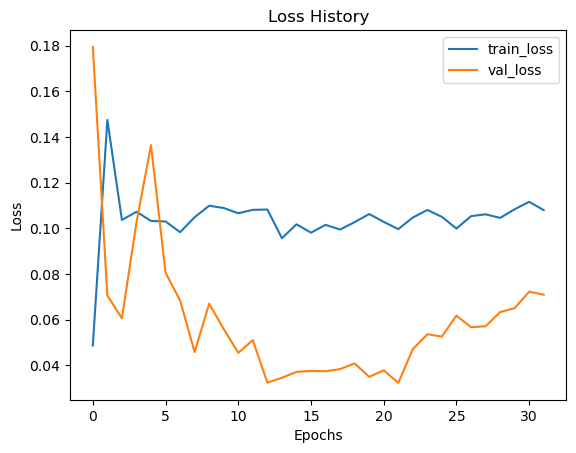

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

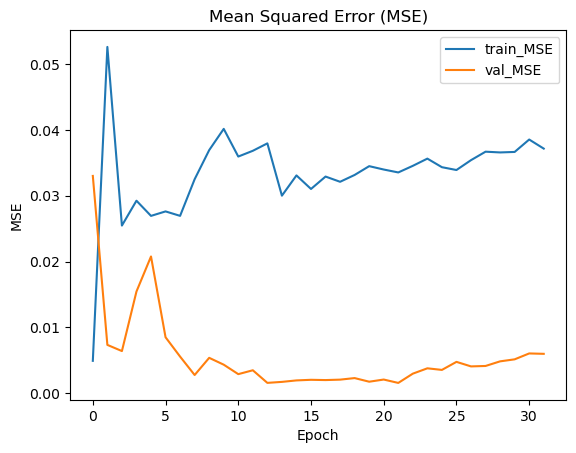

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

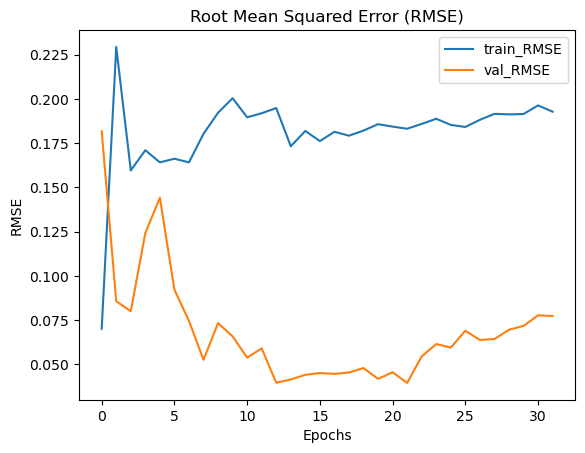

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

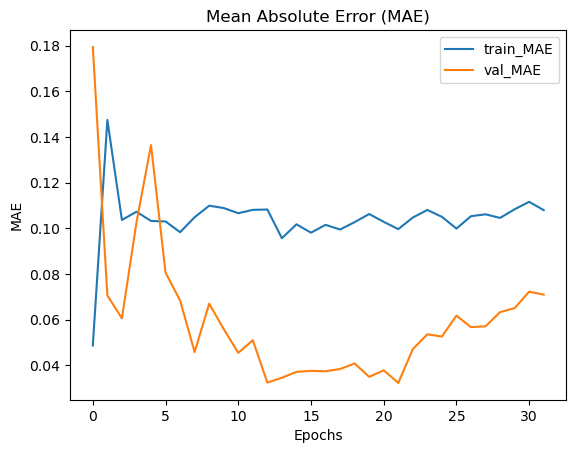

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

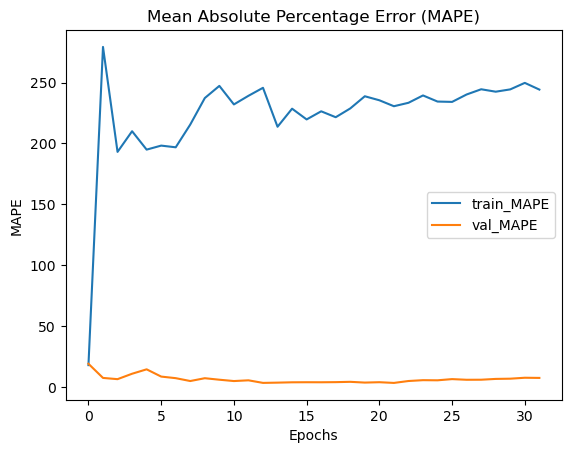

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:42:01.509470: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


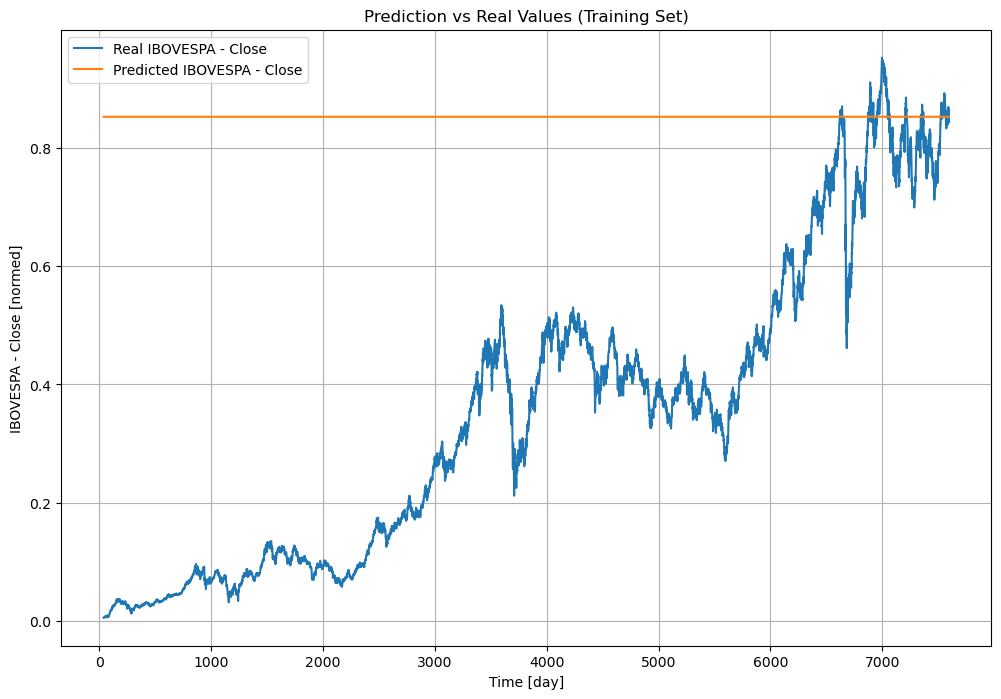

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


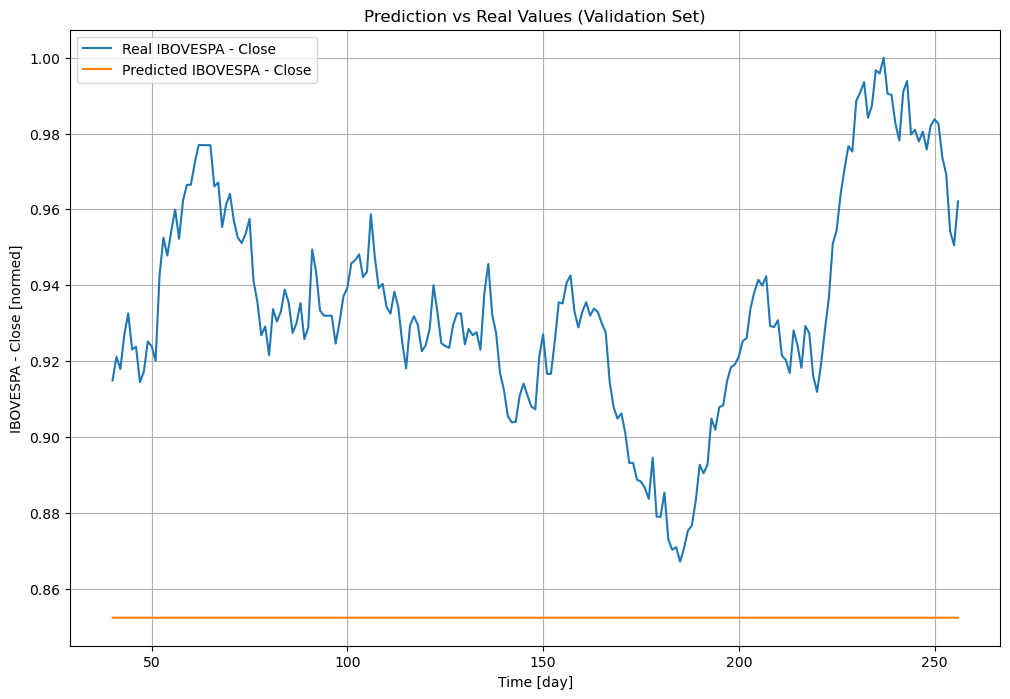

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


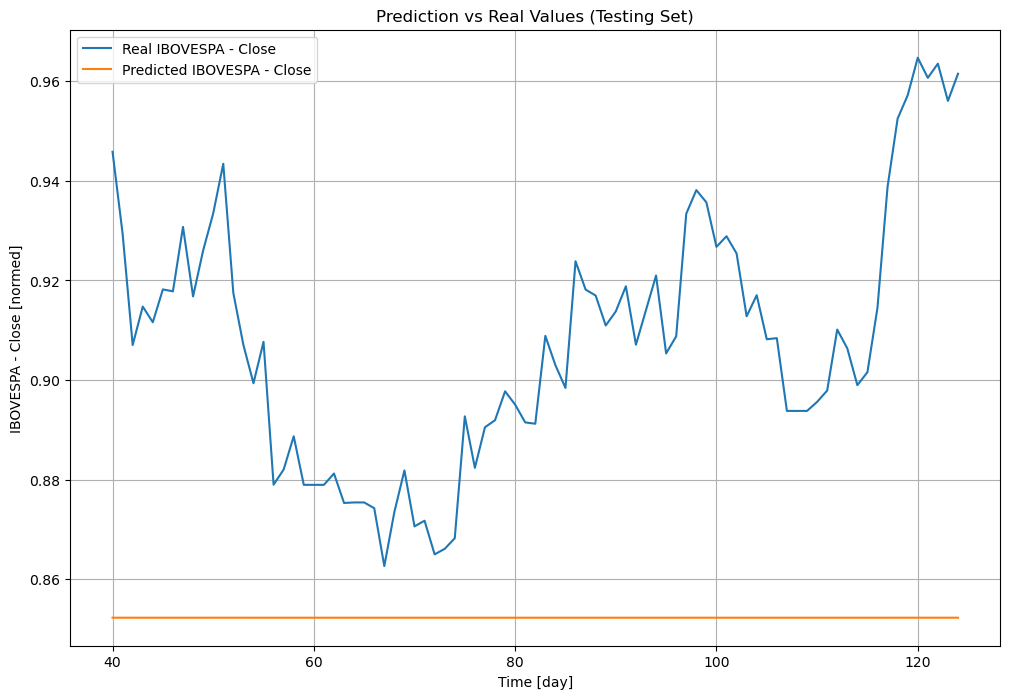

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

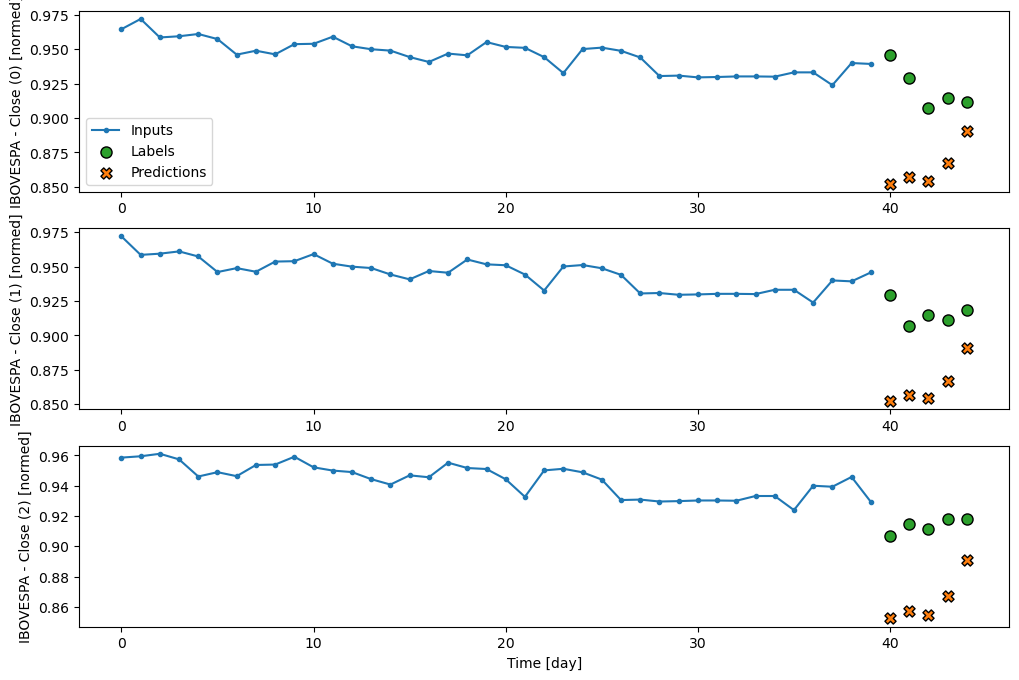

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:28s:320ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step


array([[[0.85229933, 0.85229933, 0.85229933, ..., 0.85229933,
         0.85229933, 0.85229933],
        [0.85696244, 0.85696244, 0.85696244, ..., 0.85696244,
         0.85696244, 0.85696244],
        [0.8544798 , 0.8544798 , 0.8544798 , ..., 0.8544798 ,
         0.8544798 , 0.8544798 ],
        [0.8670141 , 0.8670141 , 0.8670141 , ..., 0.8670141 ,
         0.8670141 , 0.8670141 ],
        [0.89078045, 0.89078045, 0.89078045, ..., 0.89078045,
         0.89078057, 0.89078057]],

       [[0.8522995 , 0.8522995 , 0.8522995 , ..., 0.8522995 ,
         0.8522995 , 0.8522995 ],
        [0.8569626 , 0.8569626 , 0.8569626 , ..., 0.8569626 ,
         0.8569626 , 0.8569626 ],
        [0.8544798 , 0.8544798 , 0.8544798 , ..., 0.8544798 ,
         0.8544798 , 0.8544798 ],
        [0.86701405, 0.86701405, 0.86701405, ..., 0.86701405,
         0.86701405, 0.86701405],
        [0.8907808 , 0.8907808 , 0.8907808 , ..., 0.8907808 ,
         0.8907807 , 0.8907807 ]],

       [[0.8522992 , 0.8522992 , 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')